In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA Case Study
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Task 1: Reading The Data

## Subtask 1.1 :Read the application data file and Previous_application data file

In [3]:
#Read the data from the files Application data and Previous application and store in the dataframe application and prev_application respectively

application=pd.read_csv("application_data.csv")
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
prev_application=pd.read_csv("previous_application.csv")
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## Subtask 1.2: Inspect the dataframes

In [5]:
# Determine the shape and details of dataframe
application.shape

(307511, 122)

In [6]:
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
application.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
#Check the null values in AMT_GOODS_PRICE
application[application["AMT_GOODS_PRICE"].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
304678      452992       0    Revolving loans           F            N   
304784      453120       0    Revolving loans           M            N   
305833      454341       0    Revolving loans           F            N   
306126      454683       0    Revolving loans           M            N   
306273      454852       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
724                  Y             2           45000.0    135000.0   
5937                 N             0          157500.0    450000.0   
6425                 N             0           67500.0    202500.0   
6703                 N             1          121500.0    180000.0   
7647                 Y             0          180000.0    450000.0   
...                ...           ...               ...         ...   
304678               Y             2           67500.0    202500.0   
304784               Y             1          112500.0    270000.0   
305833               Y             0          126000.0    270000.0   
306126               Y             0          135000.0    270000.0   
306273               Y             2           67500.0    202500.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
724          6750.0  ...                 0                0                0   
5937        22500.0  ...                 0                0                0   
6425        10125.0  ...                 0                0                0   
6703         9000.0  ...                 0                0                0   
7647        22500.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
304678      10125.0  ...                 0                0                0   
304784      13500.0  ...                 0                0                0   
305833      13500.0  ...                 0                0                0   
306126      13500.0  ...                 0                0                0   
306273      10125.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
724                   0                        NaN                       NaN   
5937                  0                        0.0                       0.0   
6425                  0                        NaN                       NaN   
6703                  0                        0.0                       0.0   
7647                  0                        0.0                       0.0   
...                 ...                        ...                       ...   
304678                0                        0.0                       0.0   
304784                0                        0.0                       0.0   
305833                0                        0.0                       0.0   
306126                0                        0.0                       0.0   
306273                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
724                            NaN                        NaN   
5937                           0.0                        0.0   
6425                           NaN                        NaN   
6703                           0.0                        0.0   
7647                           

In [10]:
application["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [11]:
#Replace the null of AMT_GOODS_PRICE with  median as it is needed for further analysis
application.loc[application["AMT_GOODS_PRICE"].isnull(),'AMT_GOODS_PRICE']=application["AMT_GOODS_PRICE"].median()

The AMT_GOODS_PRICE is used in consumer loans ,it is the price of the goods for which the loan is given.This attribute  may affect our analysis .But 278 records have null values so we are imputing these values with the median.

In [12]:
  #Replace the null of OCCUPATION_TYPE with  Missing as it is needed for further analysis
application.loc[application["OCCUPATION_TYPE"].isnull(),'OCCUPATION_TYPE']=application["OCCUPATION_TYPE"].apply(lambda x:"Missing")        

OCCUPATION_TYPE field is need for further analysis .Hence imputing the data column value missing with the text "Missing"

In [13]:
#Determine the null values of the dataframe
null_val=application.isnull().sum()

## Subtask 1.3: DATA CLEANING

### Copy the data corresponding to fewer or no data missing into new dataframe


In [14]:
# copy only the column name  with fewer data (<50%) or no data missing
len(null_val[null_val.values<0.5*len(null_val)])
null_val=(null_val[null_val.values<0.5*len(null_val)]).index

We can observe from the below step that only 60 columns have the missing values less than 50 %. 62 columns have the missing values above the 50% .Hence we remove those 62 columns as more data is missing in those column it cannot be taken for further analysis.The remain 60 columns and the records are moved to a new data frame called __new_appl__ .

In [15]:
# Display columns having fewer missing values
null_val

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG

In [16]:
# Created a new df called new_appl and copied the the columns and corresponding records for the missing value less than 50 %
new_appl=application[null_val]

In [17]:
new_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 60 columns]

In [18]:
# Check for the missing value counts again
new_appl.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_

In [19]:
#Pecentage  of Missing values
(new_appl.isnull().sum()/len(new_appl))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000


##  Subtask 1.4: Handling the missing values

In [20]:
# Check for null values in the AMT_ANNUITY column
new_appl[new_appl["AMT_ANNUITY"].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
47531           NaN  ...                 0                0                0   
50035           NaN  ...                 0                0                0   
51594           NaN  ...                 0                0                0   
55025           NaN  ...                 0                0                0   
59934           NaN  ...                 0                0                0   
75873           NaN  ...                 0                0                0   
89343           NaN  ...                 0                0                0   
123872          NaN  ...                 0                0                0   
207186          NaN  ...                 0                0                0   
227939          NaN  ...                 0                0                0   
239329          NaN  ...                 0                0                0   
241835          NaN  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
47531                 0                0                 0                 0   
50035                 0                0                 0                 0   
51594                 0                0                 0                 0   
55025                 0                0                 0                 0   
59934                 0                0                 0                 0   
75873                 0                0                 0                 0   
89343                 0                0                 0                 0   
123872                0                0                 0                 0   
207186                0                0                 0                 0   
227939                0                0                 0                 0   
239329                0                0                 0                 0   
241835                0                0                 0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOC

In the case above we see missing values, which cannot be deleted.These records  affect our analysis.Hence we can impute the missing values using the median.Since median remain unaffected due to any outliers present while the mean is affected by the same

In [21]:
# Impute the missing values with median
new_appl.loc[new_appl["AMT_ANNUITY"].isnull(),"AMT_ANNUITY"]=new_appl["AMT_ANNUITY"].median()

In [22]:
#Replace the value with 0 since it doesnot affect our analysis
new_appl[new_appl["DAYS_LAST_PHONE_CHANGE"].isnull()]
new_appl.loc[new_appl["DAYS_LAST_PHONE_CHANGE"].isnull(),"DAYS_LAST_PHONE_CHANGE"]=0

In [23]:
## Impute the missing values with median
new_appl[new_appl["CNT_FAM_MEMBERS"].isnull()]
new_appl.loc[new_appl["CNT_FAM_MEMBERS"].isnull(),"CNT_FAM_MEMBERS"]=new_appl["CNT_FAM_MEMBERS"].median()

In [24]:
# Check for the missing value counts again
new_appl.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

 Now all the missing values are either removed or imputed.Hence there are no missing values now

## Subtask 1.5:Handling Invalid data

In [25]:
# Check the count of Code_Gender values
new_appl["CODE_GENDER"].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
# Check the records having the Gender as XNA values
new_appl[new_appl["CODE_GENDER"]=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
35657       19125.0  ...                 0                0                0   
38566       13500.0  ...                 0                0                0   
83382       20250.0  ...                 0                0                0   
189640      27000.0  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
35657                 0                0                 0                 0   
38566                 0                0                 0                 0   
83382                 0                0                 0                 0   
189640                0                0                 0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
35657                  0                 0                 0  
38566                  0                 0                 0  
83382                  0                 0                 0  
189640                 0                 0                 0  

[4 rows x 60 columns]

In [27]:
#Removing invalid gender data records
new_appl=new_appl.loc[new_appl["CODE_GENDER"]!='XNA']

There are 4 records for which the Gender data is missing .Since the Gender is not available for these records.We delete the 4 records as it wont affect the analysis much

In [28]:
#Check the  counts corresponding to the NAME_FAMILY_STATUS
new_appl["NAME_FAMILY_STATUS"].value_counts()



Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [29]:
#Remove the records with invalid data
new_appl=new_appl.loc[new_appl["NAME_FAMILY_STATUS"]!='Unknown']

In [30]:
# Remove all the columns that we donot need for the analysis
del_col=["DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"
]

In [31]:
#Removing the columns not needed for analysis
new_appl.drop(labels=del_col,axis=1,inplace=True)

In [32]:
new_appl.shape

(307505, 31)

In [33]:
new_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307505 non-null  int64  
 1   TARGET                       307505 non-null  int64  
 2   NAME_CONTRACT_TYPE           307505 non-null  object 
 3   CODE_GENDER                  307505 non-null  object 
 4   FLAG_OWN_CAR                 307505 non-null  object 
 5   FLAG_OWN_REALTY              307505 non-null  object 
 6   CNT_CHILDREN                 307505 non-null  int64  
 7   AMT_INCOME_TOTAL             307505 non-null  float64
 8   AMT_CREDIT                   307505 non-null  float64
 9   AMT_ANNUITY                  307505 non-null  float64
 10  AMT_GOODS_PRICE              307505 non-null  float64
 11  NAME_INCOME_TYPE             307505 non-null  object 
 12  NAME_EDUCATION_TYPE          307505 non-null  object 
 13 

In [34]:
new_appl.describe()

SK_ID_CURR         TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307505.000000  307505.000000  307505.00000      3.075050e+05   
mean   278181.821811       0.080730       0.41705      1.687967e+05   
std    102790.177600       0.272421       0.72212      2.371248e+05   
min    100002.000000       0.000000       0.00000      2.565000e+04   
25%    189147.000000       0.000000       0.00000      1.125000e+05   
50%    278203.000000       0.000000       0.00000      1.471500e+05   
75%    367144.000000       0.000000       1.00000      2.025000e+05   
max    456255.000000       1.000000      19.00000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075050e+05  307505.000000     3.075050e+05   
mean   5.990284e+05   27108.552152     5.383184e+05   
std    4.024939e+05   14493.563794     3.692909e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307505.000000  307505.000000  307505.000000  ...   
mean                     0.020868  -16037.049495   63816.348794  ...   
std                      0.013831    4363.987877  141276.836143  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307505.000000    307505.000000         307505.000000   
mean        0.056721         2.152658              2.052461   
std         0.231309         0.910680              0.509036   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
count                307505.000000               307505.000000   
mean                      2.031518                    0.015144   
std                       0.502739                    0.122128   
min                       1.000000                    0.000000   
25%                       2.000000                    0.000000   
50%                       2.000000                    0.000000   
75%                       2.000000                    0.000000   
max                       3.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307505.000000                307505.000000   
mean                     0.050767                     0.040656   
std                      0.219521                     0.197493   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count           307505.000000           307505.000000            307505.000000  
mean                 0.078174                0.230455                 0.179555  
std                  0.268446                0.421125                 0.383817  
min                  0.000000                0.000000                 0.000000  
25%                  0.000000                0.000000         

In [35]:
new_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0  ...              1.0                    2                           2   
1  ...              2.0                    1                           1   
2  ...              1.0                    2                           2   
3  ...              2.0                    2                           2   
4  ...              1.0                    2                           2   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 31 columns]

In [36]:
# Converting the Negative Days value to postive value
new_appl["DAYS_BIRTH"]=abs(new_appl["DAYS_BIRTH"])
new_appl["DAYS_EMPLOYED"]=abs(new_appl["DAYS_EMPLOYED"])

In [37]:
# Converting the days to years value for convenience
new_appl["AGE"]=(new_appl["DAYS_BIRTH"]/365).round(2)
new_appl["WORK_EXP"]=(new_appl["DAYS_EMPLOYED"]/365).round(2)

In [38]:
# Removing the 'DAYS_BIRTH','DAYS_EMPLOYED' columns
new_appl.drop(labels=['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

In [39]:
#Converting the columns with invalid datatypes to a proper data type

new_appl["CNT_FAM_MEMBERS"]=new_appl["CNT_FAM_MEMBERS"].astype('int64')
new_appl["REG_REGION_NOT_LIVE_REGION"]=new_appl["REG_REGION_NOT_LIVE_REGION"].astype('object')
new_appl["REG_REGION_NOT_WORK_REGION"]=new_appl["REG_REGION_NOT_WORK_REGION"].astype('object')
new_appl["REG_CITY_NOT_LIVE_CITY"]=new_appl["REG_CITY_NOT_LIVE_CITY"].astype('object')
new_appl["REG_CITY_NOT_WORK_CITY"]=new_appl["REG_CITY_NOT_WORK_CITY"].astype('object')
new_appl["LIVE_CITY_NOT_WORK_CITY"]=new_appl["LIVE_CITY_NOT_WORK_CITY"].astype('object')

In [40]:
new_appl["CNT_CHILDREN"].describe()

count    307505.00000
mean          0.41705
std           0.72212
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          19.00000
Name: CNT_CHILDREN, dtype: float64

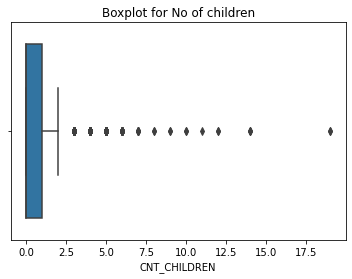

In [41]:
sns.boxplot(new_appl["CNT_CHILDREN"])
plt.title("Boxplot for No of children")
plt.show()

The max Count of children is 19 which a huge outlier in this dataset.We will handle this in the segmented univariate analysis

In [42]:
new_appl["CNT_CHILDREN"].value_counts()

0     215367
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [43]:
new_appl["CNT_CHILDREN"]=new_appl["CNT_CHILDREN"].astype('int64')

In [44]:
new_appl.loc[new_appl["ORGANIZATION_TYPE"]=='XNA','ORGANIZATION_TYPE']=new_appl["ORGANIZATION_TYPE"].apply(lambda x:np.NaN)

## Subplot 1.6: Analysis of various attributes in the Application data 

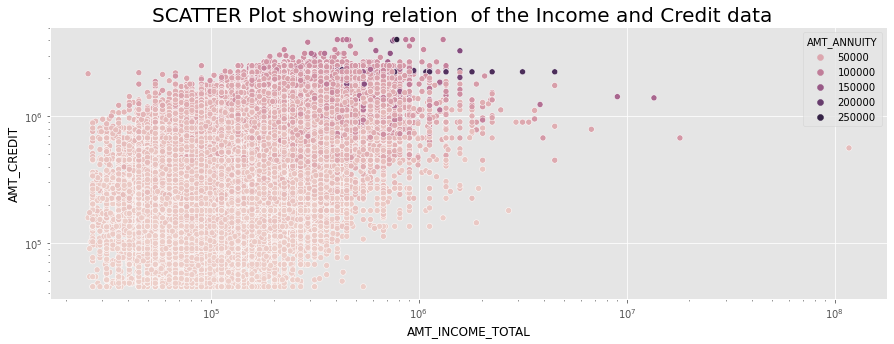

In [45]:
#plot showing the Income vs Credit
plt.figure(figsize=[15,5])
plt.style.use('ggplot')
plt.xscale("log")
plt.yscale("log")
sns.scatterplot(new_appl["AMT_INCOME_TOTAL"],new_appl["AMT_CREDIT"],hue=new_appl["AMT_ANNUITY"])
plt.title("SCATTER Plot showing relation  of the Income and Credit data  ",fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel("AMT_INCOME_TOTAL",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("AMT_CREDIT",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.show()

The plots are randomly distributed.Not much inferences can be made.We can infer that the Annuity amount is high for high credit value while income remains low.There are few outliers who have high income but a low credit and annuity value.

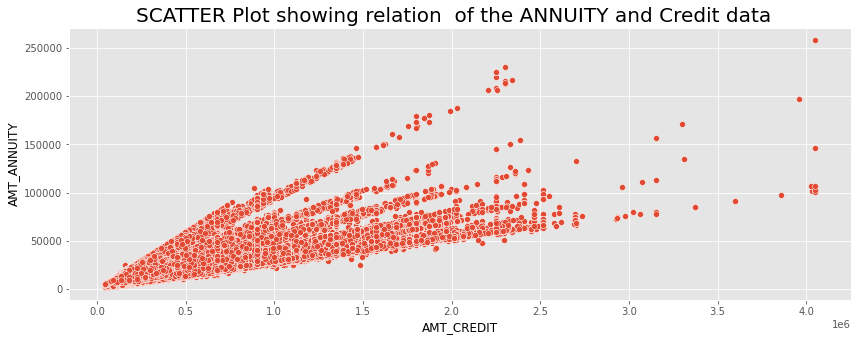

In [46]:
#plot Annuity vs Credit
plt.figure(figsize=[14,5])
plt.style.use('ggplot')
sns.scatterplot(new_appl["AMT_CREDIT"],new_appl["AMT_ANNUITY"])
plt.title("SCATTER Plot showing relation  of the ANNUITY and Credit data  ",fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel("AMT_CREDIT",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("AMT_ANNUITY",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.show()

The plots are more or less linear with few outliers.As credit amount increases the Annuity also increases.However there are some outliers where the credit amount is high and annuity is low.

In [47]:
# AMT_INCOME_TOTAL histogram/density plot
def density_plot(variable):
    plt.figure(figsize=[14,5])
    plt.style.use('ggplot')

    sns.distplot(new_appl[variable])
    plt.title("Plot showing distribution of the {} ".format(variable),fontdict={'fontsize':20,'fontweight':5,'color':'black'})
    plt.xlabel("{}".format(variable),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.ylabel("density",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.show()

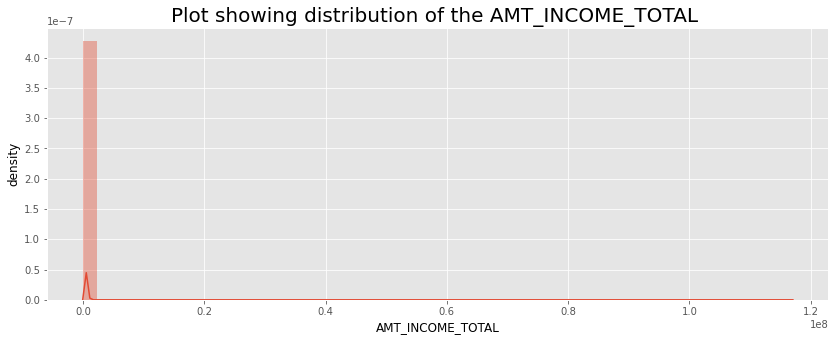

In [48]:
## AMT_INCOME_TOTAL histogram/density plot
density_plot("AMT_INCOME_TOTAL")

Most of the clients income is less than 1000000.

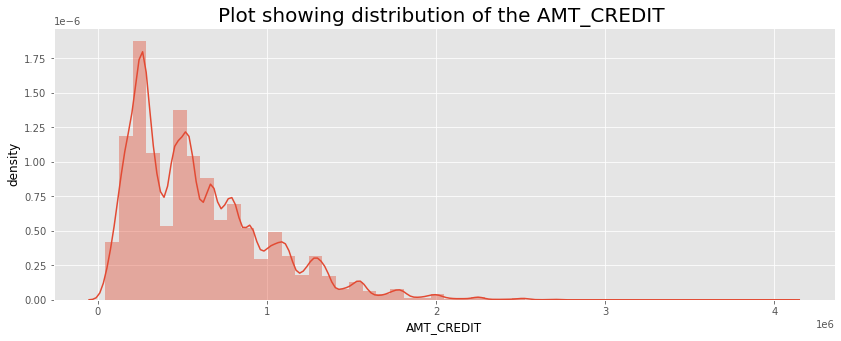

In [49]:
# AMT_CREDIT histogram/density plot
density_plot("AMT_CREDIT")

In [50]:
new_appl["AMT_CREDIT"].value_counts()

450000.0     9709
675000.0     8876
225000.0     8162
180000.0     7342
270000.0     7240
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
2097058.5       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

Most of the Clients have the credit amount  below 1000000.The count of clients having the credit amount greater than  1000000 gradually decreases.

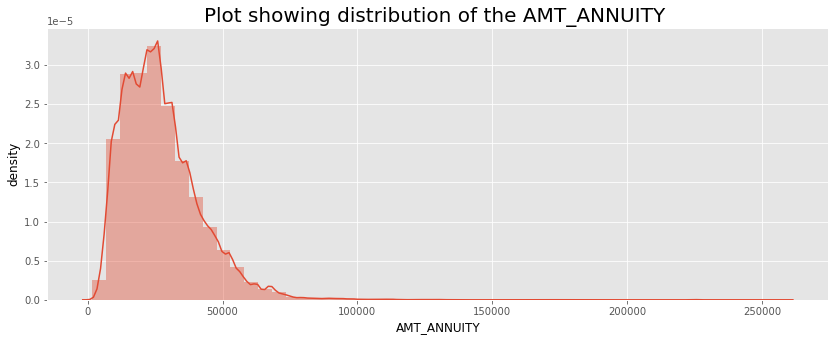

In [51]:
# AMT_ANNUITY histogram/density plot
density_plot("AMT_ANNUITY")

Most of the Clients have the annuity amount  between 0 to 50000.The count of clients having the annuity amount greater than  50000 gradually decreases.

## Subplot 1.7: HANDLING OUTLIERS

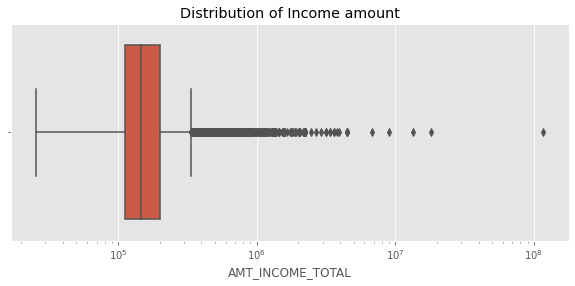

In [52]:
#Plot the boxplot corresponding to the AMT_Income value
plt.figure(figsize=(10,4))
sns.boxplot(new_appl["AMT_INCOME_TOTAL"])
plt.xscale("log")
plt.title('Distribution of Income amount')
plt.show()

From the above boxplot for the AMT_Income we can observe that there are few values that are outliers.But since it is possible the person can earn the income we will bin the values for further analysis

In [53]:
#Creating a bin for the Income
bins=[0,200000,400000,1000000,10000000000]
slot=['low','medium','high','very high']
new_appl["AMT_INCOME_RANGE"]=pd.cut(new_appl["AMT_INCOME_TOTAL"],bins,labels=slot)

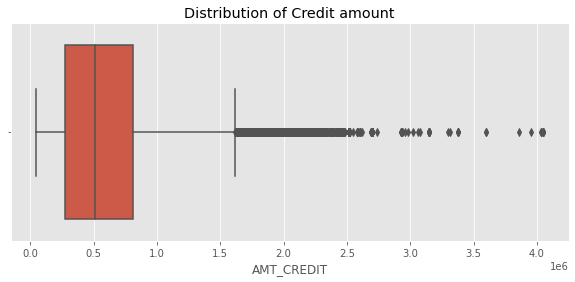

In [54]:
#plot the boxplot for the AMT_CREDIT value
plt.figure(figsize=(10,4))
sns.boxplot(new_appl["AMT_CREDIT"])
plt.title('Distribution of Credit amount')
plt.show()

From the above boxplot for the Credit amount we can observe that there are few values that are outliers.But since it is possible the person can take high credit amount we will bin the values for further analysis

In [55]:
# Creating a bin for the AMT_CREDIT
new_appl["AMT_CREDIT"].quantile([0,0.5, 0.75, 0.90,1])
bins=[0,500000,800000,1000000,10000000000]
slot=['low','medium','high','very high']
new_appl["AMT_CREDIT_RANGE"]=pd.cut(new_appl["AMT_CREDIT"],bins,labels=slot)

In [56]:
new_appl["AMT_ANNUITY"].describe()

count    307505.000000
mean      27108.552152
std       14493.563794
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

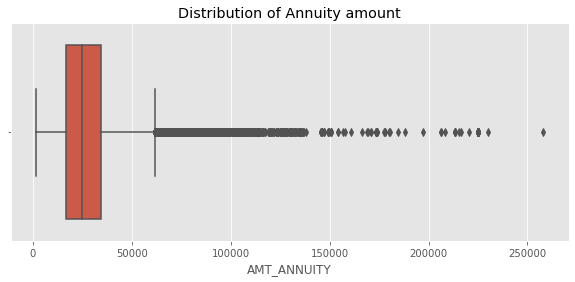

In [57]:
#plot the boxplot for the ANNUITY
plt.figure(figsize=(10,4))
sns.boxplot(new_appl["AMT_ANNUITY"])
plt.title('Distribution of Annuity amount')
plt.show()

From the above boxplot for the Annuity amount we can observe that there are few values that are outliers.But since it is possible the person can pay high annuity amount we will bin the values for further analysis

In [58]:
new_appl["AMT_ANNUITY"].quantile([0,0.5, 0.75, 0.90,1])

0.00      1615.5
0.50     24903.0
0.75     34596.0
0.90     45954.0
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [59]:
#Create bins for the annuity
bins=[0,25000,35000,45000,500000]
slot=['low','medium','high','very high']
new_appl["AMT_ANNUITY_RANGE"]=pd.cut(new_appl["AMT_ANNUITY"],bins,labels=slot)

In [60]:
new_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
0  ...                            0                      0   
1  ...                            0                      0   
2  ...                            0                      0   
3  ...                            0                      0   
4  ...                            0                      0   

  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                      0                       0  Business Entity Type 3   
1                      0                       0                  School   
2                      0                       0              Government   
3                      0                       0  Business Entity Type 3   
4                      1                       1                Religion   

     AGE  WORK_EXP  AMT_INCOME_RANGE AMT_CREDIT_RANGE  AMT_ANNUITY_RANGE  
0  25.92      1.75            medium              low                low  
1  45.93      3.25            medium        very high               high  
2  52.18      0.62               low              low                low  
3  52.07      8.33               low              low             medium  
4  54.61      8.32               low           medium                low  

[5 rows x 34 columns]

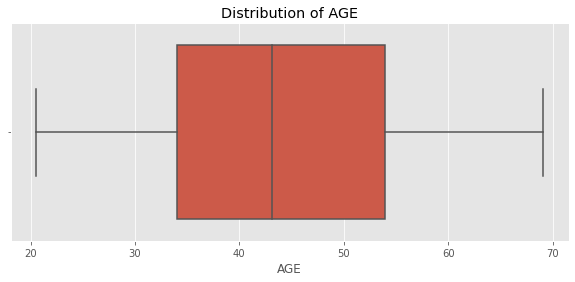

In [61]:
#Plot the boxplot for the age
plt.figure(figsize=(10,4))
sns.boxplot(new_appl["AGE"])
plt.title('Distribution of AGE')
plt.show()

Age has no outlier value.But we can bin it to age group for analysis purpose

In [62]:
new_appl["AGE"].describe()

count    307505.000000
mean         43.937125
std          11.956133
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: AGE, dtype: float64

In [63]:
#create bin for age and add new column called age_range
bins=[0,20,30,40,50,60,70]
slot=['0-20','20-30','30-40','40-50','50-60','60-70']
new_appl["AGE_RANGE"]=pd.cut(new_appl["AGE"],bins,labels=slot)

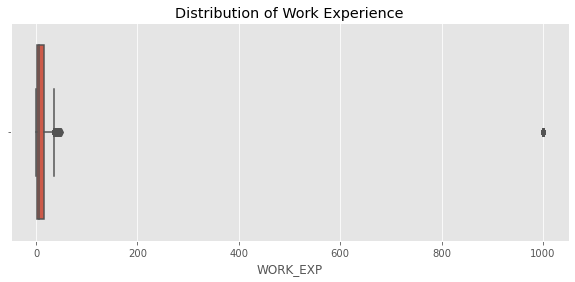

In [64]:
#Boxplot for the Work_Exp
plt.figure(figsize=(10,4))
sns.boxplot(new_appl["WORK_EXP"])
plt.title('Distribution of Work Experience')
plt.show()

There are records with experience more than 50 years which is technically not possible .Hence have updated those values with the .99 percentile value

In [65]:
new_appl["WORK_EXP"].describe()

count    307505.000000
mean        185.551470
std         382.042227
min           0.000000
25%           2.560000
50%           6.080000
75%          15.640000
max        1000.670000
Name: WORK_EXP, dtype: float64

In [66]:
#Capping the value of records with work exp >50 with the 99% value
new_appl.loc[new_appl["WORK_EXP"]>50,"WORK_EXP"]=new_appl["WORK_EXP"].quantile(0.99)

In [67]:
bins=[0,2,4,8,20,50]
slot=['<2','2-4','4-8','8-20','20-50']
new_appl["WORK_EXP_RANGE"]=pd.cut(new_appl["WORK_EXP"],bins,labels=slot)

In [68]:
new_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0  ...                       0                       0   
1  ...                       0                       0   
2  ...                       0                       0   
3  ...                       0                       0   
4  ...                       1                       1   

        ORGANIZATION_TYPE    AGE WORK_EXP  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0  Business Entity Type 3  25.92     1.75            medium               low   
1                  School  45.93     3.25            medium         very high   
2              Government  52.18     0.62               low               low   
3  Business Entity Type 3  52.07     8.33               low               low   
4                Religion  54.61     8.32               low            medium   

   AMT_ANNUITY_RANGE AGE_RANGE  WORK_EXP_RANGE  
0                low     20-30              <2  
1               high     40-50             2-4  
2                low     50-60              <2  
3             medium     50-60            8-20  
4                low     50-60            8-20  

[5 rows x 36 columns]

# TASK 2:DATA IMBALANCE

## Subtask 2.1:CHECKING THE IMBALANCE PERCENTAGE

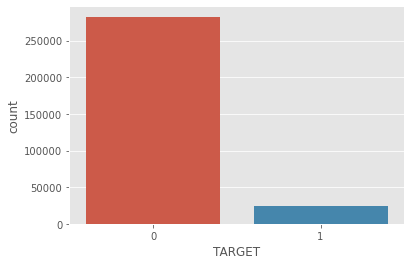

In [69]:
## Analysing the count of Target variables

sns.countplot("TARGET",data =new_appl)
plt.show()

In [70]:
# Imbalance value in percentage
new_appl["TARGET"].value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

The Target value of 1 has a 8 %  .It means that the 8% of the client will have payment difficulties while the 92% has made the payment on time.

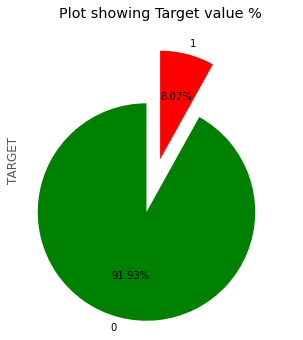

In [71]:
plt.figure(figsize=[12,5])
new_appl["TARGET"].value_counts(normalize=True).plot.pie(title="Plot showing Target value %",autopct="%.2f%%",startangle=90,explode=[0.5,0],
                                                         colors=['green','red'])
plt.show()

## Subtask 2.2:Divide data set based on TARGET

In [72]:
#Dividing the entire data in to two sets of target =1 (clients with payment difficulties ) and target =0(All others)
target_1=new_appl[new_appl["TARGET"]==1]
target_0=new_appl[new_appl["TARGET"]==0]

In [73]:
target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0   ...                       0                       0   
26  ...                       0                       0   
40  ...                       0                       0   
42  ...                       0                       0   
81  ...                       0                       0   

         ORGANIZATION_TYPE    AGE WORK_EXP  AMT_INCOME_RANGE  \
0   Business Entity Type 3  25.92     1.75            medium   
26  Business Entity Type 3  51.30     7.20               low   
40  Business Entity Type 3  47.90     3.46            medium   
42           Self-employed  36.67     9.85               low   
81                     NaN  67.93  1000.67               low   

    AMT_CREDIT_RANGE  AMT_ANNUITY_RANGE AGE_RANGE  WORK_EXP_RANGE  
0                low                low     20-30              <2  
26              high             medium     50-60             4-8  
40         very high               high     40-50             2-4  
42               low                low     30-40            8-20  
81               low                low     60-70             NaN  

[5 rows x 36 columns]

In [74]:
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
1  ...                       0                       0   
2  ...                       0                       0   
3  ...                       0                       0   
4  ...                       1                       1   
5  ...                       0                       0   

        ORGANIZATION_TYPE    AGE WORK_EXP  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
1                  School  45.93     3.25            medium         very high   
2              Government  52.18     0.62               low               low   
3  Business Entity Type 3  52.07     8.33               low               low   
4                Religion  54.61     8.32               low            medium   
5                   Other  46.41     4.35               low               low   

   AMT_ANNUITY_RANGE AGE_RANGE  WORK_EXP_RANGE  
1               high     40-50             2-4  
2                low     50-60              <2  
3             medium     50-60            8-20  
4                low     50-60            8-20  
5             medium     40-50             4-8  

[5 rows x 36 columns]

In [75]:
round(len(target_0)/len(target_1),2)

11.39

## The Imbalance ratio is 11.39


## Subtask 2.3: UNIVARIATE ANALYSIS





### Categorical Variables



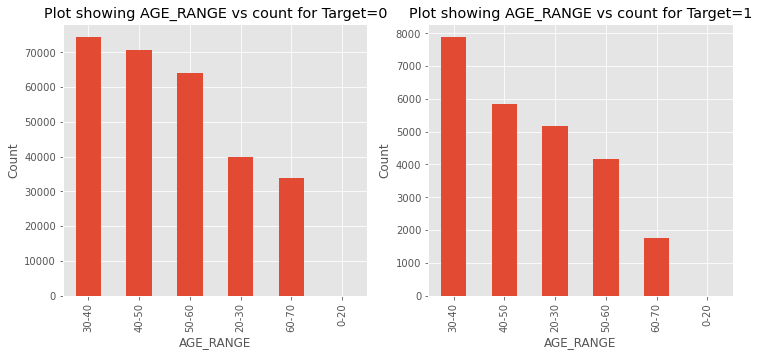

In [76]:
#Univariate Analysis corresponding to Age for the target_0 and target_1

f,(ax1,ax2) = plt.subplots(1,2,figsize=[12,5])
target_0["AGE_RANGE"].value_counts().plot(kind='bar',ax=ax1,title="Plot showing AGE_RANGE vs count for Target=0",xlabel="AGE_RANGE",ylabel="Count")

target_1["AGE_RANGE"].value_counts().plot(kind='bar',ax=ax2,title="Plot showing AGE_RANGE vs count for Target=1",xlabel="AGE_RANGE",ylabel="Count")

plt.show()

Inference : We can target the age group of 30-50 since they have high count of non-defaulting clients applying for loan

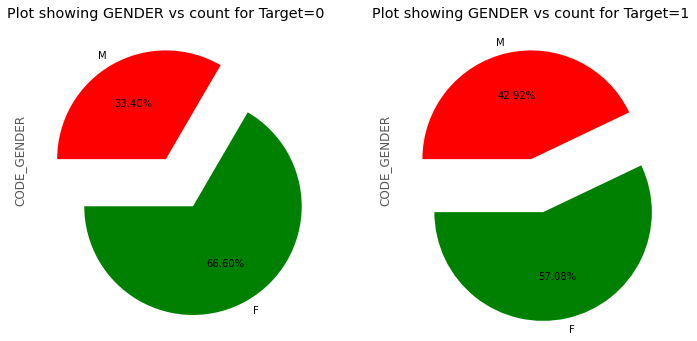

In [77]:
#Univariate Analysis corresponding to Gender for the target_0 and target_1

f,(ax1,ax2) = plt.subplots(1,2,figsize=[12,5])
target_0["CODE_GENDER"].value_counts().plot(kind='pie',ax=ax1,title="Plot showing GENDER vs count for Target=0",autopct="%.2f%%",startangle=180,explode=[0.5,0],
                                                         colors=['green','red'])

target_1["CODE_GENDER"].value_counts().plot(kind='pie',ax=ax2,title="Plot showing GENDER vs count for Target=1",autopct="%.2f%%",startangle=180,explode=[0.5,0],
                                                         colors=['green','red'])

plt.show()

 We can target the females since they have high count of non-defaulting clients applying for loan

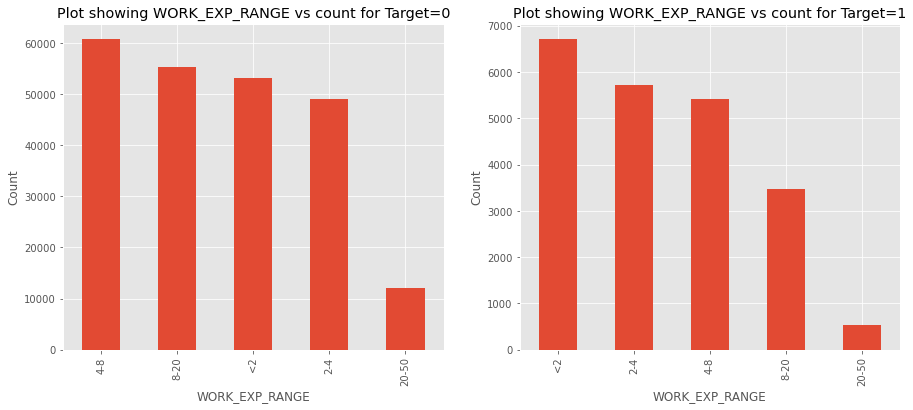

In [78]:
#Univariate Analysis corresponding to Gender for the target_0 and target_1
f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,6])
target_0["WORK_EXP_RANGE"].value_counts().plot(kind='bar',ax=ax1,title="Plot showing WORK_EXP_RANGE vs count for Target=0",xlabel="WORK_EXP_RANGE",ylabel="Count")

target_1["WORK_EXP_RANGE"].value_counts().plot(kind='bar',ax=ax2,title="Plot showing WORK_EXP_RANGE vs count for Target=1",xlabel="WORK_EXP_RANGE",ylabel="Count")

plt.show()

Inference : The work experience of most of the  clients in Target 0 is in 4-8 years, whereas in the target 1, most clients have work experience of <2 years. And maybe that is the reason since the clients do not have more experiemce and hence maybe less savings,  they are more chances of them being defaulters.

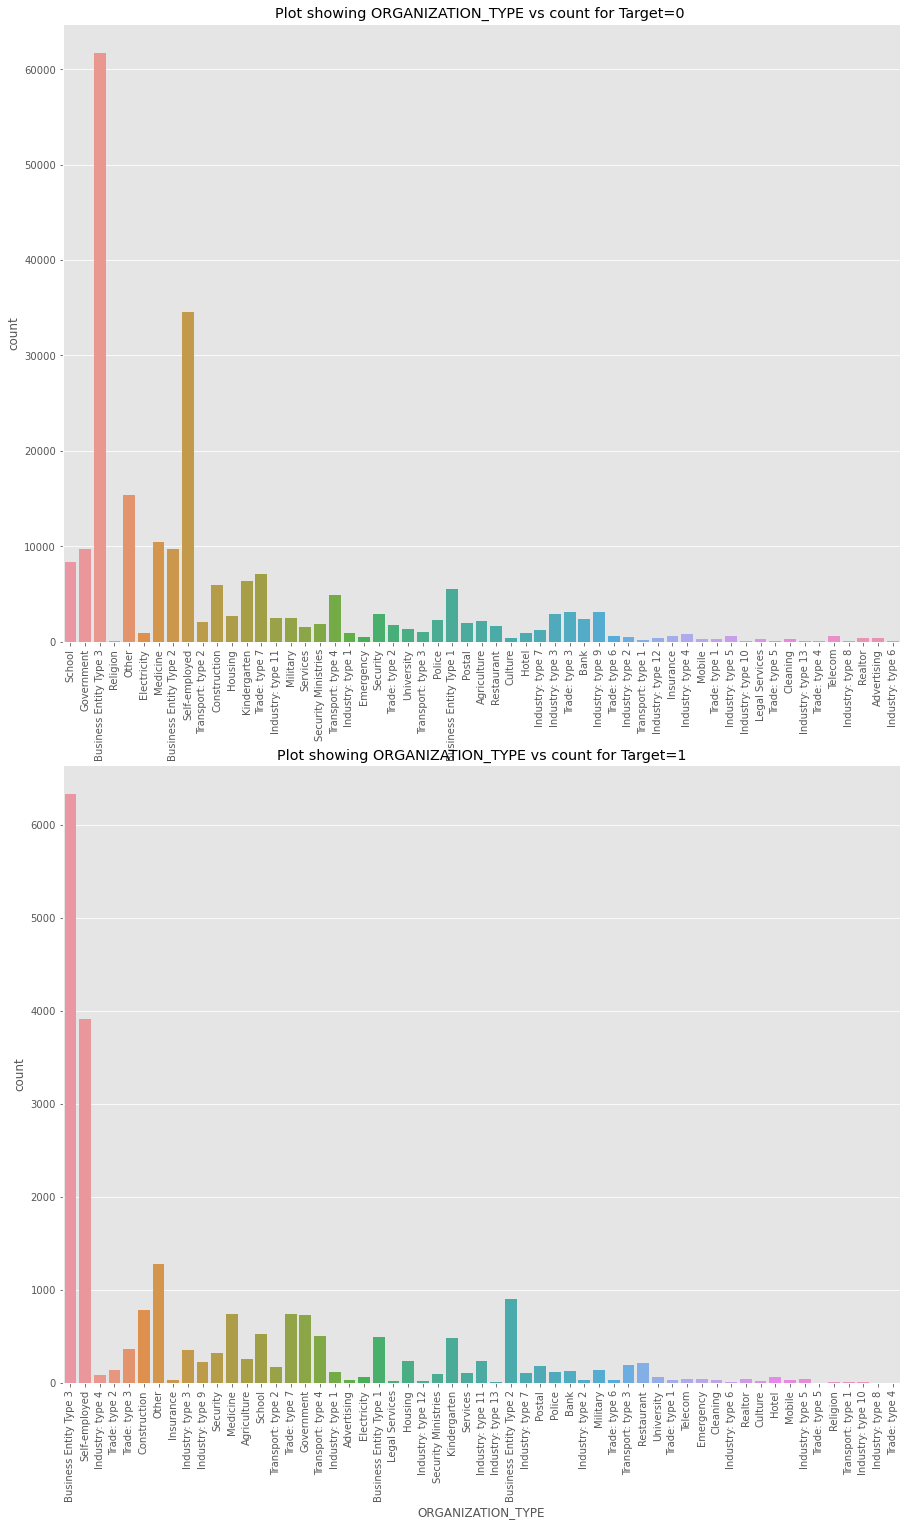

In [79]:
#Univariate Analysis corresponding to ORGANIZATION_TYPE for the target_0 and target_1
plt.figure(figsize = (15,25))
plt.subplot(2,1, 1)



sns.countplot(target_0['ORGANIZATION_TYPE'])
plt.title('Plot showing ORGANIZATION_TYPE vs count for Target=0 ')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(2, 1, 2)

sns.countplot(target_1['ORGANIZATION_TYPE'])
plt.title('Plot showing ORGANIZATION_TYPE vs count for Target=1')

plt.xticks(rotation = 90)
plt.show()

Inference :No major inferences on this.We need further information 

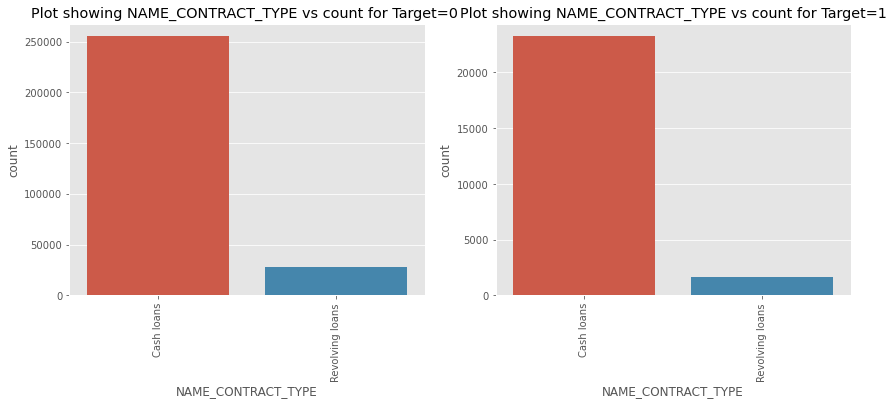

In [80]:
#Univariate Analysis corresponding to NAME_CONTRACT_TYPE for the target_0 and target_1
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)



sns.countplot(target_0['NAME_CONTRACT_TYPE'])
plt.title('Plot showing NAME_CONTRACT_TYPE vs count for Target=0 ')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_CONTRACT_TYPE'])
plt.title('Plot showing NAME_CONTRACT_TYPE vs count for Target=1')

plt.xticks(rotation = 90)
plt.show()


Inference : Clients in both the groups have taken more cash loans as compared to revolving loans 

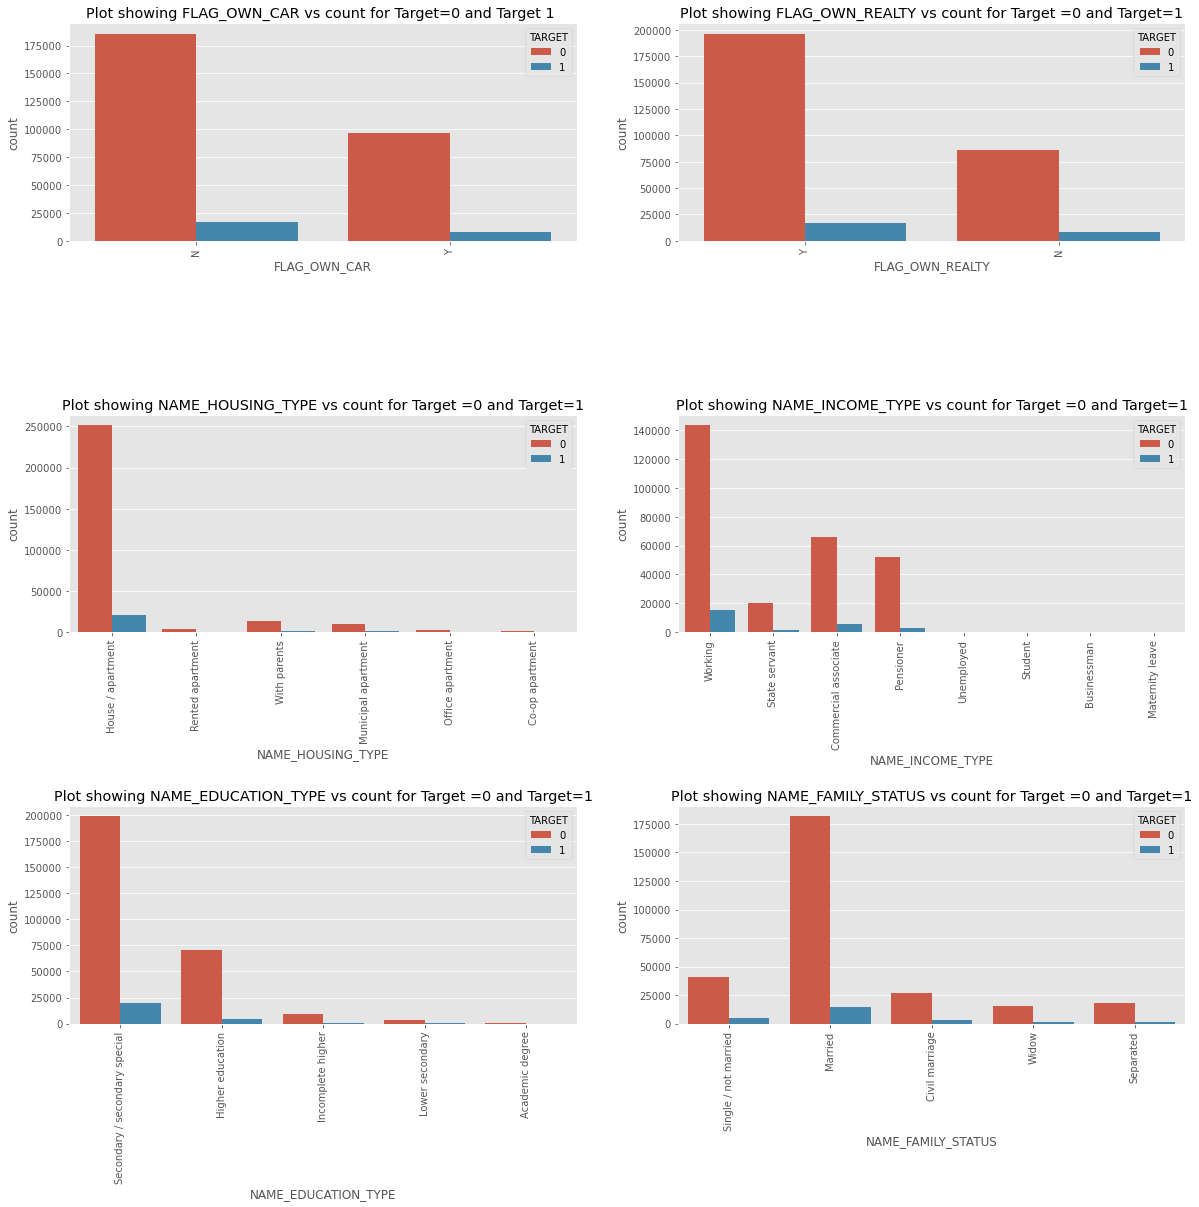

In [81]:
# Plotting the subplots for FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS
plt.figure(figsize = (20,40))
plt.subplot(6, 2, 1)



sns.countplot(x='FLAG_OWN_CAR',hue='TARGET',data=new_appl)
plt.title('Plot showing FLAG_OWN_CAR vs count for Target=0 and Target 1 ')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(6, 2, 2)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x='FLAG_OWN_REALTY',hue='TARGET',data=new_appl)
plt.title('Plot showing FLAG_OWN_REALTY vs count for Target =0 and Target=1')

plt.xticks(rotation = 90)
# subplot 3
plt.subplot(6, 2, 3)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x='NAME_HOUSING_TYPE',hue='TARGET',data=new_appl)
plt.title('Plot showing NAME_HOUSING_TYPE vs count for Target =0 and Target=1')

plt.xticks(rotation = 90)

# subplot 4
plt.subplot(6, 2, 4)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x='NAME_INCOME_TYPE',hue='TARGET',data=new_appl)
plt.title('Plot showing NAME_INCOME_TYPE vs count for Target =0 and Target=1')

plt.xticks(rotation = 90)


# subplot 5
plt.subplot(6, 2, 5)
plt.subplots_adjust(hspace=0.8)

sns.countplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=new_appl)
plt.title('Plot showing NAME_EDUCATION_TYPE vs count for Target =0 and Target=1')

plt.xticks(rotation = 90)
# subplot 2
plt.subplot(6, 2, 6)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x='NAME_FAMILY_STATUS',hue='TARGET',data=new_appl)
plt.title('Plot showing NAME_FAMILY_STATUS vs count for Target =0 and Target=1')

plt.xticks(rotation = 90)

plt.show()


## Numerical

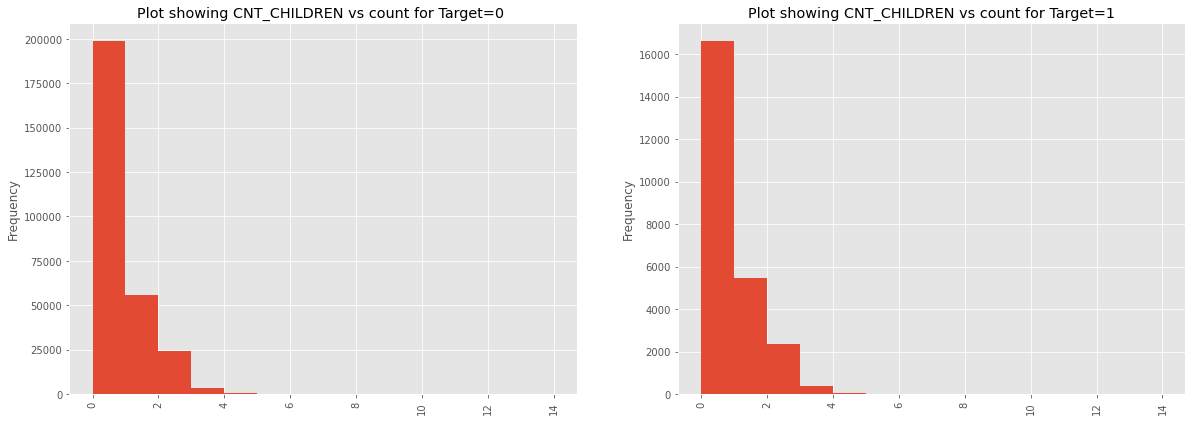

In [82]:
#Univariate Analysis corresponding to CNT_CHILDREN for the target_0 and target_1
plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1)



target_0['CNT_CHILDREN'].plot.hist(bins=range(15))
plt.title('Plot showing CNT_CHILDREN vs count for Target=0 ')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(2, 2, 2)

target_1['CNT_CHILDREN'].plot.hist(bins=range(15))
plt.title('Plot showing CNT_CHILDREN vs count for Target=1')

plt.xticks(rotation = 90)


plt.show()


Clients who have no children have higher count of applying for loan.Also when the count of children increases they have more chance of defaulting.

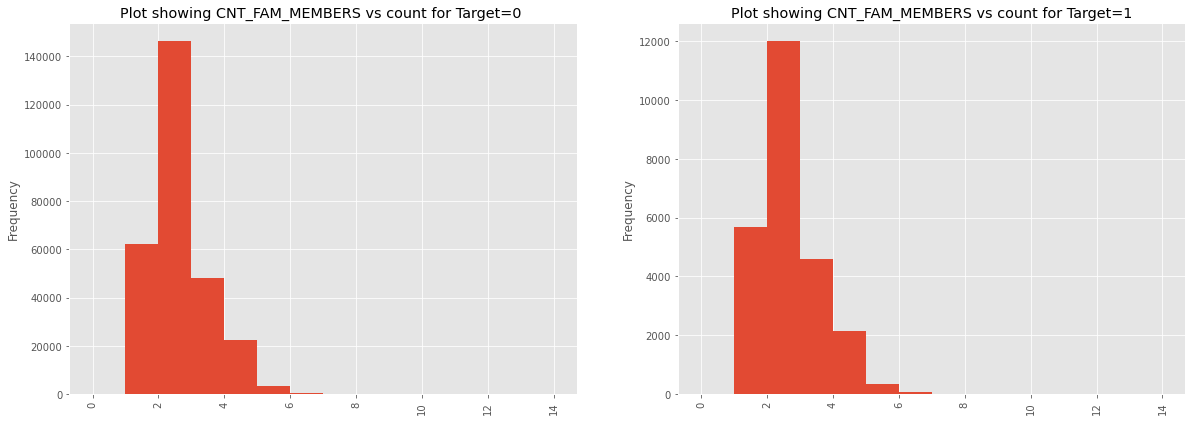

In [83]:
#Univariate Analysis corresponding to CNT_FAM_MEMBERS for the target_0 and target_1
plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1)



target_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Plot showing CNT_FAM_MEMBERS vs count for Target=0 ')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(2, 2, 2)

target_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Plot showing CNT_FAM_MEMBERS vs count for Target=1')

plt.xticks(rotation = 90)


plt.show()

We can see that a family of 3 applies loan more often than the other families

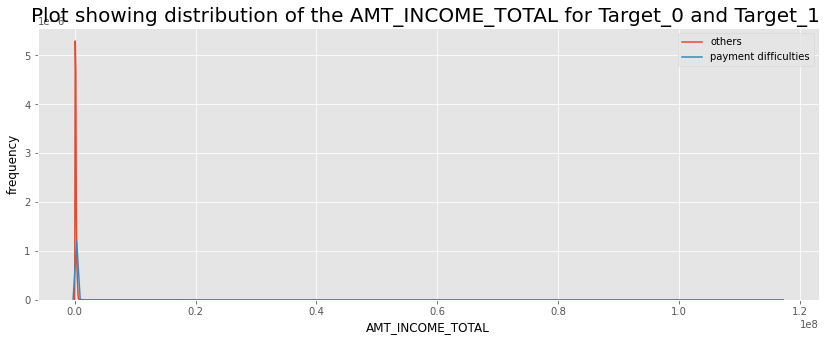

In [84]:
# AMT_INCOME_TOTAL histogram/density plot
plt.figure(figsize=[14,5])
plt.style.use('ggplot')
sns.distplot(target_0["AMT_INCOME_TOTAL"],hist=False,label='others')
sns.distplot(target_1["AMT_INCOME_TOTAL"],hist=False,label='payment difficulties')
plt.title("Plot showing distribution of the AMT_INCOME_TOTAL for Target_0 and Target_1 ",fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel("AMT_INCOME_TOTAL",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("frequency",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.legend()
plt.show()

Inference : From the above graph it can be seen that clients in Target 0 (good clients) have higher Total Income as compared to clients in target 1(payment difficult).Low income client a high chance of defaulting

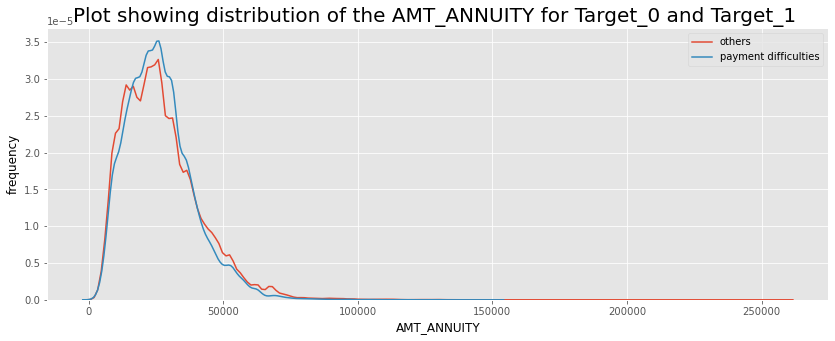

In [85]:
# AMT_ANNUITY histogram/density plot
plt.figure(figsize=[14,5])
plt.style.use('ggplot')
sns.distplot(target_0["AMT_ANNUITY"],hist=False,label='others')
sns.distplot(target_1["AMT_ANNUITY"],hist=False,label='payment difficulties')
plt.title("Plot showing distribution of the AMT_ANNUITY for Target_0 and Target_1 ",fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel("AMT_ANNUITY",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("frequency",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.legend()
plt.show()

Inference : From the above graph it can be seen that clients in Target 0 and Traget 1 have pretty much the same Annuity Amount. Infact the clients in Target 1 have slightly higher Annuity Amount. 

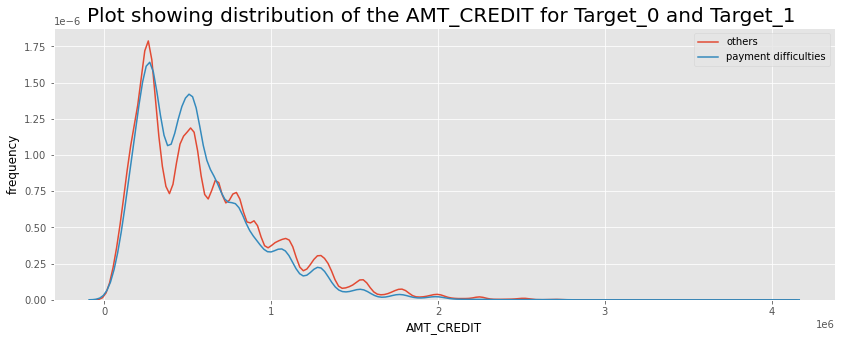

In [86]:
# AMT_CREDIT histogram/density plot
plt.figure(figsize=[14,5])
plt.style.use('ggplot')
sns.distplot(target_0["AMT_CREDIT"],hist=False,label='others')
sns.distplot(target_1["AMT_CREDIT"],hist=False,label='payment difficulties')
plt.title("Plot showing distribution of the AMT_CREDIT for Target_0 and Target_1 ",fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel("AMT_CREDIT",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.ylabel("frequency",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.legend()
plt.show()

Inference : From the above graph it can be seen that clients in Target 0 and Target 1 have pretty much the same Credit Amount. Infact the clients in Target 1 have slightly higher Credit Amount.

## Subtask 2.4: Segmented Univariate ANALYSIS

In [87]:
target_0["AMT_INCOME_TOTAL"].quantile(0.75)

202500.0

In [88]:
#Segmented Univariate Analysis corresponding to AMT_INCOME_TOTAL for the target_0 and target_1
seg_income_count0=target_0[target_0["AMT_INCOME_TOTAL"]<target_0["AMT_INCOME_TOTAL"].quantile(0.75)]

In [89]:
#Segmented Univariate Analysis corresponding to AMT_INCOME_TOTAL for the target_0 and target_1
seg_income_count1=target_1[target_1["AMT_INCOME_TOTAL"]<target_1["AMT_INCOME_TOTAL"].quantile(0.75)]

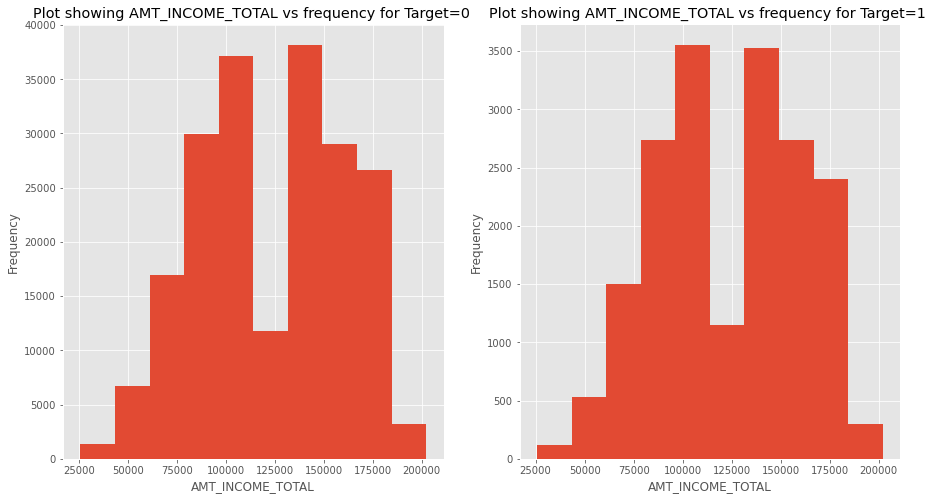

In [90]:
#plot the graph for the Segmented income value for Target 0 & Target1

plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)



seg_income_count0['AMT_INCOME_TOTAL'].plot.hist()
plt.title('Plot showing AMT_INCOME_TOTAL vs frequency for Target=0 ')
plt.xlabel("AMT_INCOME_TOTAL")

plt.subplot(1, 2, 2)



seg_income_count1['AMT_INCOME_TOTAL'].plot.hist()
plt.title('Plot showing AMT_INCOME_TOTAL vs frequency for Target=1 ')
plt.xlabel("AMT_INCOME_TOTAL")
plt.show()

The income follows similar pattern for both Target 0 and Target 1.Not much can be inferred from the same.

In [91]:
target_0["AMT_CREDIT"].quantile(0.75)

810000.0

In [92]:
#Segmented Univariate Analysis corresponding to AMT_CREDIT for the target_0 and target_1
seg_credit_count0=target_0[target_0["AMT_CREDIT"]<target_0["AMT_CREDIT"].quantile(0.75)]
seg_credit_count1=target_1[target_1["AMT_CREDIT"]<target_1["AMT_CREDIT"].quantile(0.75)]

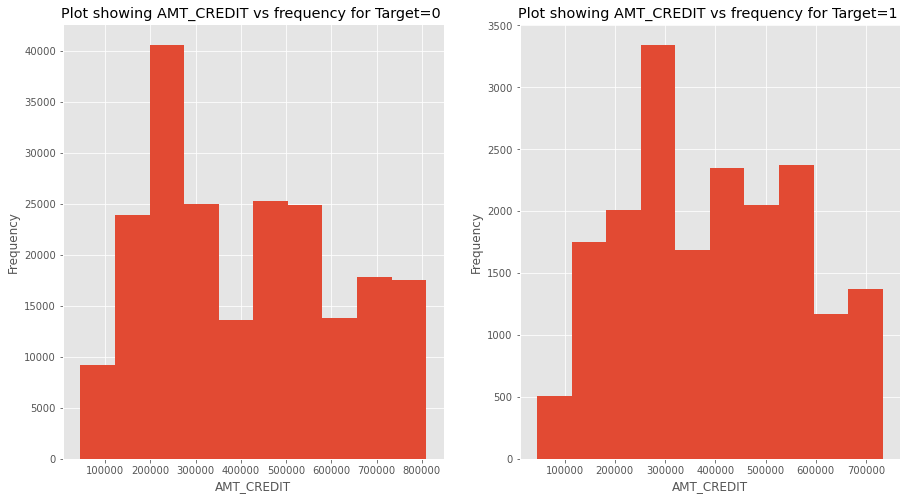

In [93]:
#plot the graph for the Segmented credit value for Target 0 & Target1

plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)



seg_credit_count0['AMT_CREDIT'].plot.hist()
plt.title('Plot showing AMT_CREDIT vs frequency for Target=0 ')
plt.xlabel("AMT_CREDIT")

plt.subplot(1, 2, 2)



seg_credit_count1['AMT_CREDIT'].plot.hist()
plt.title('Plot showing AMT_CREDIT vs frequency for Target=1 ')
plt.xlabel("AMT_CREDIT")
plt.show()

From the graph we can infer that as credit amount is above 300000 the chance of defaulting is slightly more

In [94]:
target_0["AMT_ANNUITY"].quantile(0.75)

34749.0

In [95]:
#Segmented Univariate Analysis corresponding to AMT_CREDIT for the target_0 and target_1
seg_annuity_count0=target_0[target_0["AMT_ANNUITY"]<target_0["AMT_ANNUITY"].quantile(0.75)]
seg_annuity_count1=target_1[target_1["AMT_ANNUITY"]<target_1["AMT_ANNUITY"].quantile(0.75)]

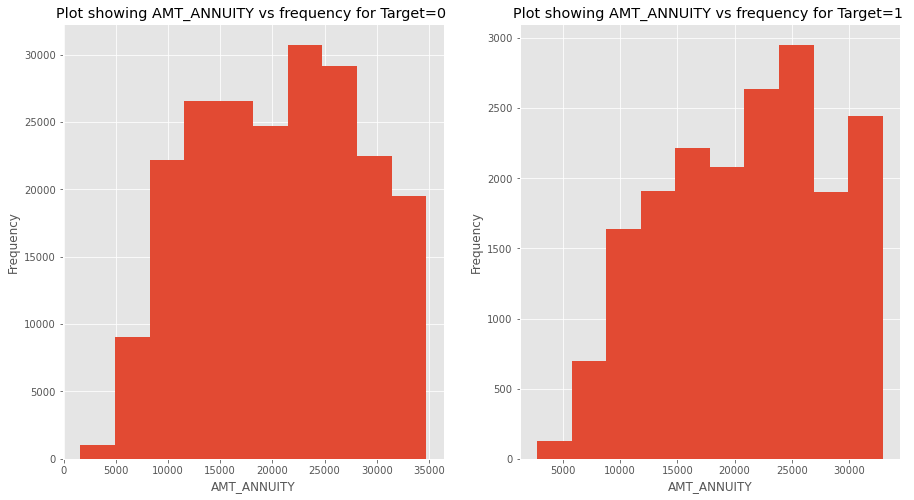

In [96]:
#plot the graph for the Segmented AMT_ANNUITY value for Target 0 & Target1

plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)



seg_annuity_count0['AMT_ANNUITY'].plot.hist()
plt.title('Plot showing AMT_ANNUITY vs frequency for Target=0 ')
plt.xlabel("AMT_ANNUITY")

plt.subplot(1, 2, 2)



seg_annuity_count1['AMT_ANNUITY'].plot.hist()
plt.title('Plot showing AMT_ANNUITY vs frequency for Target=1 ')
plt.xlabel("AMT_ANNUITY")
plt.show()

Both the Target0 and Target1 data follow same pattern for AMT_ANNUITY.Few exceptions occurs when the ANNUITY amount is 25000-30000.The defaulting is high around 25000 and 30000

## Subtask 2.5: BIVARIATE ANALYSIS

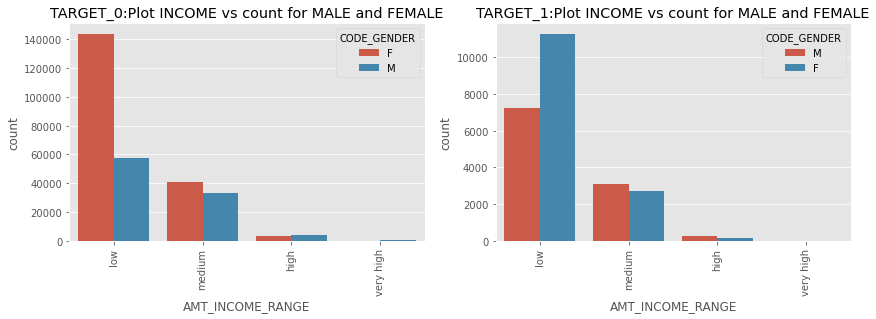

In [97]:
#Bivariate analysis for AMT_INCOME_RANGE and CODE_GENDER
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)


sns.countplot(x="AMT_INCOME_RANGE",hue="CODE_GENDER",data=target_0)
plt.title('TARGET_0:Plot INCOME vs count for MALE and FEMALE')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x="AMT_INCOME_RANGE",hue="CODE_GENDER",data=target_1)
plt.title('TARGET_1:Plot INCOME vs count for MALE and FEMALE')

plt.xticks(rotation = 90)
plt.show()


Female clients tend to have low income compared to male though their count for the loan application is high. Males with low income tend to default the payment more.

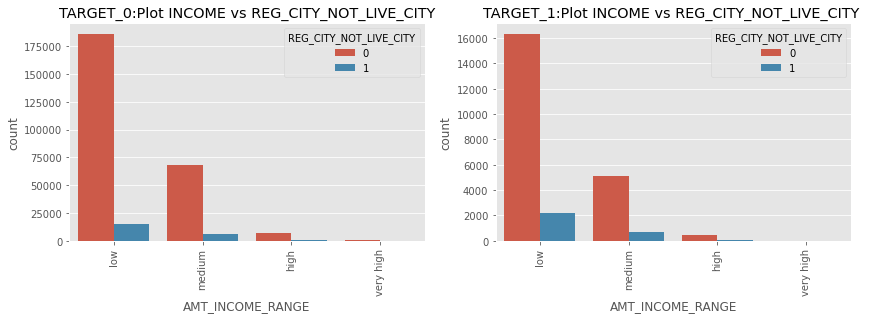

In [98]:
##Bivariate analysis for AMT_INCOME_RANGE and REG_CITY_NOT_LIVE_CITY
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)


sns.countplot(x="AMT_INCOME_RANGE",hue="REG_CITY_NOT_LIVE_CITY",data=target_0)
plt.title('TARGET_0:Plot INCOME vs REG_CITY_NOT_LIVE_CITY')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x="AMT_INCOME_RANGE",hue="REG_CITY_NOT_LIVE_CITY",data=target_1)
plt.title('TARGET_1:Plot INCOME vs REG_CITY_NOT_LIVE_CITY ')

plt.xticks(rotation = 90)
plt.show()

For the clients with low income the Registered city is not the live in city.

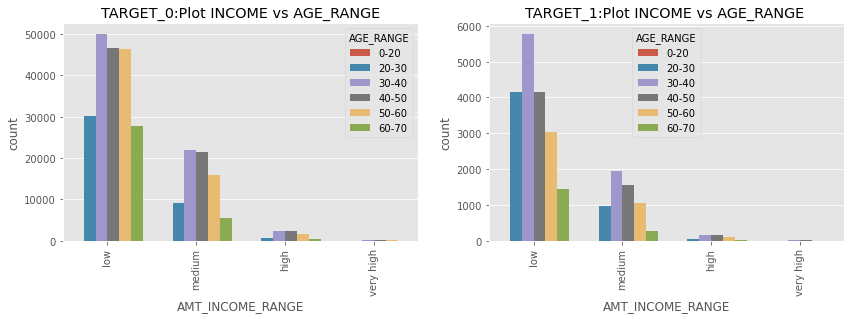

In [99]:
##Bivariate analysis for AMT_INCOME_RANGE and AGE_RANGE
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)


sns.countplot(x="AMT_INCOME_RANGE",hue="AGE_RANGE",data=target_0)
plt.title('TARGET_0:Plot INCOME vs AGE_RANGE')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x="AMT_INCOME_RANGE",hue="AGE_RANGE",data=target_1)
plt.title('TARGET_1:Plot INCOME vs AGE_RANGE ')

plt.xticks(rotation = 90)
plt.show()

In the low level income range age group of 20-30 has a high chance of being a defaulter

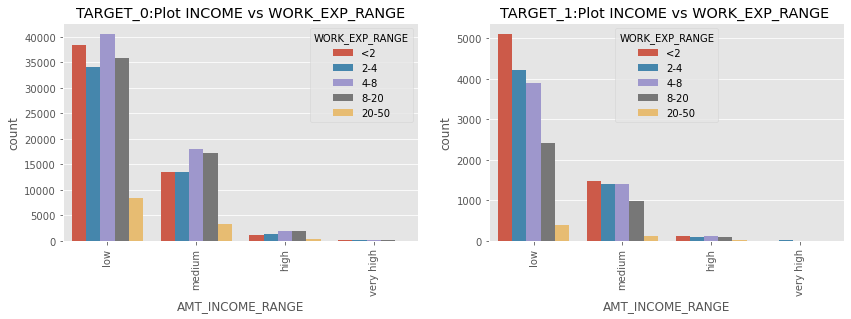

In [100]:
##Bivariate analysis for AMT_INCOME_RANGE and WORK_EXP_RANGE
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)


sns.countplot(x="AMT_INCOME_RANGE",hue="WORK_EXP_RANGE",data=target_0)
plt.title('TARGET_0:Plot INCOME vs WORK_EXP_RANGE')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.8)
sns.countplot(x="AMT_INCOME_RANGE",hue="WORK_EXP_RANGE",data=target_1)
plt.title('TARGET_1:Plot INCOME vs WORK_EXP_RANGE ')

plt.xticks(rotation = 90)
plt.show()

In the low level income range  clients with experience <2 years have a high chance of being a defaulter

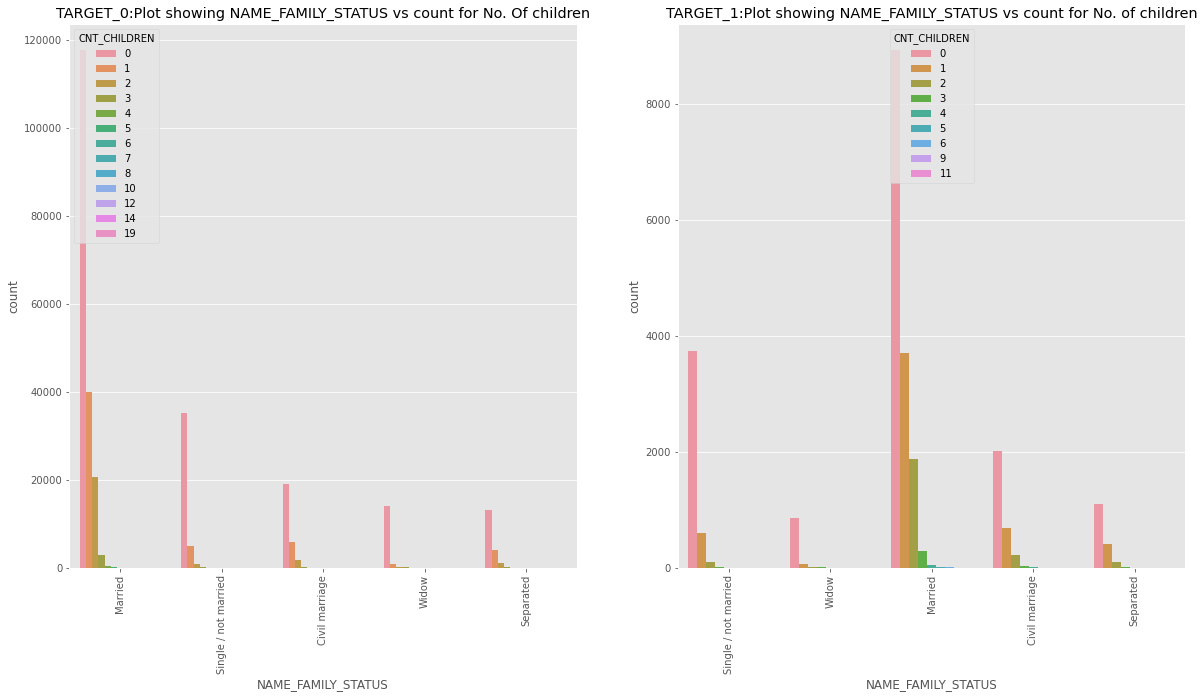

In [101]:
##Bivariate analysis for NAME_FAMILY_STATUS and CNT_CHILDREN
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)



sns.countplot(x="NAME_FAMILY_STATUS",hue="CNT_CHILDREN",data=target_0)
plt.title('TARGET_0:Plot showing NAME_FAMILY_STATUS vs count for No. Of children')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(x="NAME_FAMILY_STATUS",hue="CNT_CHILDREN",data=target_1)
plt.title('TARGET_1:Plot showing NAME_FAMILY_STATUS vs count for No. of children')

plt.xticks(rotation = 90)
plt.show()



 widow clients have less chance of defaulting the payment when they have no children

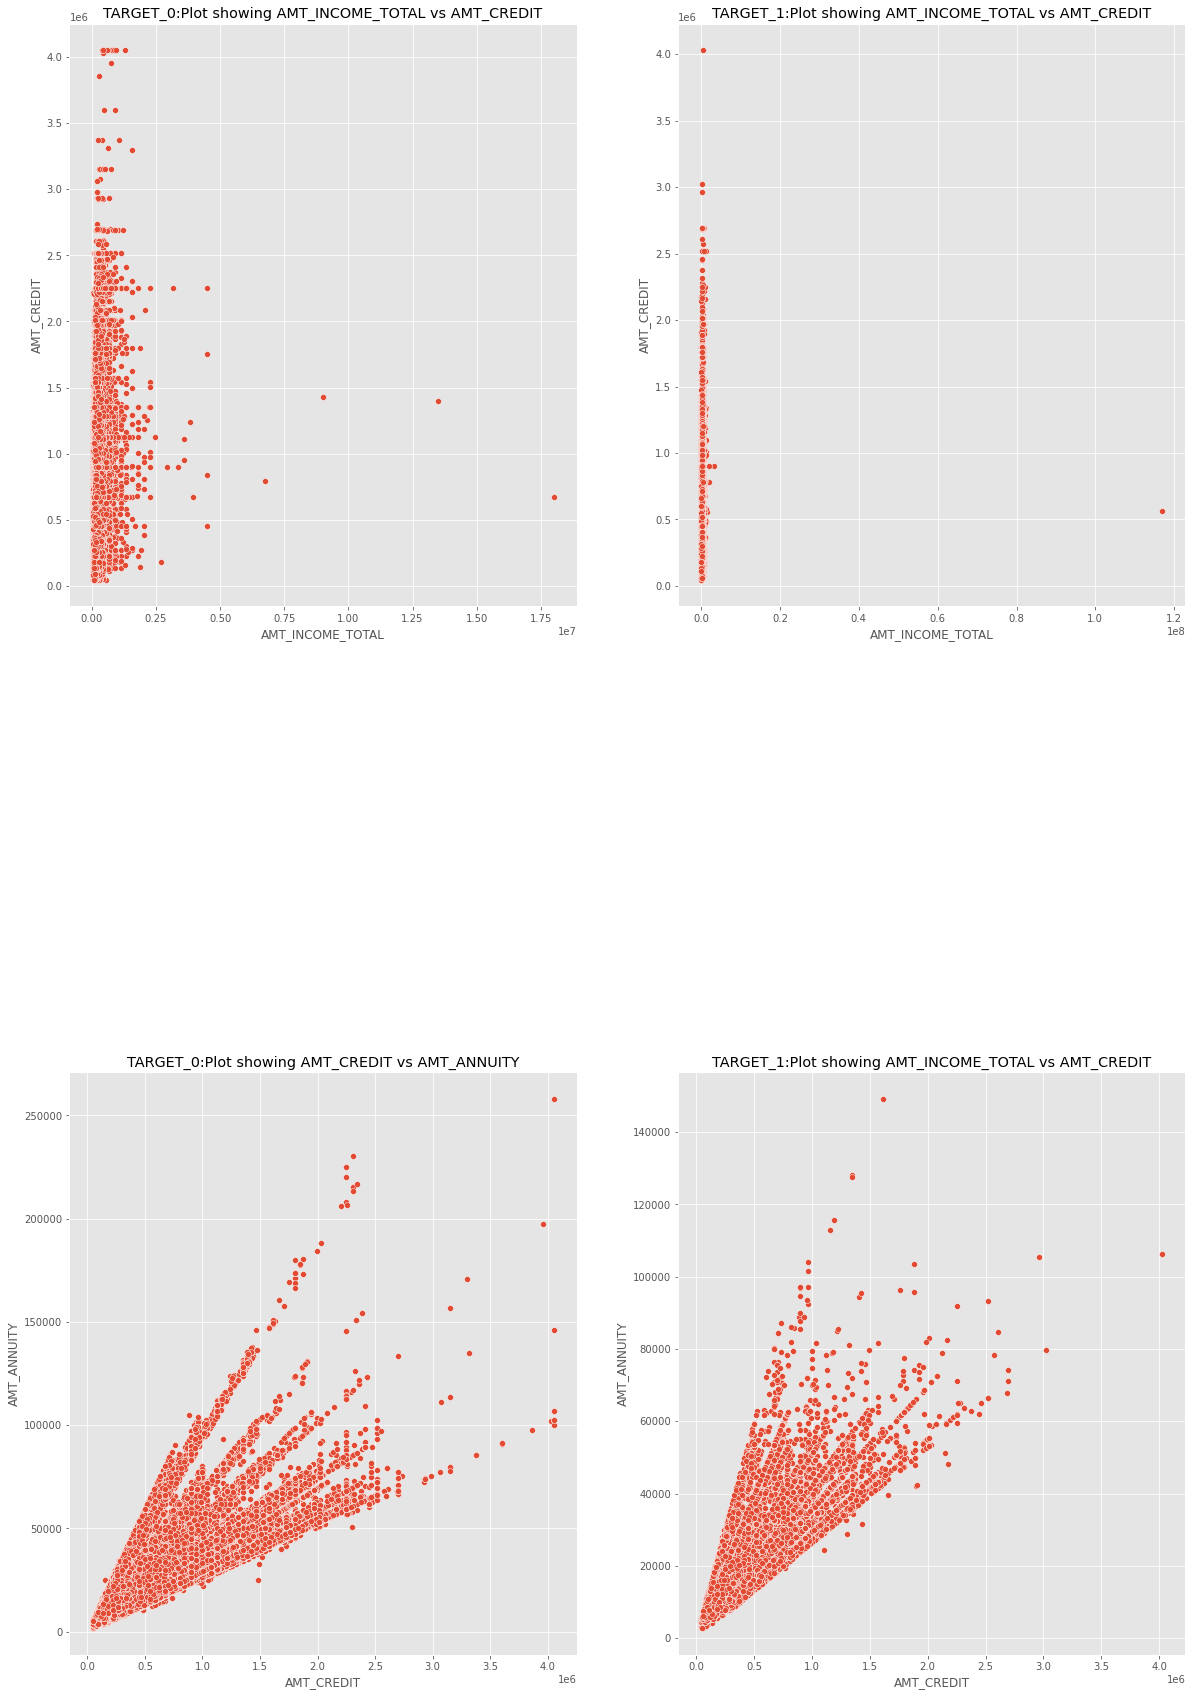

In [102]:
##Bivariate analysis for AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (20,30))
plt.subplot(2, 2, 1)

plt.subplots_adjust(hspace=0.8)

sns.scatterplot(target_0["AMT_INCOME_TOTAL"],target_0["AMT_CREDIT"])
plt.title('TARGET_0:Plot showing AMT_INCOME_TOTAL vs AMT_CREDIT')

#subplot2
plt.subplot(2, 2, 2)

plt.subplots_adjust(hspace=0.8)

sns.scatterplot(target_1["AMT_INCOME_TOTAL"],target_1["AMT_CREDIT"])
plt.title('TARGET_1:Plot showing AMT_INCOME_TOTAL vs AMT_CREDIT')

##Bivariate analysis for AMT_ANNUITY and AMT_CREDIT

# subplot 3
plt.subplot(2, 2, 3)
plt.subplots_adjust(hspace=0.8)
sns.scatterplot(target_0["AMT_CREDIT"],target_0["AMT_ANNUITY"])
plt.title('TARGET_0:Plot showing AMT_CREDIT vs AMT_ANNUITY')


#subplot 4
plt.subplot(2, 2, 4)

plt.subplots_adjust(hspace=0.8)

sns.scatterplot(target_1["AMT_CREDIT"],target_1["AMT_ANNUITY"])
plt.title('TARGET_1:Plot showing AMT_INCOME_TOTAL vs AMT_CREDIT')
plt.show()



Clients with low income and high Credit amount have high chance of defaulting.
For the Credit Amount when Annuity amount is high the clients have high chance of defaulting.

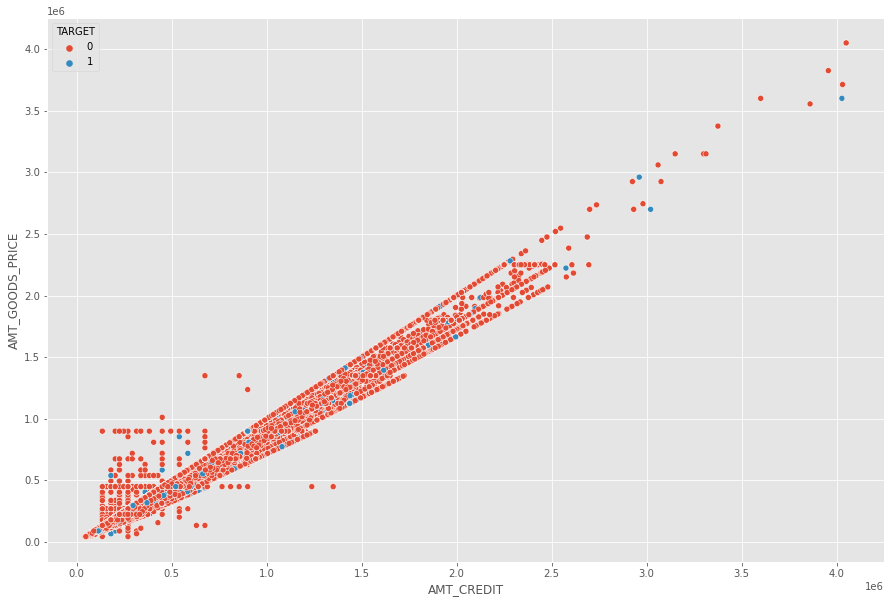

In [103]:
##Bivariate analysis for AMT_GOODS_PRICE and AMT_CREDIT
plt.figure(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=new_appl, hue="TARGET")
plt.show()

Inference : From the above graph it can be inferred that there is a linear relation between the Amt_Credit and Amt_Goods_Price.

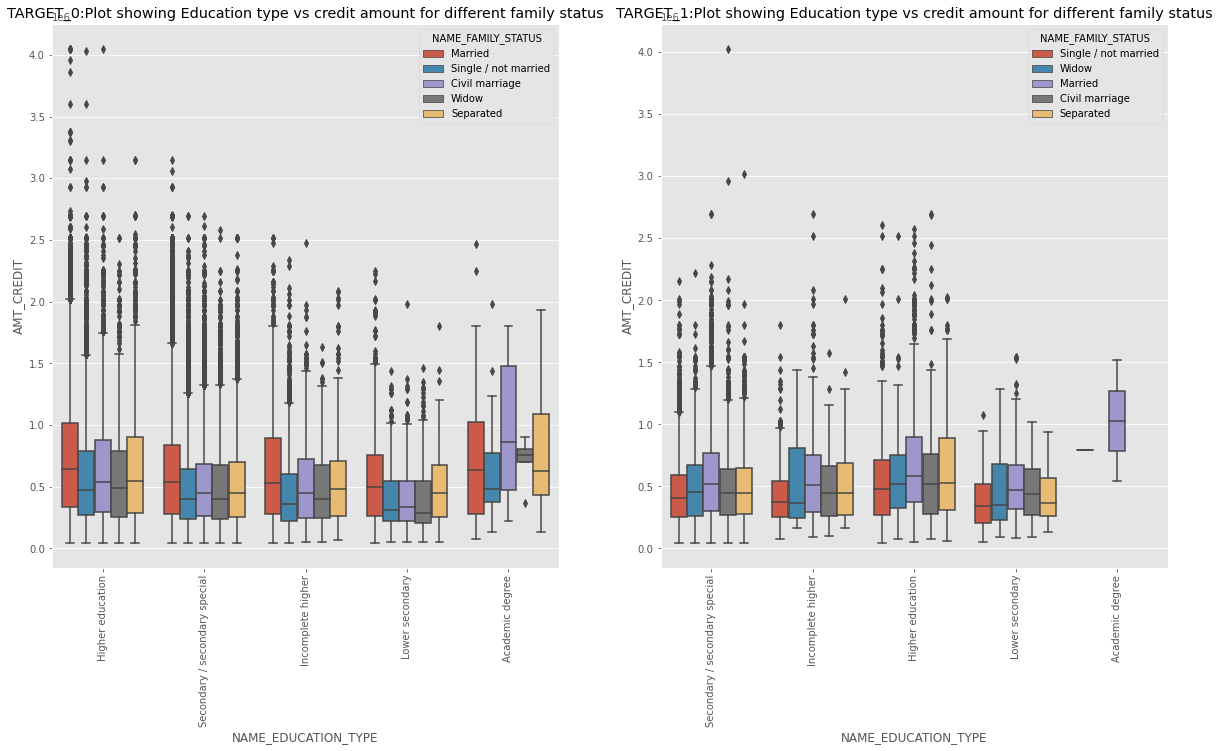

In [104]:
#Boxplot for NAME_EDUCATION_TYPE,AMT_CREDIT,NAME_FAMILY_STATUS
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)



sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS",data=target_0)
plt.title('TARGET_0:Plot showing Education type vs credit amount for different family status')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS",data=target_1)
plt.title('TARGET_1:Plot showing Education type vs credit amount for different family status')

plt.xticks(rotation = 90)
plt.show()


Clients with higher education and married have outliers for the Income amount value.They earn a high salary when compared  to the Academic in all martial status



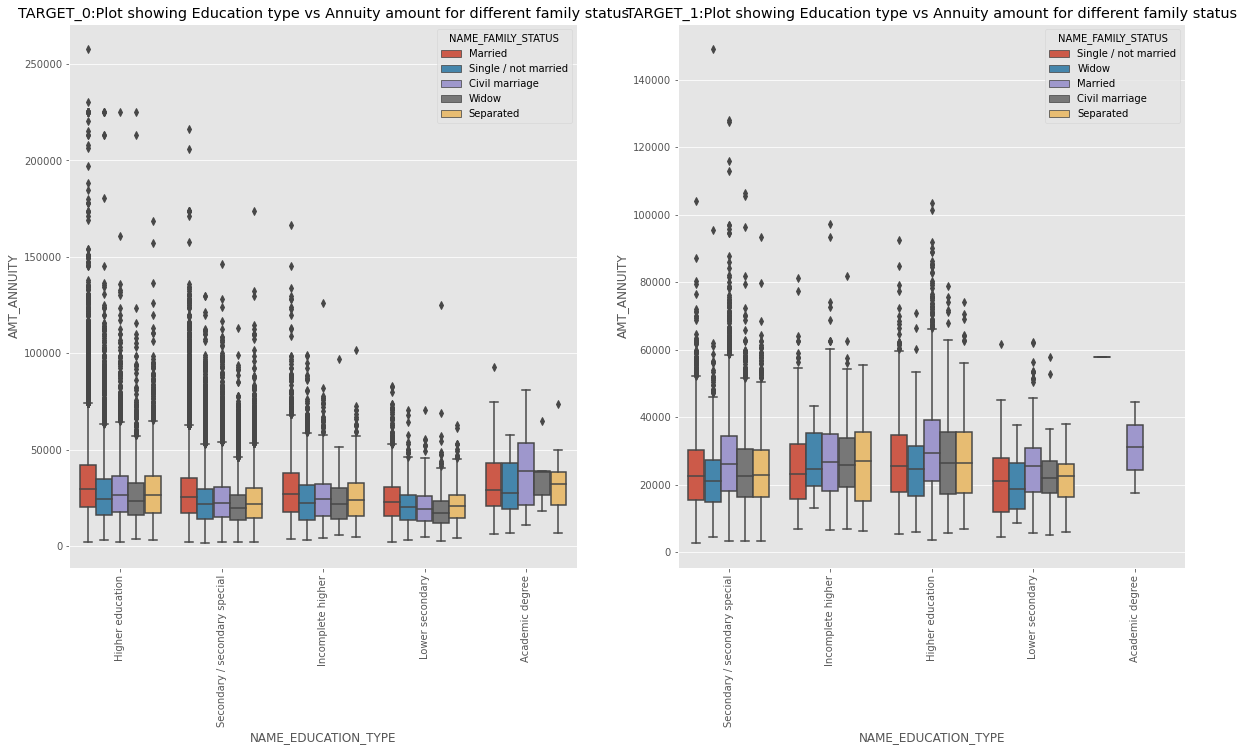

In [105]:
#Boxplot for NAME_EDUCATION_TYPE,AMT_ANNUITY,NAME_FAMILY_STATUS
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)


sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",hue="NAME_FAMILY_STATUS",data=target_0)
plt.title('TARGET_0:Plot showing Education type vs Annuity amount for different family status')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",hue="NAME_FAMILY_STATUS",data=target_1)
plt.title('TARGET_1:Plot showing Education type vs Annuity amount for different family status')

plt.xticks(rotation = 90)
plt.show()


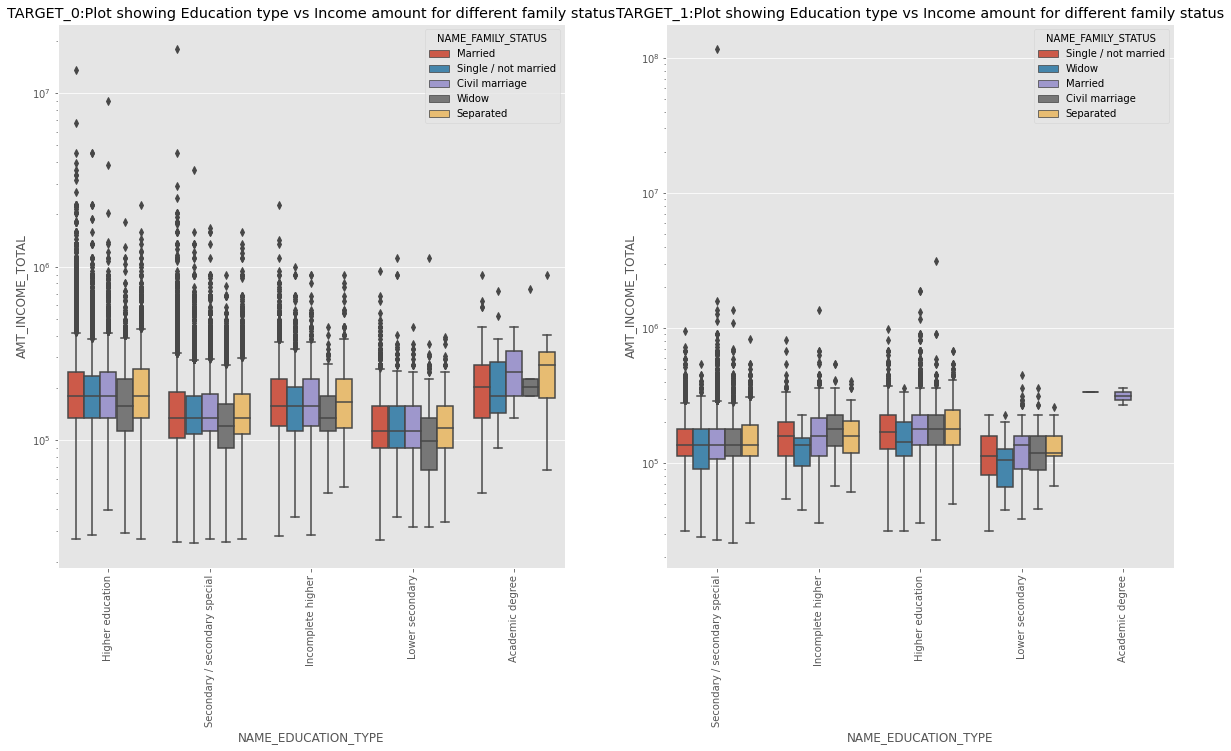

In [106]:
#Boxplot for NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)


sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL",hue="NAME_FAMILY_STATUS",data=target_0)
plt.title('TARGET_0:Plot showing Education type vs Income amount for different family status')
plt.yscale("log")
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL",hue="NAME_FAMILY_STATUS",data=target_1)
plt.title('TARGET_1:Plot showing Education type vs Income amount for different family status')
plt.yscale("log")
plt.xticks(rotation = 90)
plt.show()


Clients with higher education and married have outliers for the Credit amount value, Income amount valu,Annuity value.They have taken very high value for credit .



## Subtask 2.6: CORRELATION MATRIX

In [107]:
#Calculating the Correlation matrix value pearson for Target 0
target0=target_0.iloc[0:,2:]
target0_corr=target0.corr(method='pearson')

In [108]:
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.027408    0.003088   
AMT_INCOME_TOTAL                 0.027408          1.000000    0.342803   
AMT_CREDIT                       0.003088          0.342803    1.000000   
AMT_ANNUITY                      0.020918          0.418950    0.771296   
AMT_GOODS_PRICE                 -0.000550          0.349432    0.987024   
REGION_POPULATION_RELATIVE      -0.024366          0.167855    0.100608   
FLAG_PHONE                      -0.029939          0.002666    0.026735   
FLAG_EMAIL                       0.023461          0.083709    0.017072   
CNT_FAM_MEMBERS                  0.878570          0.034259    0.064544   
REGION_RATING_CLIENT             0.022847         -0.186578   -0.103334   
REGION_RATING_CLIENT_W_CITY      0.021871         -0.200472   -0.112235   
LIVE_REGION_NOT_WORK_REGION      0.017338          0.127665    0.054248   
AGE                             -0.336971         -0.062601    0.047377   
WORK_EXP                        -0.245176         -0.140389   -0.070108   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.020918        -0.000550   
AMT_INCOME_TOTAL                0.418950         0.349432   
AMT_CREDIT                      0.771296         0.987024   
AMT_ANNUITY                     1.000000         0.776422   
AMT_GOODS_PRICE                 0.776422         1.000000   
REGION_POPULATION_RELATIVE      0.120981         0.103828   
FLAG_PHONE                      0.012237         0.041995   
FLAG_EMAIL                      0.071266         0.017225   
CNT_FAM_MEMBERS                 0.075798         0.062773   
REGION_RATING_CLIENT           -0.132117        -0.104354   
REGION_RATING_CLIENT_W_CITY    -0.145142        -0.112577   
LIVE_REGION_NOT_WORK_REGION     0.075459         0.054376   
AGE                            -0.012260         0.044651   
WORK_EXP                       -0.104977        -0.068531   

                             REGION_POPULATION_RELATIVE  FLAG_PHONE  \
CNT_CHILDREN                                  -0.024366   -0.029939   
AMT_INCOME_TOTAL                               0.167855    0.002666   
AMT_CREDIT                                     0.100608    0.026735   
AMT_ANNUITY                                    0.120981    0.012237   
AMT_GOODS_PRICE                                0.103828    0.041995   
REGION_POPULATION_RELATIVE                     1.000000    0.091476   
FLAG_PHONE                                     0.091476    1.000000   
FLAG_EMAIL                                     0.040824    0.014601   
CNT_FAM_MEMBERS                               -0.023431   -0.016287   
REGION_RATING_CLIENT                          -0.539010   -0.084445   
REGION_RATING_CLIENT_W_CITY                   -0.537307   -0.079535   
LIVE_REGION_NOT_WORK_REGION                    0.083978    0.004924   
AGE                                            0.025256    0.041853   
WORK_EXP                                      -0.007193    0.015795   

                             FLAG_EMAIL  CNT_FAM_MEMBERS  \
CNT_CHILDREN                   0.023461         0.878570   
AMT_INCOME_TOTAL               0.083709         0.034259   
AMT_CREDIT                     0.017072         0.064544   
AMT_ANNUITY                    0.071266         0.075798   
AMT_GOODS_PRICE                0.017225         0.062773   
REGION_POPULATION_RELATIVE     0.040824        -0.023431   
FLAG_PHONE                     0.014601        -0.016287   
FLAG_EMAIL                     1.000000         0.019026   
CNT_FAM_MEMBERS                0.019026         1.000000   
REGION_RATING_CLIENT          -0.053766         0.027875   
REGION_RATING_CLIENT_W_CITY   -0.052676         0.028659   
LIVE_REGION_NOT_WORK_REGION    0.026695         0.014553   
AGE                           -0.090797        -0.285822   
WORK_EXP                      -0.064852        -0.238299   

                    

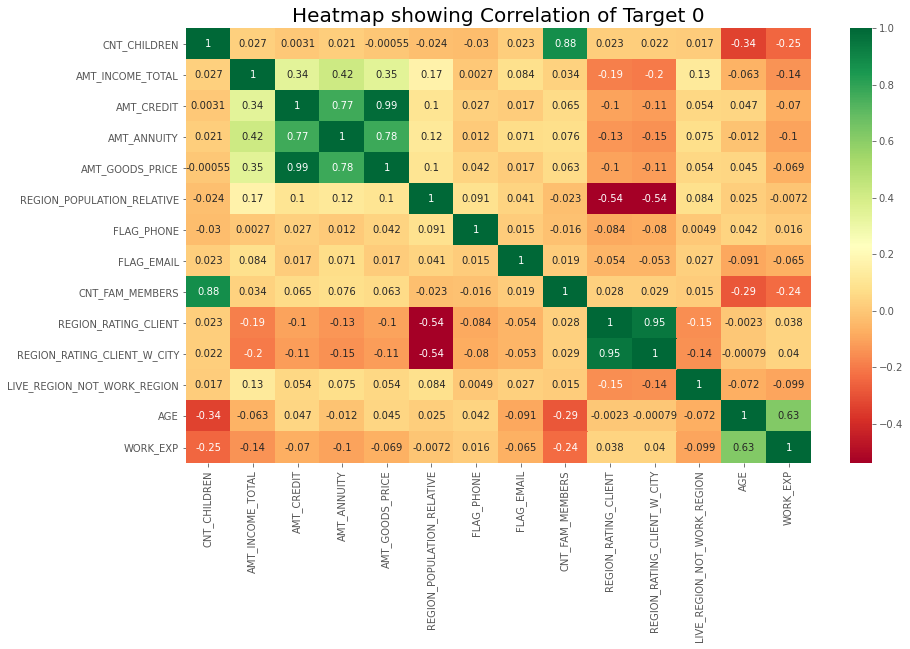

In [109]:
#Plot the heatmap for the above correlation for Target 0
plt.figure(figsize=[14,8])
sns.heatmap(target0_corr,cmap='RdYlGn',fmt='.2g',annot=True)
plt.title("Heatmap showing Correlation of Target 0",fontdict={'fontsize':20,'fontweight':5,'color':'black'})

plt.show()

#### Top 5 Co-Relation Variable :
1. AMT_GOODS_PRICE & AMT_CREDIT
2. REGION_RATING_CLIENT_W_CLIENT & REGION_RATING_CLIENT
3. CNT_FAM_MEMBERS & CNT_CHILDREN
4. AMT_ANNUITY & AMT_GOODS_PRICE
5. AMT_ANNUITY & AMT_CREDIT

In [110]:
##Calculating the Correlation matrix value pearson for Target 1
target1=target_1.iloc[0:,2:]
target1_corr=target0.corr(method='pearson')

In [111]:
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.027408    0.003088   
AMT_INCOME_TOTAL                 0.027408          1.000000    0.342803   
AMT_CREDIT                       0.003088          0.342803    1.000000   
AMT_ANNUITY                      0.020918          0.418950    0.771296   
AMT_GOODS_PRICE                 -0.000550          0.349432    0.987024   
REGION_POPULATION_RELATIVE      -0.024366          0.167855    0.100608   
FLAG_PHONE                      -0.029939          0.002666    0.026735   
FLAG_EMAIL                       0.023461          0.083709    0.017072   
CNT_FAM_MEMBERS                  0.878570          0.034259    0.064544   
REGION_RATING_CLIENT             0.022847         -0.186578   -0.103334   
REGION_RATING_CLIENT_W_CITY      0.021871         -0.200472   -0.112235   
LIVE_REGION_NOT_WORK_REGION      0.017338          0.127665    0.054248   
AGE                             -0.336971         -0.062601    0.047377   
WORK_EXP                        -0.245176         -0.140389   -0.070108   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.020918        -0.000550   
AMT_INCOME_TOTAL                0.418950         0.349432   
AMT_CREDIT                      0.771296         0.987024   
AMT_ANNUITY                     1.000000         0.776422   
AMT_GOODS_PRICE                 0.776422         1.000000   
REGION_POPULATION_RELATIVE      0.120981         0.103828   
FLAG_PHONE                      0.012237         0.041995   
FLAG_EMAIL                      0.071266         0.017225   
CNT_FAM_MEMBERS                 0.075798         0.062773   
REGION_RATING_CLIENT           -0.132117        -0.104354   
REGION_RATING_CLIENT_W_CITY    -0.145142        -0.112577   
LIVE_REGION_NOT_WORK_REGION     0.075459         0.054376   
AGE                            -0.012260         0.044651   
WORK_EXP                       -0.104977        -0.068531   

                             REGION_POPULATION_RELATIVE  FLAG_PHONE  \
CNT_CHILDREN                                  -0.024366   -0.029939   
AMT_INCOME_TOTAL                               0.167855    0.002666   
AMT_CREDIT                                     0.100608    0.026735   
AMT_ANNUITY                                    0.120981    0.012237   
AMT_GOODS_PRICE                                0.103828    0.041995   
REGION_POPULATION_RELATIVE                     1.000000    0.091476   
FLAG_PHONE                                     0.091476    1.000000   
FLAG_EMAIL                                     0.040824    0.014601   
CNT_FAM_MEMBERS                               -0.023431   -0.016287   
REGION_RATING_CLIENT                          -0.539010   -0.084445   
REGION_RATING_CLIENT_W_CITY                   -0.537307   -0.079535   
LIVE_REGION_NOT_WORK_REGION                    0.083978    0.004924   
AGE                                            0.025256    0.041853   
WORK_EXP                                      -0.007193    0.015795   

                             FLAG_EMAIL  CNT_FAM_MEMBERS  \
CNT_CHILDREN                   0.023461         0.878570   
AMT_INCOME_TOTAL               0.083709         0.034259   
AMT_CREDIT                     0.017072         0.064544   
AMT_ANNUITY                    0.071266         0.075798   
AMT_GOODS_PRICE                0.017225         0.062773   
REGION_POPULATION_RELATIVE     0.040824        -0.023431   
FLAG_PHONE                     0.014601        -0.016287   
FLAG_EMAIL                     1.000000         0.019026   
CNT_FAM_MEMBERS                0.019026         1.000000   
REGION_RATING_CLIENT          -0.053766         0.027875   
REGION_RATING_CLIENT_W_CITY   -0.052676         0.028659   
LIVE_REGION_NOT_WORK_REGION    0.026695         0.014553   
AGE                           -0.090797        -0.285822   
WORK_EXP                      -0.064852        -0.238299   

                    

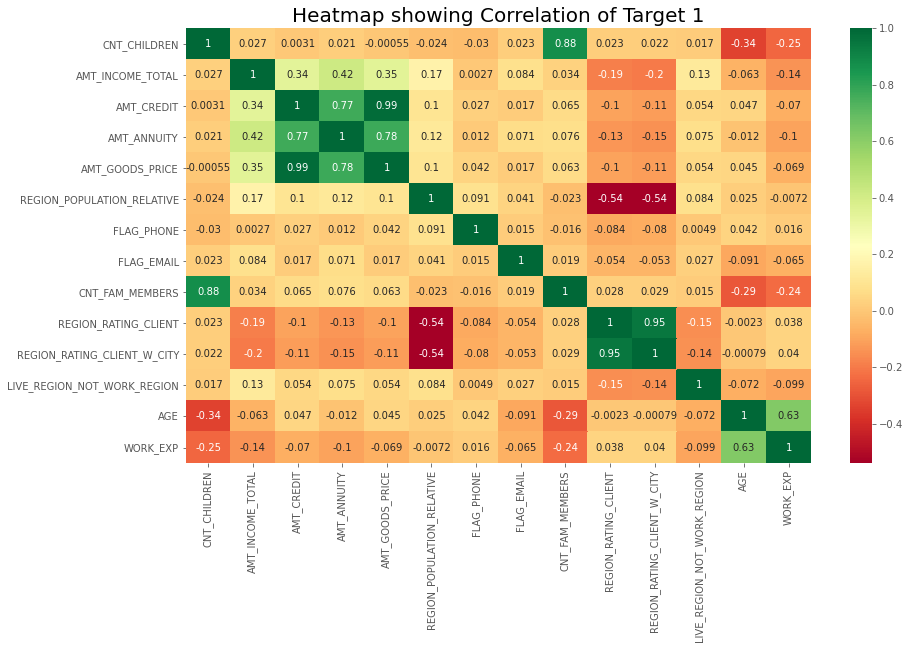

In [112]:
plt.figure(figsize=[14,8])
sns.heatmap(target1_corr,cmap='RdYlGn',fmt='.2g',annot=True)
plt.title("Heatmap showing Correlation of Target 1",fontdict={'fontsize':20,'fontweight':5,'color':'black'})

plt.show()

We can infer the following from target0 and target1 heatmaps:
    
The Age and Work Experience are postively correlated.i.e.,as the Age increase the work experience increases .
AS the age and work experience increase the annuity value tends to decrease.They are negatively correlated.
As the credit value increases the annuity amt also increases
As income increases credit and annuity increases
As the children count increases the family members increases

#### Top 5 Co-Relation Variable :
1. AMT_GOODS_PRICE & AMT_CREDIT
2. REGION_RATING_CLIENT_W_CLIENT & REGION_RATING_CLIENT
3. CNT_FAM_MEMBERS & CNT_CHILDREN
4. AMT_ANNUITY & AMT_GOODS_PRICE
5. AMT_ANNUITY & AMT_CREDIT

## Task 3:ANALYSING PREVIOUS APPLICATION DATASETS

## Subtask 3.1: Inspect the dataframes

In [113]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [114]:
prev_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [115]:
prev_application.shape

(1670214, 37)

## Subtask 3.2 :Handling the missing values



In [116]:
#find the percentage of null values in each column

(prev_application.isnull().sum() * 100 / len(prev_application)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [117]:
prev_application["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [118]:
#replacing missing annuity value with median
prev_application.loc[prev_application["AMT_ANNUITY"].isnull(),"AMT_ANNUITY"]=prev_application["AMT_ANNUITY"].median()

In [119]:
##replacing missing Amt_goods_price value with median
prev_application.loc[prev_application["AMT_GOODS_PRICE"].isnull(),"AMT_GOODS_PRICE"]=prev_application["AMT_GOODS_PRICE"].median()


In [120]:
#find the percentage of null values in each column

(prev_application.isnull().sum() * 100 / len(prev_application)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [121]:
## Dropping columns which have more than 20% null value

prev_application.drop(['AMT_DOWN_PAYMENT',"RATE_DOWN_PAYMENT" ,"RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED", "NAME_TYPE_SUITE" , "CNT_PAYMENT", "DAYS_FIRST_DRAWING" , "DAYS_FIRST_DUE" , "DAYS_LAST_DUE_1ST_VERSION" ,  "DAYS_LAST_DUE" , "DAYS_TERMINATION" , "NFLAG_INSURED_ON_APPROVAL"],axis=1,inplace=True)


In [122]:
prev_application.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [123]:
## Filling 2% missing value with the Highest Mode in PRODUCT_COMBINATION column

prev_application["PRODUCT_COMBINATION"].mode()[0]

'Cash'

In [124]:
prev_application["PRODUCT_COMBINATION"].fillna(prev_application["PRODUCT_COMBINATION"].mode()[0],inplace=True)

In [125]:
#replacing missing annuity value with median
prev_application.loc[prev_application["AMT_CREDIT"].isnull(),"AMT_CREDIT"]=prev_application["AMT_CREDIT"].median()

In [126]:
prev_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

## Subtask 3.4:UNIVARIATE ANALYSIS

In [127]:
#value counts of NAME_CONTRACT_TYPE
prev_application["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [128]:
#Replace the XNA values with NaN for NAME_CONTRACT_TYPE
prev_application.loc[prev_application["NAME_CONTRACT_TYPE"]=='XNA',"NAME_CONTRACT_TYPE"]=prev_application["NAME_CONTRACT_TYPE"].apply(lambda x:np.NaN)

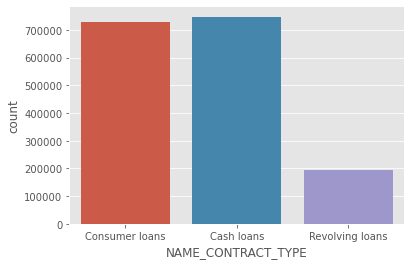

In [129]:
#Plot the chart for NAME_CONTRACT_TYPE
sns.countplot(prev_application['NAME_CONTRACT_TYPE'])
plt.show()

Majority of clients have applied for Cash loans followed by Consumer Loans

In [130]:

#Replace the XNA values with NaN for NAME_CLIENT_TYPE_PREV
prev_application.loc[prev_application["NAME_CLIENT_TYPE"]=='XNA',"NAME_CLIENT_TYPE"]=prev_application["NAME_CLIENT_TYPE"].apply(lambda x:np.NaN)

In [131]:
#Replace the XNA values with NaN for CODE_REJECT_REASON
prev_application.loc[prev_application["CODE_REJECT_REASON"]=='XNA',"CODE_REJECT_REASON"]=prev_application["CODE_REJECT_REASON"].apply(lambda x:np.NaN)

In [132]:
#Replace the XNA values with NaN for NAME_GOODS_CATEGORY
prev_application.loc[prev_application["NAME_GOODS_CATEGORY"]=='XNA',"NAME_GOODS_CATEGORY"]=prev_application["NAME_GOODS_CATEGORY"].apply(lambda x:np.NaN)

In [133]:
##Replace the XNA values with NaN for NAME_PAYMENT_TYPE
prev_application.loc[prev_application["NAME_PAYMENT_TYPE"]=='XNA',"NAME_PAYMENT_TYPE"]=prev_application["NAME_PAYMENT_TYPE"].apply(lambda x:np.NaN)

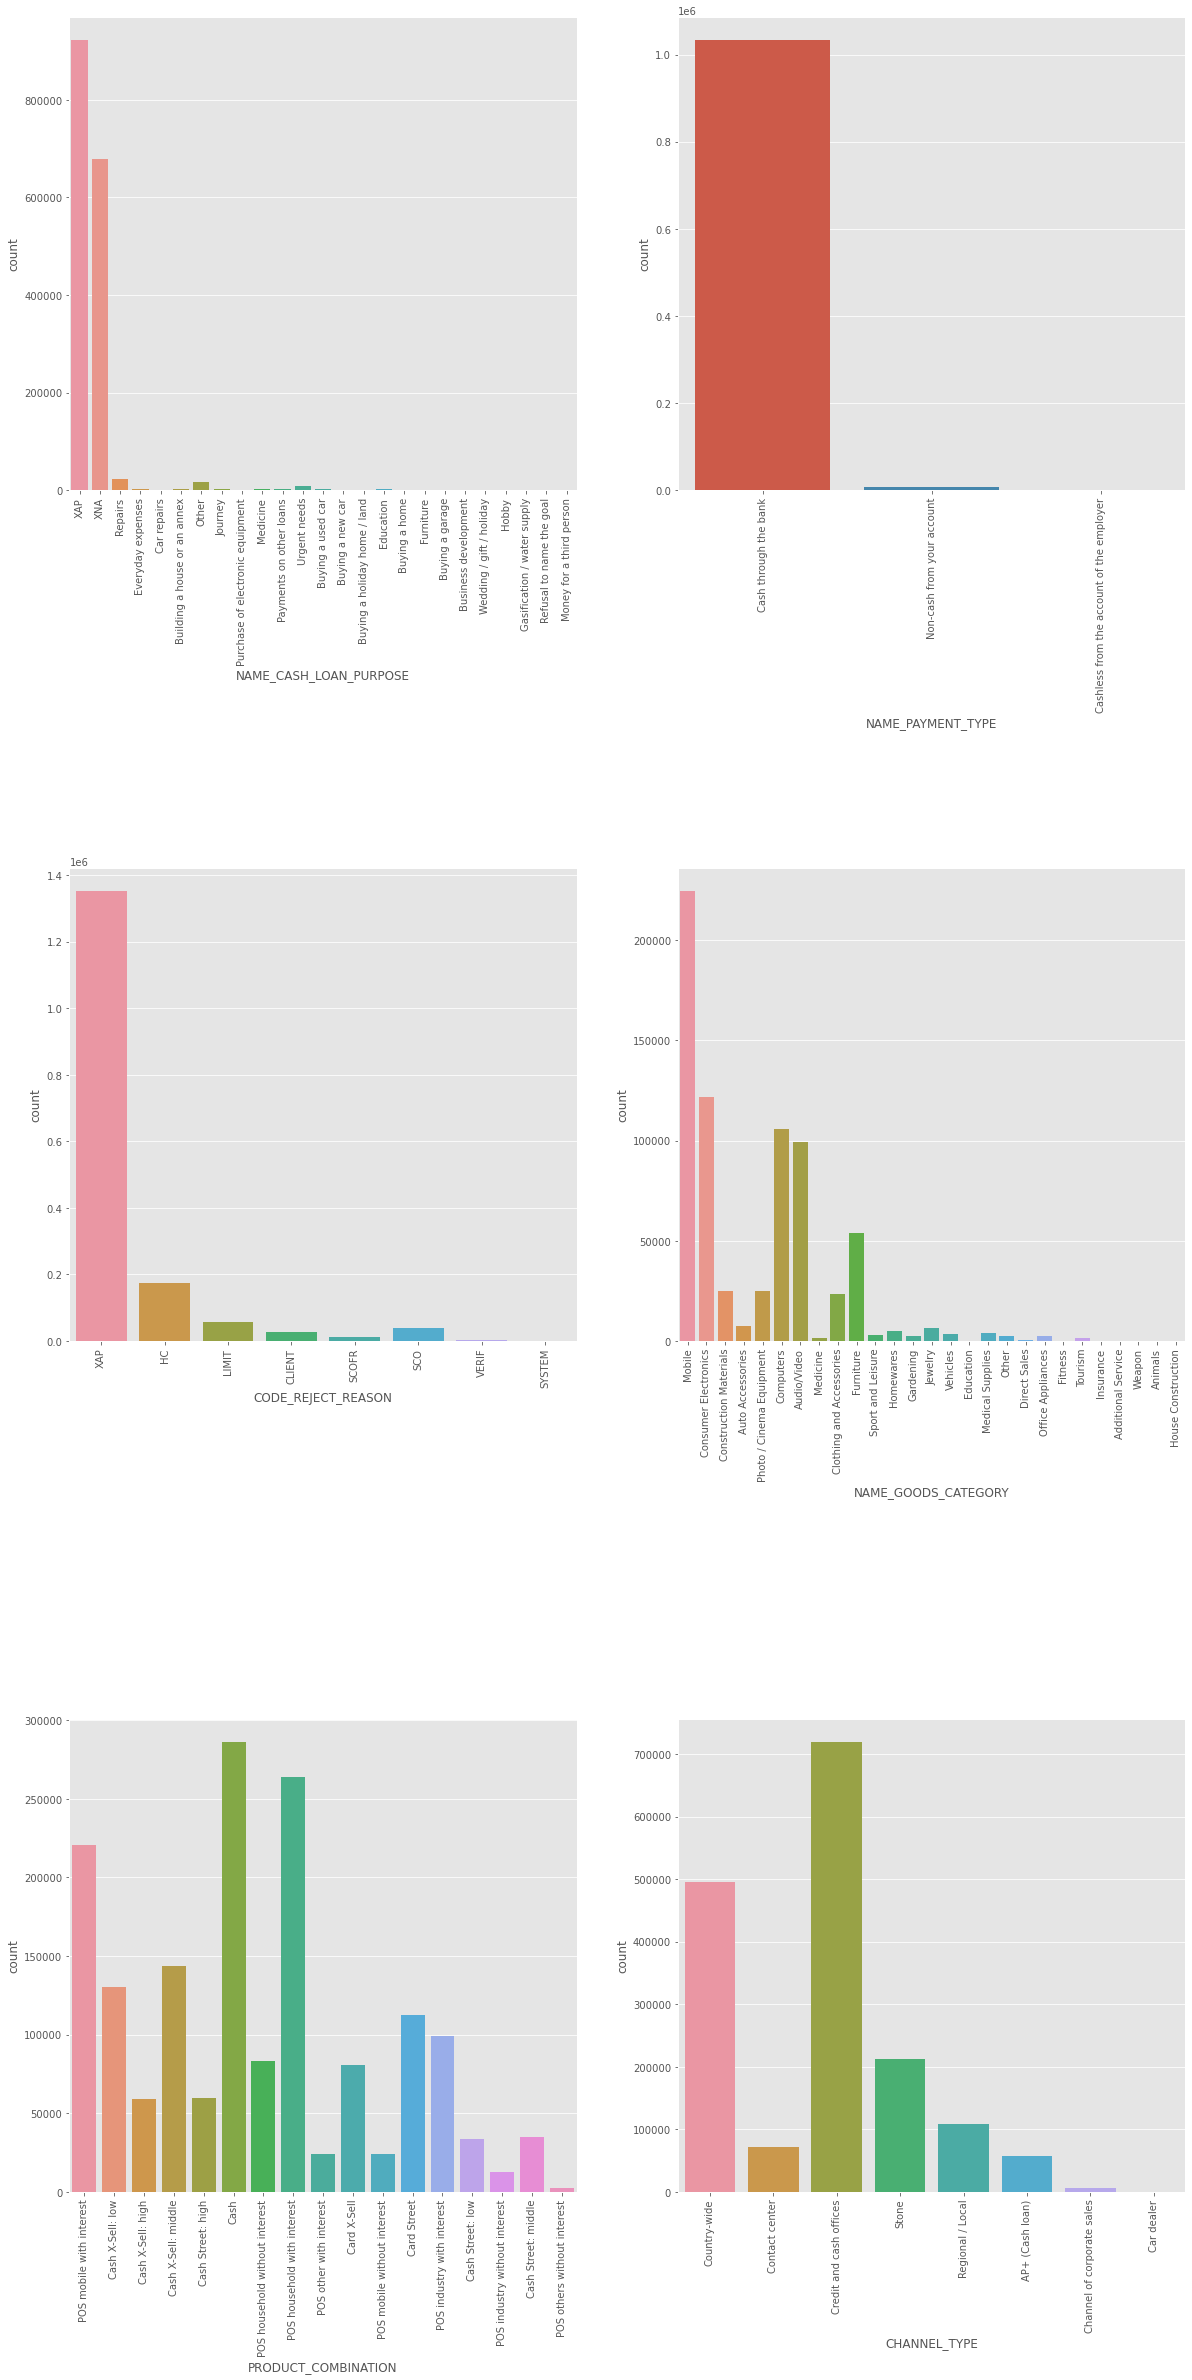

In [134]:
#Univariate Analysis plots for NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,CHANNEL_TYPE,PRODUCT_COMBINATION
plt.figure(figsize=[20,40])
plt.subplot(3,2,1)
sns.countplot(prev_application['NAME_CASH_LOAN_PURPOSE'])
plt.xticks(rotation=90)


plt.subplot(3,2,2)
sns.countplot(prev_application['NAME_PAYMENT_TYPE'])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.8)

plt.subplot(3,2,3)
sns.countplot(prev_application['CODE_REJECT_REASON'])
plt.xticks(rotation=90)


plt.subplot(3,2,4)
sns.countplot(prev_application['NAME_GOODS_CATEGORY'])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.8)
plt.subplot(3,2,5)
sns.countplot(prev_application["PRODUCT_COMBINATION"])
plt.xticks(rotation=90)



plt.subplot(3,2,6)
sns.countplot(prev_application["CHANNEL_TYPE"])
plt.xticks(rotation=90)
plt.show()

#### Inferences from above subplot:

1. Most Loan purpose was not recorded. XAP and XNA values are highest.
2. Most clients preferred CASH as the mode of Payment.
3. Primary reason for the Loan to get rejected is not recorded(XAP (81%)) followed by HC.
4. Most clients applied for Mobile and Consumer electronics.
5. Highest product combination is Cash followed by POS household with interest.
6. Most clients were aquired from Credit and Cash Offices.


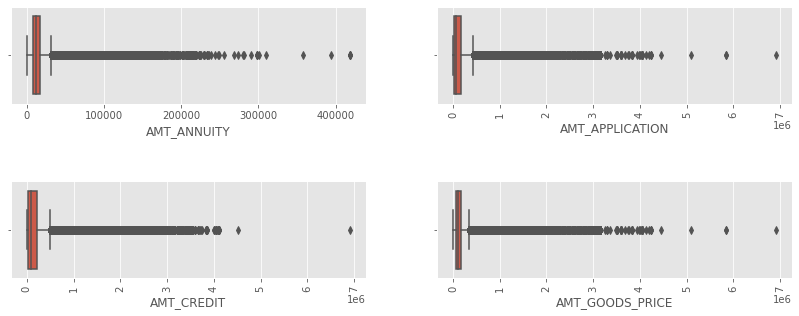

In [135]:
# Plot the boxplot for all the amount values-AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
plt.figure(figsize=[14,5])
plt.subplot(2,2,1)
sns.boxplot(prev_application['AMT_ANNUITY'])



plt.subplot(2,2,2)
sns.boxplot(prev_application['AMT_APPLICATION'])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.8)

plt.subplot(2,2,3)
sns.boxplot(prev_application['AMT_CREDIT'])
plt.xticks(rotation=90)


plt.subplot(2,2,4)
sns.boxplot(prev_application['AMT_GOODS_PRICE'])
plt.xticks(rotation=90)

plt.show()

Inference : It can be seen from the above subplots that all the Amount columns have outliers

In [136]:
#Correlation using pearson method on previous application data
prev1=prev_application.iloc[0:,2:]
prev1_corr=prev1.corr(method='pearson')

In [137]:
prev1_corr

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
AMT_ANNUITY                 1.000000         0.805558    0.811670   
AMT_APPLICATION             0.805558         1.000000    0.975824   
AMT_CREDIT                  0.811670         0.975824    1.000000   
AMT_GOODS_PRICE             0.816293         0.987143    0.971117   
HOUR_APPR_PROCESS_START    -0.023953        -0.014415   -0.021039   
NFLAG_LAST_APPL_IN_DAY      0.015693         0.004310   -0.025179   
DAYS_DECISION               0.190902         0.133660    0.133763   
SELLERPLACE_AREA           -0.011641        -0.007649   -0.009567   

                         AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
AMT_ANNUITY                     0.816293                -0.023953   
AMT_APPLICATION                 0.987143                -0.014415   
AMT_CREDIT                      0.971117                -0.021039   
AMT_GOODS_PRICE                 1.000000                -0.026892   
HOUR_APPR_PROCESS_START        -0.026892                 1.000000   
NFLAG_LAST_APPL_IN_DAY         -0.003426                 0.005789   
DAYS_DECISION                   0.194744                -0.039962   
SELLERPLACE_AREA               -0.011733                 0.015671   

                         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
AMT_ANNUITY                            0.015693       0.190902   
AMT_APPLICATION                        0.004310       0.133660   
AMT_CREDIT                            -0.025179       0.133763   
AMT_GOODS_PRICE                       -0.003426       0.194744   
HOUR_APPR_PROCESS_START                0.005789      -0.039962   
NFLAG_LAST_APPL_IN_DAY                 1.000000       0.016555   
DAYS_DECISION                          0.016555       1.000000   
SELLERPLACE_AREA                       0.000912      -0.018382   

                         SELLERPLACE_AREA  
AMT_ANNUITY                     -0.011641  
AMT_APPLICATION                 -0.007649  
AMT_CREDIT                      -0.009567  
AMT_GOODS_PRICE                 -0.011733  
HOUR_APPR_PROCESS_START          0.015671  
NFLAG_LAST_APPL_IN_DAY           0.000912  
DAYS_DECISION                   -0.018382  
SELLERPLACE_AREA                 1.000000

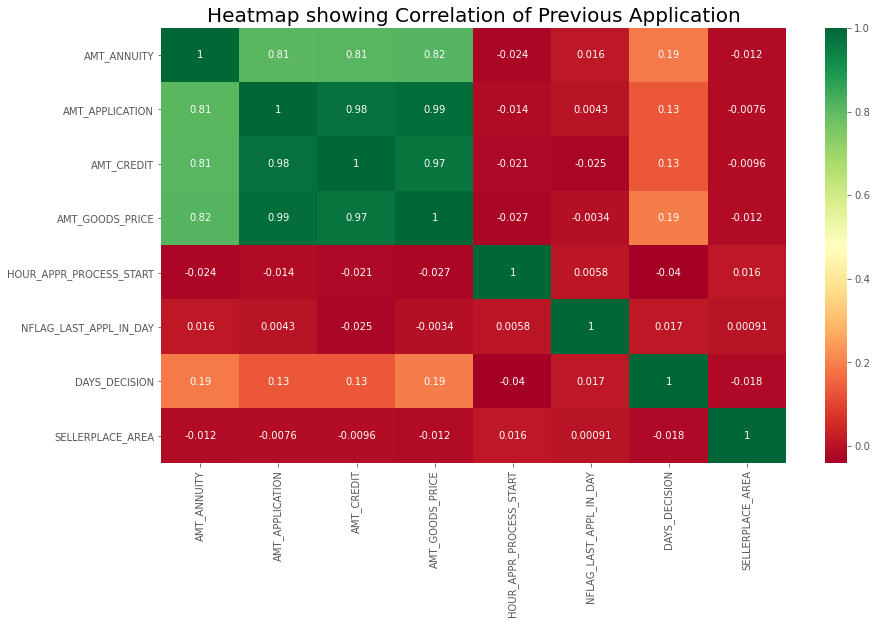

In [138]:
#Plot the heatmap to observe the correlation between attributes
plt.figure(figsize=[14,8])
sns.heatmap(prev1_corr,cmap='RdYlGn',fmt='.2g',annot=True)
plt.title("Heatmap showing Correlation of Previous Application",fontdict={'fontsize':20,'fontweight':5,'color':'black'})

plt.show()

#### Top 5 Co-Relation Variable :
1. AMT_GOODS_PRICE & AMT_APPLICATION
2. AMT_APPLICATION & AMT_CREDIT
3. AMT_GOOD_PRICE & AMT_CREDIT
4. AMT_GOOD_PRICE & AMT_ANNUITY
5. AMT_CREDIT & AMT_ANNUITY

## Task 4:ANALYSIS of the Previous Application and Application data together

## Subtask 4.1:Merging of the Previous Application and Application data together

In [139]:
# Add "Prev" to the column names of Previous Application data
prev_application.columns = prev_application.columns + "_PREV"

In [140]:
# Remove "Prev" from the previous_SK_ID_PREV and previous_SK_ID_CURR columns
prev_application.rename({'SK_ID_PREV_PREV': 'SK_ID_PREV', 'SK_ID_CURR_PREV': 'SK_ID_CURR'}, axis=1, inplace=True)

In [141]:
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV  AMT_ANNUITY_PREV  \
0     2030495      271877          Consumer loans          1730.430   
1     2802425      108129              Cash loans         25188.615   
2     2523466      122040              Cash loans         15060.735   
3     2819243      176158              Cash loans         47041.335   
4     1784265      202054              Cash loans         31924.395   

   AMT_APPLICATION_PREV  AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV  \
0               17145.0          17145.0               17145.0   
1              607500.0         679671.0              607500.0   
2              112500.0         136444.5              112500.0   
3              450000.0         470790.0              450000.0   
4              337500.0         404055.0              337500.0   

  WEEKDAY_APPR_PROCESS_START_PREV  HOUR_APPR_PROCESS_START_PREV  \
0                        SATURDAY                            15   
1                        THURSDAY                            11   
2                         TUESDAY                            11   
3                          MONDAY                             7   
4                        THURSDAY                             9   

  FLAG_LAST_APPL_PER_CONTRACT_PREV  ...  CODE_REJECT_REASON_PREV  \
0                                Y  ...                      XAP   
1                                Y  ...                      XAP   
2                                Y  ...                      XAP   
3                                Y  ...                      XAP   
4                                Y  ...                       HC   

  NAME_CLIENT_TYPE_PREV NAME_GOODS_CATEGORY_PREV  NAME_PORTFOLIO_PREV  \
0              Repeater                   Mobile                  POS   
1              Repeater                      NaN                 Cash   
2              Repeater                      NaN                 Cash   
3              Repeater                      NaN                 Cash   
4              Repeater                      NaN                 Cash   

  NAME_PRODUCT_TYPE_PREV        CHANNEL_TYPE_PREV SELLERPLACE_AREA_PREV  \
0                    XNA             Country-wide                    35   
1                 x-sell           Contact center                    -1   
2                 x-sell  Credit and cash offices                    -1   
3                 x-sell  Credit and cash offices                    -1   
4                walk-in  Credit and cash offices                    -1   

  NAME_SELLER_INDUSTRY_PREV NAME_YIELD_GROUP_PREV  PRODUCT_COMBINATION_PREV  
0              Connectivity                middle  POS mobile with interest  
1                       XNA            low_action          Cash X-Sell: low  
2                       XNA                  high         Cash X-Sell: high  
3                       XNA                middle       Cash X-Sell: middle  
4                       XNA                  high         Cash Street: high  

[5 rows x 25 columns]

In [142]:
#Merge the two dataframes
data_merge=new_appl.merge(prev_application,on="SK_ID_CURR",how="inner")
data_merge.shape

(1413646, 60)

## Subtask 4.2:Explore the Dataframe

In [143]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 60 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   SK_ID_CURR                        1413646 non-null  int64   
 1   TARGET                            1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE                1413646 non-null  object  
 3   CODE_GENDER                       1413646 non-null  object  
 4   FLAG_OWN_CAR                      1413646 non-null  object  
 5   FLAG_OWN_REALTY                   1413646 non-null  object  
 6   CNT_CHILDREN                      1413646 non-null  int64   
 7   AMT_INCOME_TOTAL                  1413646 non-null  float64 
 8   AMT_CREDIT                        1413646 non-null  float64 
 9   AMT_ANNUITY                       1413646 non-null  float64 
 10  AMT_GOODS_PRICE                   1413646 non-null  float64 
 11  NAME_INCOME_TYPE        

In [144]:
data_merge.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413646e+06  1.413646e+06  1.413646e+06      1.413646e+06   
mean   2.784832e+05  8.655632e-02  4.048758e-01      1.733153e+05   
std    1.028121e+05  2.811839e-01  7.173327e-01      1.985770e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893670e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675610e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

         AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.413646e+06  1.413646e+06     1.413646e+06   
mean   5.875603e+05  2.701712e+04     5.276527e+05   
std    3.849227e+05  1.395089e+04     3.531037e+05   
min    4.500000e+04  1.615500e+03     4.050000e+04   
25%    2.700000e+05  1.682100e+04     2.385000e+05   
50%    5.084955e+05  2.492550e+04     4.500000e+05   
75%    8.079840e+05  3.454200e+04     6.795000e+05   
max    4.050000e+06  2.250000e+05     4.050000e+06   

       REGION_POPULATION_RELATIVE    FLAG_PHONE    FLAG_EMAIL  ...  \
count                1.413646e+06  1.413646e+06  1.413646e+06  ...   
mean                 2.074942e-02  2.828473e-01  7.243185e-02  ...   
std                  1.334706e-02  4.503830e-01  2.592017e-01  ...   
min                  2.900000e-04  0.000000e+00  0.000000e+00  ...   
25%                  1.003200e-02  0.000000e+00  0.000000e+00  ...   
50%                  1.885000e-02  0.000000e+00  0.000000e+00  ...   
75%                  2.866300e-02  1.000000e+00  0.000000e+00  ...   
max                  7.250800e-02  1.000000e+00  1.000000e+00  ...   

           WORK_EXP    SK_ID_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION_PREV  \
count  1.413646e+06  1.413646e+06      1.413646e+06          1.413646e+06   
mean   1.990863e+02  1.922738e+06      1.484029e+04          1.752422e+05   
std    3.927126e+02  5.327159e+05      1.316379e+04          2.936238e+05   
min    0.000000e+00  1.000001e+06      0.000000e+00          0.000000e+00   
25%    2.850000e+00  1.461337e+06      7.405841e+03          1.975050e+04   
50%    6.580000e+00  1.922686e+06      1.125000e+04          7.087050e+04   
75%    1.730000e+01  2.384010e+06      1.674730e+04          1.800000e+05   
max    1.000670e+03  2.845381e+06      4.180581e+05          5.850000e+06   

       AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV  HOUR_APPR_PROCESS_START_PREV  \
count     1.413646e+06          1.413646e+06                  1.413646e+06   
mean      1.963528e+05          2.006542e+05                  1.247887e+01   
std       3.194834e+05          2.820206e+05                  3.331485e+00   
min       0.000000e+00          0.000000e+00                  0.000000e+00   
25%       2.487915e+04          6.637500e+04                  1.000000e+01   
50%       8.059500e+04          1.123200e+05                  1.200000e+01   
75%       2.156400e+05          1.800000e+05                  1.500000e+01   
max       4.509688e+06          5.850000e+06                  2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY_PREV  DAYS_DECISION_PREV  SELLERPLACE_AREA_PREV  
count                 1.413646e+06        1.413646e+06           1.413646e+06  
mean                  9.964319e-01       -8.803712e+02           3.149935e+02  
std                   5.962675e-02        7.835434e+02           7.695231e+03  
min                   0.000000e+00       -2.922000e+03          -1.000000e+00  
25%                   1.000000e+00       -1.313000e+03          -1.000000e+00  
50%                   1.000000e+00       -5.820000e+02           4.000000e+00  
75%                   1.000000e+00       -2.710000e+02           8.500000e+01  
max                   1.000000e+00       -1.000000e+00           4.000000e+06  

[8 rows x 25 columns]

In [145]:
#Seperate the data_merge df into two dataframe defaulter and non-defaulter based on Target value
defaulter=data_merge[data_merge["TARGET"]==1]
non_defaulter=data_merge[data_merge["TARGET"]==0]

In [146]:
defaulter.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
161      100047       1         Cash loans           M            N   
162      100047       1         Cash loans           M            N   
163      100047       1         Cash loans           M            N   
164      100047       1         Cash loans           M            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
161               Y             0          202500.0   1193580.0      35028.0   
162               Y             0          202500.0   1193580.0      35028.0   
163               Y             0          202500.0   1193580.0      35028.0   
164               Y             0          202500.0   1193580.0      35028.0   

     ...  CODE_REJECT_REASON_PREV NAME_CLIENT_TYPE_PREV  \
0    ...                      XAP                   New   
161  ...                      XAP              Repeater   
162  ...                      XAP             Refreshed   
163  ...                    LIMIT              Repeater   
164  ...                      XAP                   New   

     NAME_GOODS_CATEGORY_PREV NAME_PORTFOLIO_PREV NAME_PRODUCT_TYPE_PREV  \
0                    Vehicles                 POS                    XNA   
161                       NaN               Cards                 x-sell   
162                       NaN                Cash                 x-sell   
163                       NaN                Cash                walk-in   
164  Photo / Cinema Equipment                 POS                    XNA   

           CHANNEL_TYPE_PREV  SELLERPLACE_AREA_PREV  \
0                      Stone                    500   
161  Credit and cash offices                     -1   
162  Credit and cash offices                     -1   
163  Credit and cash offices                     -1   
164             Country-wide                     27   

     NAME_SELLER_INDUSTRY_PREV NAME_YIELD_GROUP_PREV  PRODUCT_COMBINATION_PREV  
0              Auto technology            low_normal   POS other with interest  
161                        XNA                   XNA               Card X-Sell  
162                        XNA                  high         Cash X-Sell: high  
163                        XNA            low_normal          Cash Street: low  
164               Connectivity            low_normal  POS mobile with interest  

[5 rows x 60 columns]

In [147]:
non_defaulter.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100003       0         Cash loans           F            N   
3      100003       0         Cash loans           F            N   
4      100004       0    Revolving loans           M            Y   
5      100006       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               N             0          270000.0   1293502.5      35698.5   
3               N             0          270000.0   1293502.5      35698.5   
4               Y             0           67500.0    135000.0       6750.0   
5               Y             0          135000.0    312682.5      29686.5   

   ...  CODE_REJECT_REASON_PREV NAME_CLIENT_TYPE_PREV  \
1  ...                      XAP              Repeater   
2  ...                      XAP             Refreshed   
3  ...                      XAP             Refreshed   
4  ...                      XAP                   New   
5  ...                      XAP              Repeater   

  NAME_GOODS_CATEGORY_PREV NAME_PORTFOLIO_PREV NAME_PRODUCT_TYPE_PREV  \
1                      NaN                Cash                 x-sell   
2                Furniture                 POS                    XNA   
3     Consumer Electronics                 POS                    XNA   
4                   Mobile                 POS                    XNA   
5                      NaN                Cash                 x-sell   

         CHANNEL_TYPE_PREV  SELLERPLACE_AREA_PREV  NAME_SELLER_INDUSTRY_PREV  \
1  Credit and cash offices                     -1                        XNA   
2                    Stone                   1400                  Furniture   
3             Country-wide                    200       Consumer electronics   
4         Regional / Local                     30               Connectivity   
5  Credit and cash offices                     -1                        XNA   

  NAME_YIELD_GROUP_PREV     PRODUCT_COMBINATION_PREV  
1            low_normal             Cash X-Sell: low  
2                middle   POS industry with interest  
3                middle  POS household with interest  
4                middle  POS mobile without interest  
5            low_normal             Cash X-Sell: low  

[5 rows x 60 columns]

## Subtask 4.3:Univariate Analysis

In [148]:
#code for the distribution of various numerical amount values
def plot_univariate_displot(variable):
    plt.figure(figsize=[14,5])
    plt.style.use('ggplot')
    sns.distplot(defaulter[variable],hist=False,label='payment difficulties')
    sns.distplot(non_defaulter[variable],hist=False,label='others')
    plt.title("Plot showing distribution of the {} for Target_0 and Target_1 ".format(variable),fontdict={'fontsize':20,'fontweight':5,'color':'black'})
    plt.xlabel("{}".format(variable),fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.ylabel("frequency",fontdict={'fontsize':12,'fontweight':5,'color':'black'})
    plt.legend()
    plt.show()

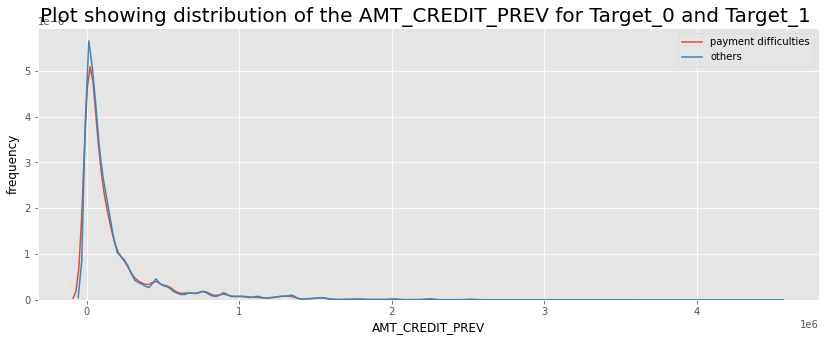

In [149]:
#Distribution plot for the AMT_CREDIT
plot_univariate_displot('AMT_CREDIT_PREV')

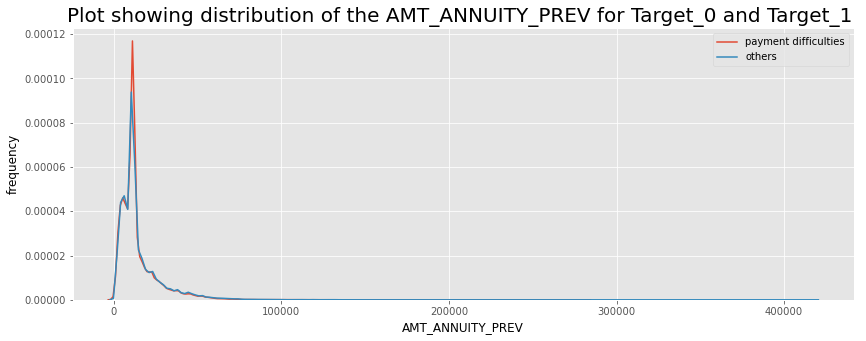

In [150]:
#Distribution plot for the AMT_ANNUITY
plot_univariate_displot('AMT_ANNUITY_PREV')

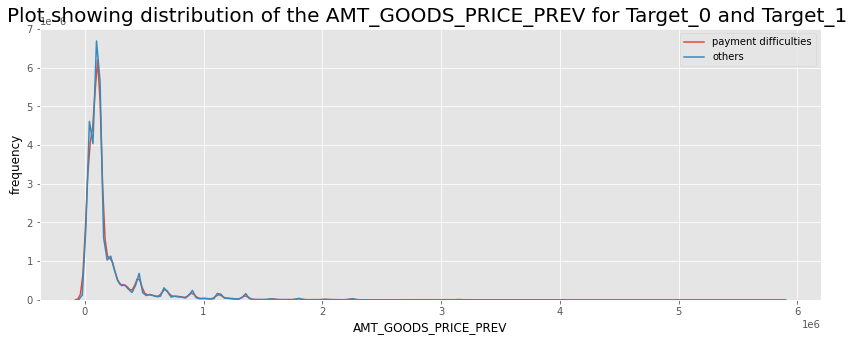

In [151]:
#Distribution plot for the AMT_GOODS_PRICE
plot_univariate_displot('AMT_GOODS_PRICE_PREV')

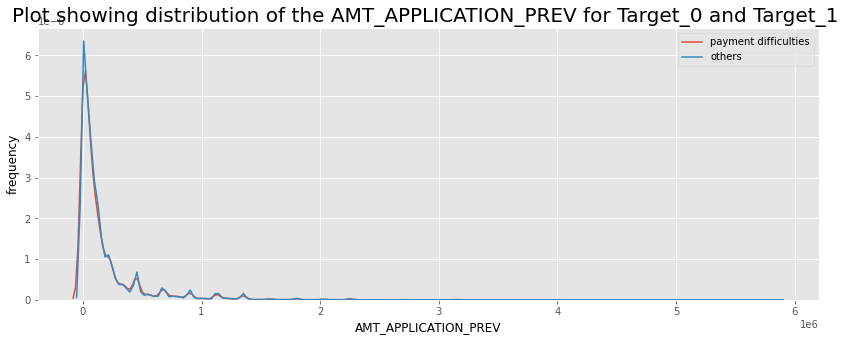

In [152]:
#Distribution plot for the AMT_APPLICATION
plot_univariate_displot('AMT_APPLICATION_PREV')

 Inference : The pattern is the quite similar for defaulters and non-defaulters with the AMT_CREDIT,AMT_GOODS_PRICE,AMT_APPLICATION,AMT_ANNUITY

In [153]:

#code for the distribution of various numerical amount values
def plot_univariate_countplot(variable):
    plt.figure(figsize = (10,5))
    sns.countplot(x=variable,hue='TARGET',data=data_merge)
    plt.title('Plot showing {} vs count for Target=0 and Target 1 '.format(variable))

    plt.xticks(rotation = 90)

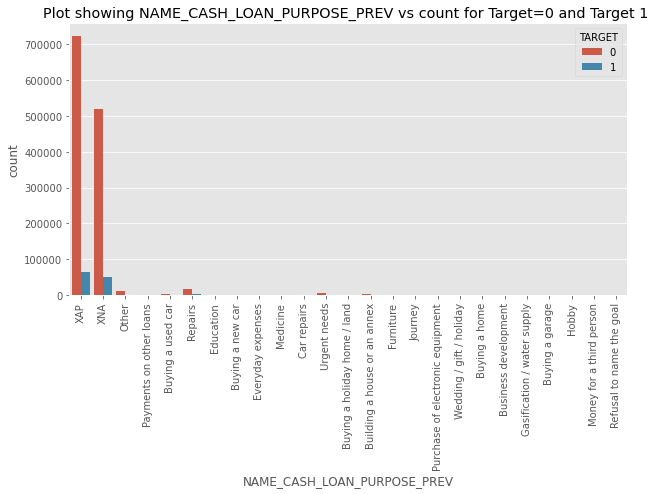

In [154]:
plot_univariate_countplot("NAME_CASH_LOAN_PURPOSE_PREV")

The Count of most of the Cash Loan Purpose of the previous applications is unknown. Also its count is higher in non defaulter clients as compared to defaulter clients.

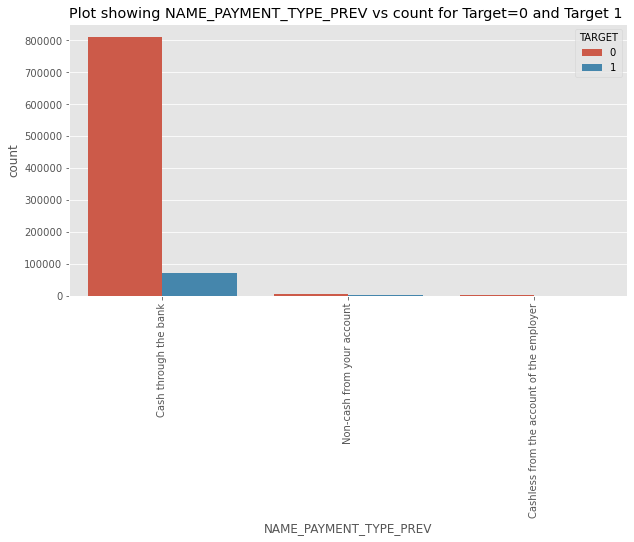

In [155]:
plot_univariate_countplot("NAME_PAYMENT_TYPE_PREV")       

Inference : Majority of payment for the prev application is made through cash.So the defaulters and non-defaulters have same payment type. 

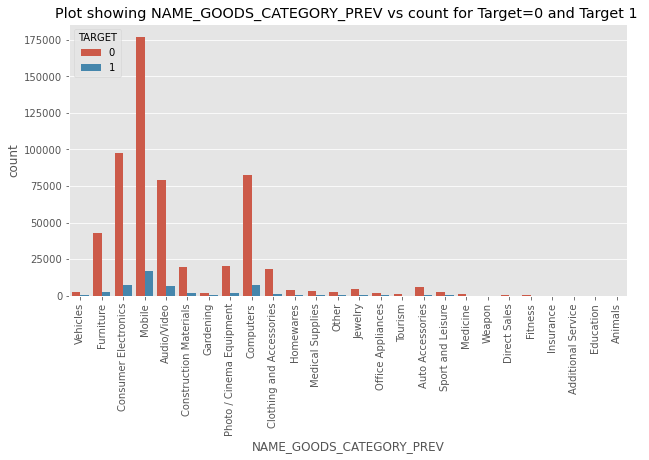

In [156]:
plot_univariate_countplot("NAME_GOODS_CATEGORY_PREV")                

Inference : For the prev application the defaulters and non-defaulters clients haven taken the higher count of loans  for Mobiles followed by Consumer Electronics and Computers 

In [157]:
#code for the distribution of various numerical amount values
def plot_univariate_piechart(variable):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[12,5])
    plt.title("Plot showing {} vs count for Target=0 and Target =1".format(variable),fontdict={'fontsize':20,'fontweight':5,'color':'black'})
    non_defaulter[variable].value_counts().plot(kind='pie',ax=ax1,title="Non-Defaulters",autopct="%.2f%%",startangle=90,
                                                         )
   
    defaulter[variable].value_counts().plot(kind='pie',ax=ax2,title="Defaulter",autopct="%.2f%%",startangle=90,
                                                         )
   

    plt.show()

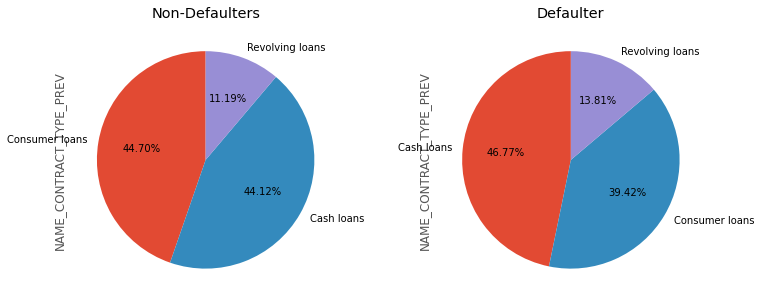

In [158]:
plot_univariate_piechart('NAME_CONTRACT_TYPE_PREV')

The percentage of clients from prev applications  for cash loans and revolving loans were higher for defaulters than those of the non-defaulters.

The percentage of clients from prev applications for consumer loans was higher for non-defaulters when compared to the defaulters.

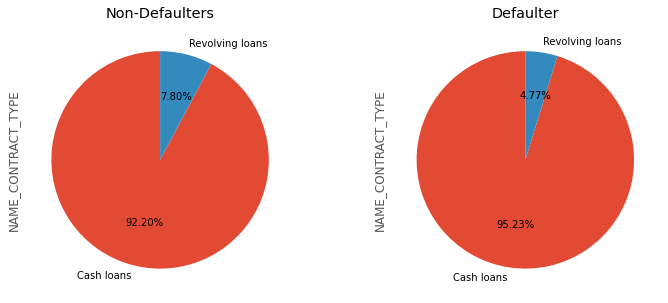

In [159]:
plot_univariate_piechart('NAME_CONTRACT_TYPE')

The percentage of new application from non defaulters for Revolving loans is higher than those in defaulters

The percentage of new application from defaulters for Cash loans is higher than those in non - defaulters

In the New application no Consumer loans were applied unlinke in previous applications. 

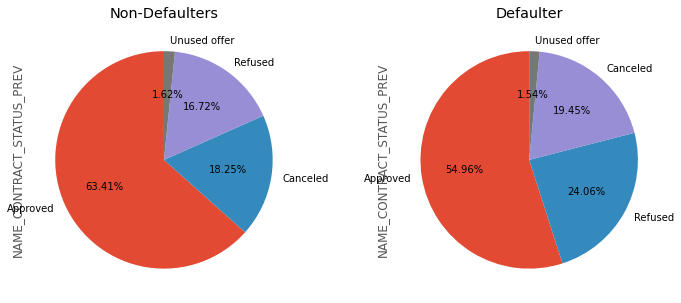

In [160]:
plot_univariate_piechart('NAME_CONTRACT_STATUS_PREV')

The percentage of defaulters from prev applications  for refused is higher than that of the non-defaulters.

The percentage of non-defaulters from prev applications  for approved is higher than that of the defaulters.

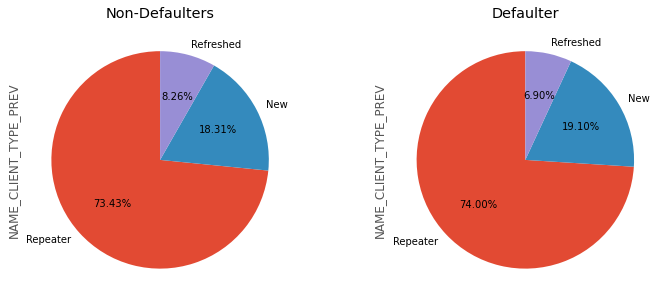

In [161]:
plot_univariate_piechart('NAME_CLIENT_TYPE_PREV')

The percentages of defaulters previous applications from new and repeaters clients were higher than those of the non-defaulters.

The percentage of non-defaulters previous applications from refreshed clients was higher than those of the defaulters.

## Subtask 4.4:Bivariate Analysis

In [162]:
##Code for Bivariate analysis for different variables
def plot_bivariate_countplot(variable1,variable2):
    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    
    sns.countplot(x=variable1,hue=variable2,data=non_defaulter)
    plt.title('Plot showing {} vs {} for Non_Defaulters '.format(variable1,variable2))
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    
    sns.countplot(x=variable1,hue=variable2,data=defaulter)
    plt.title('Plot showing {} vs {} for Defaulters '.format(variable1,variable2))
    plt.xticks(rotation = 90)
    plt.show()

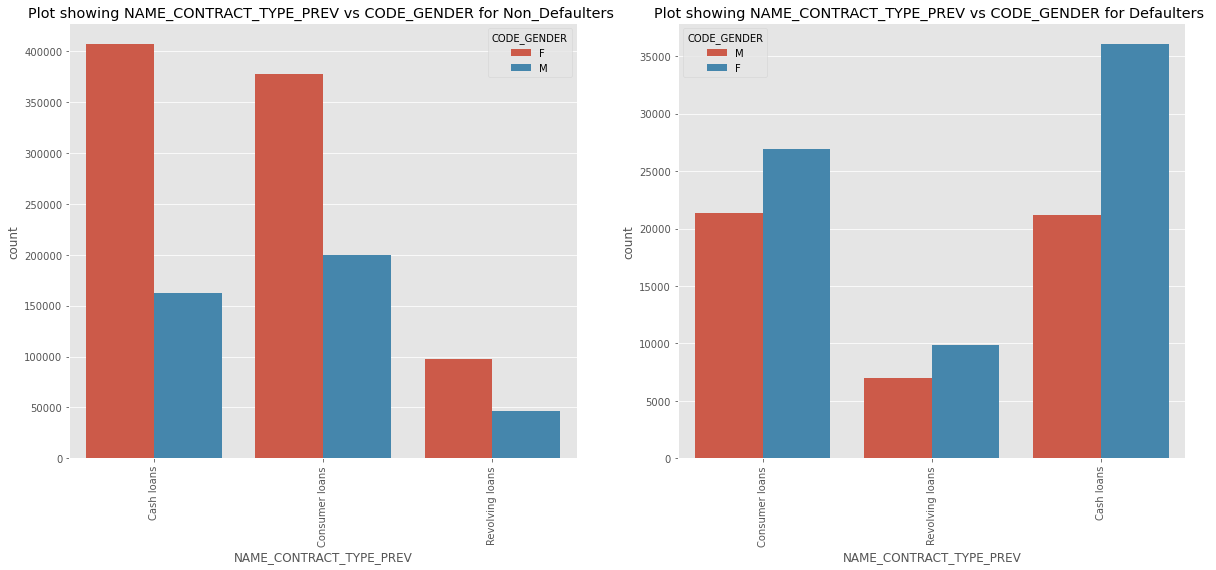

In [163]:
plot_bivariate_countplot('NAME_CONTRACT_TYPE_PREV','CODE_GENDER')

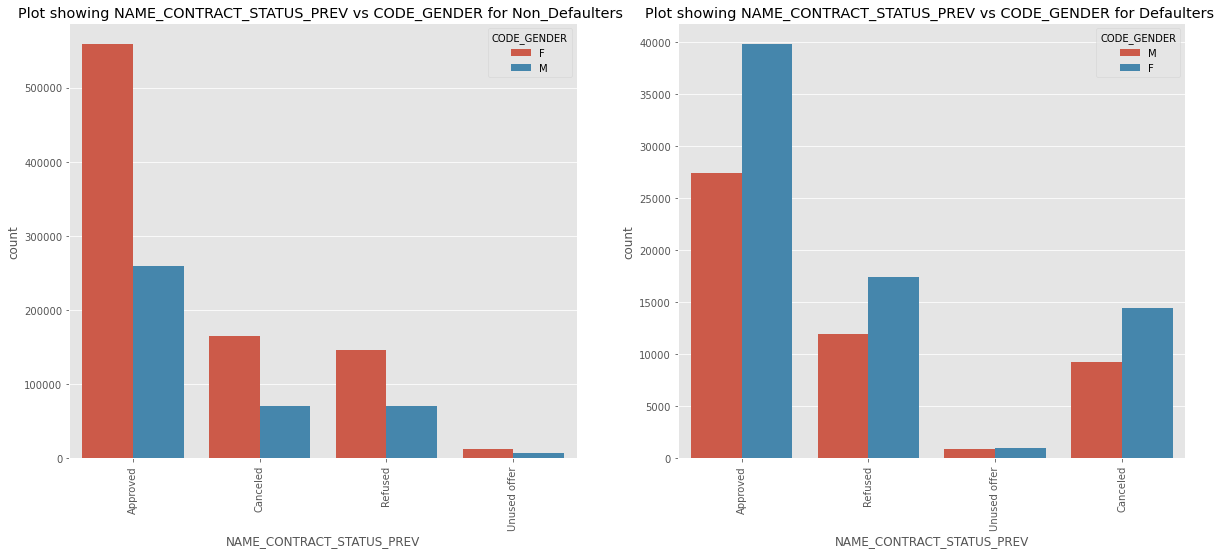

In [164]:
plot_bivariate_countplot('NAME_CONTRACT_STATUS_PREV','CODE_GENDER')

The percentage of the Female client applying for loan(preferably Cash loans followed by consumer loan) and getting approved is more when compared to Male.

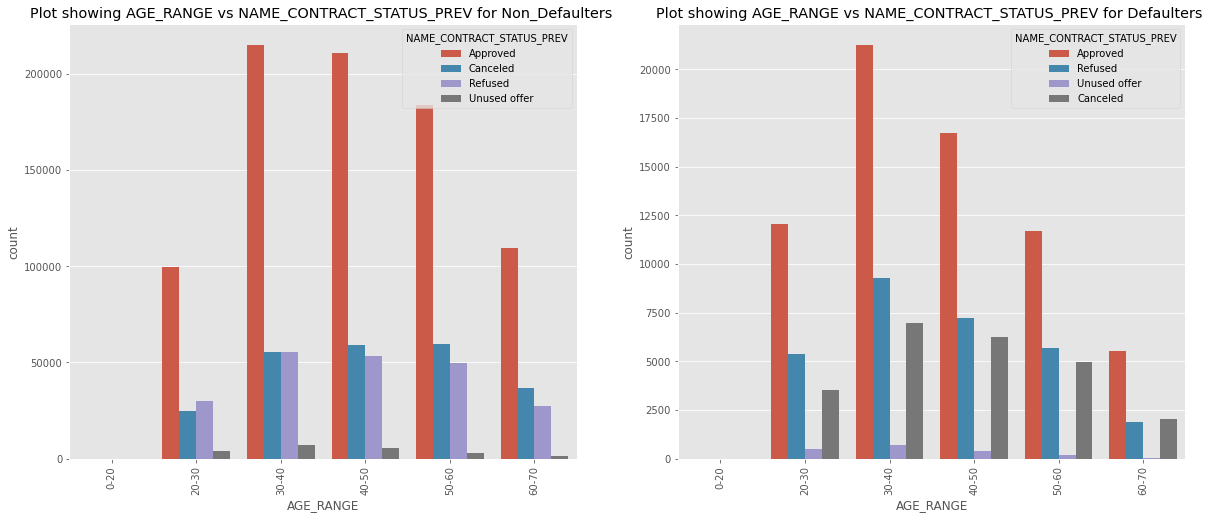

In [165]:
plot_bivariate_countplot('AGE_RANGE','NAME_CONTRACT_STATUS_PREV')

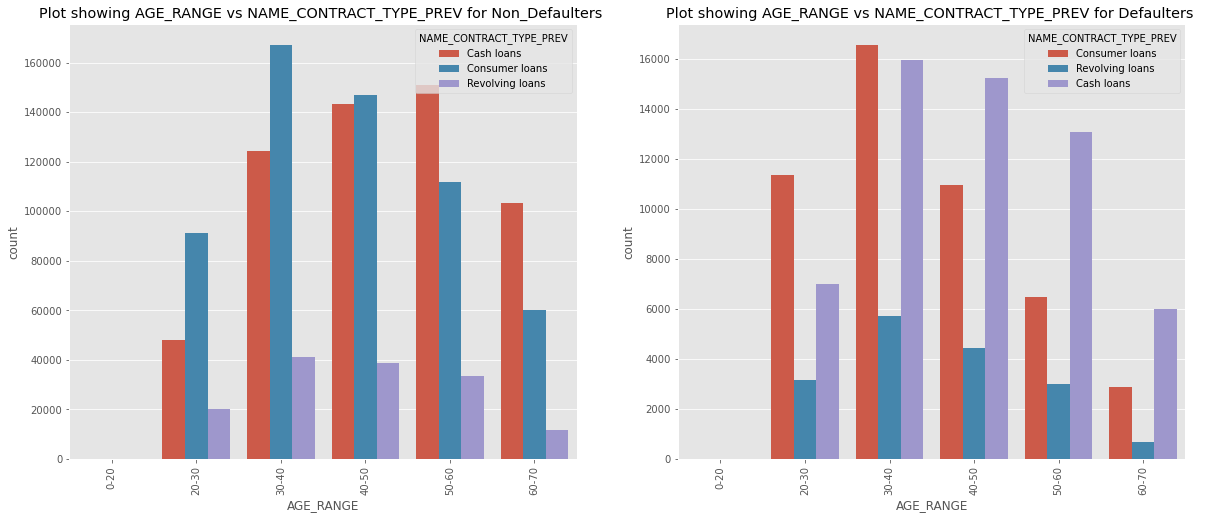

In [166]:
plot_bivariate_countplot('AGE_RANGE','NAME_CONTRACT_TYPE_PREV')   

The clients in the age group of 30-60 having Approved and Unused offer from previous application status and those applied for Cash/Consumer loan tend to be non defaulters.
The clients in the age group of 20-30 having Cancelled and Refused from previous application status and those applied for  Revolving loans have more chance to be defaulters.


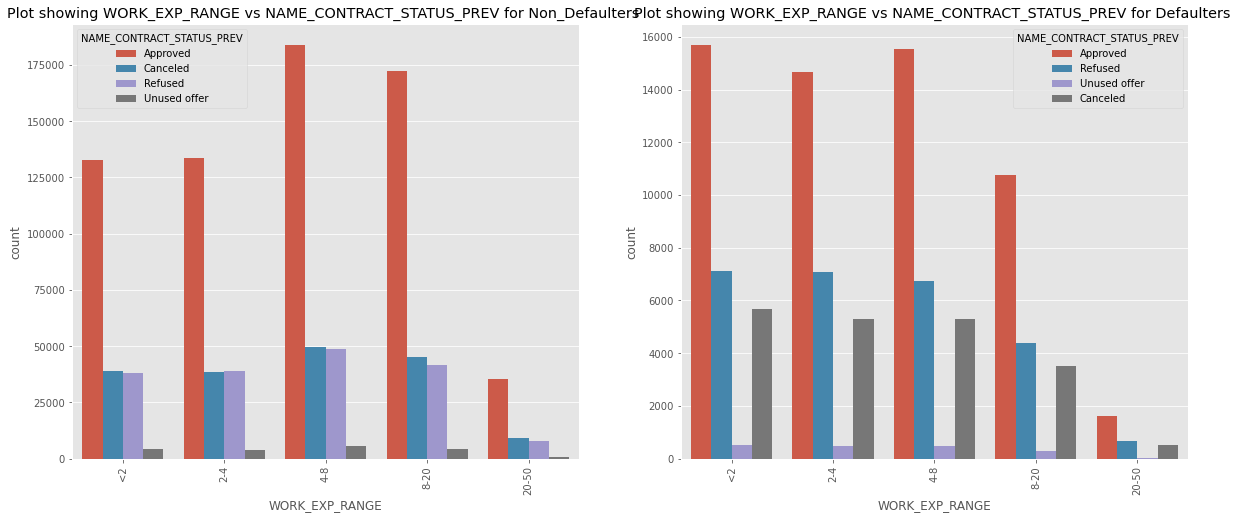

In [167]:
plot_bivariate_countplot('WORK_EXP_RANGE','NAME_CONTRACT_STATUS_PREV')

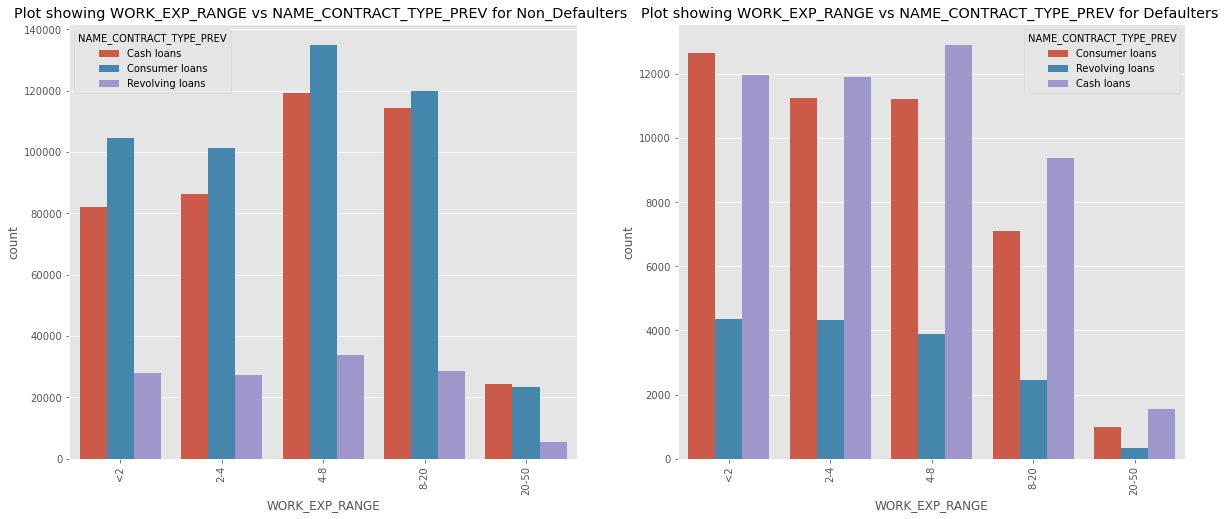

In [168]:
plot_bivariate_countplot('WORK_EXP_RANGE','NAME_CONTRACT_TYPE_PREV')  

The clients in the Work Exp group of 4-20 having Approved from previous application status and those applied for Cash/Consumer loan tend to be non defaulters.
The clients in the Work Exp group of 0-2 having irrespective of their status  from previous application status and those applied for  all loans types have more chance to be defaulters.


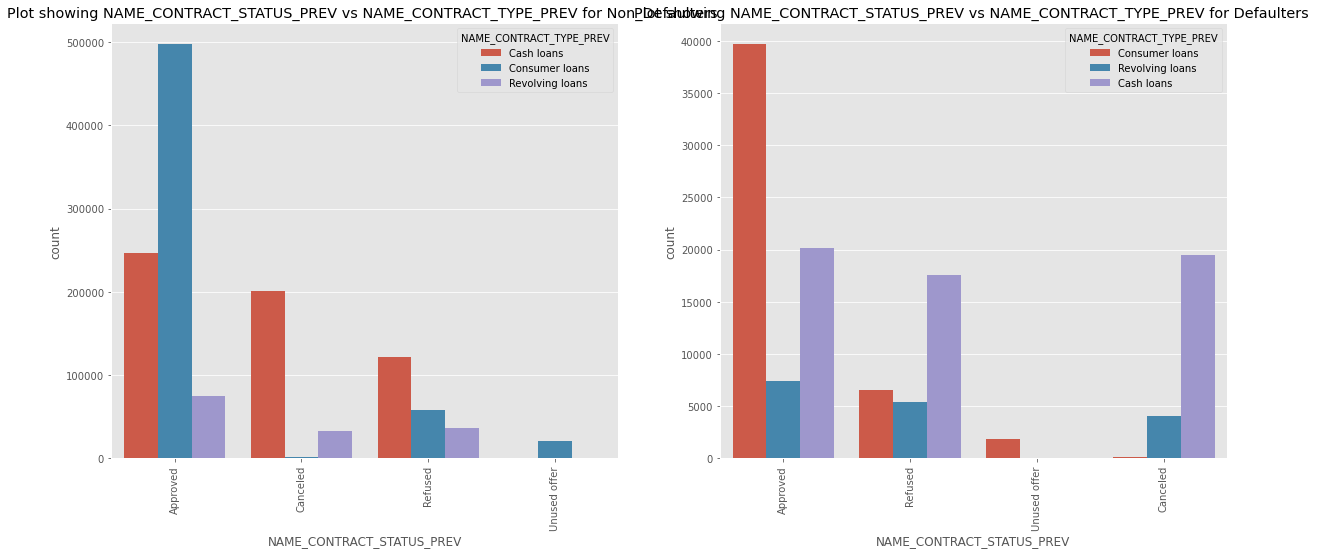

In [169]:
plot_bivariate_countplot('NAME_CONTRACT_STATUS_PREV','NAME_CONTRACT_TYPE_PREV')

The insight is pretty much the same here for both the graphs 

For the prev application high number of Consumer loans were approved for defaulter and non defaulters
For the prev application more number of cash loans were cancelled and refused for defaulters and non defaulters


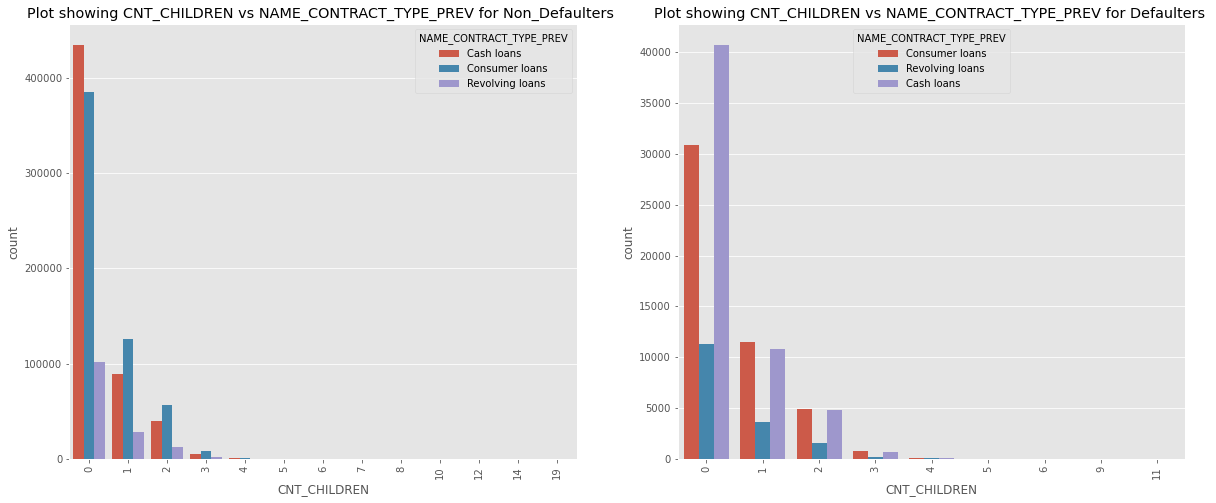

In [170]:
plot_bivariate_countplot('CNT_CHILDREN','NAME_CONTRACT_TYPE_PREV')

The max number of defaulter and non defaulter client having 0 children have applied for Cash Loan

The max number of defaulter and non defaulter client having 1 children have applied for Consumer Loan

The non-defaulter clients having 2 children have mostly applied for Consumer loans as compared to non-defaulters having 2 children who have mostly applied for Cash and Consumer Loans.

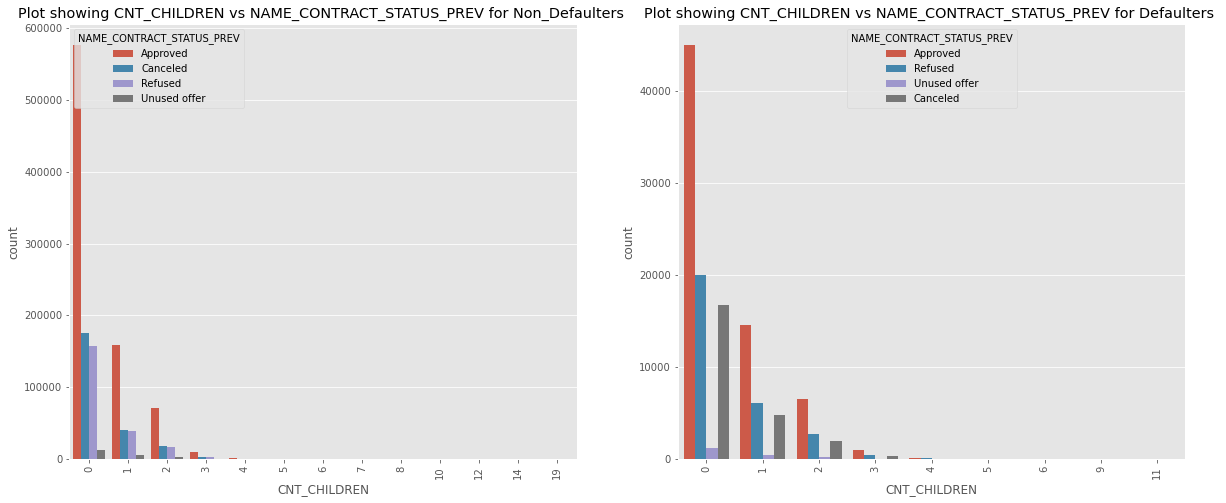

In [171]:
plot_bivariate_countplot('CNT_CHILDREN','NAME_CONTRACT_STATUS_PREV')

Defaulter Clients have more number of refused and cancelled applications as compared to non defaulter clients irrespective of the number of children

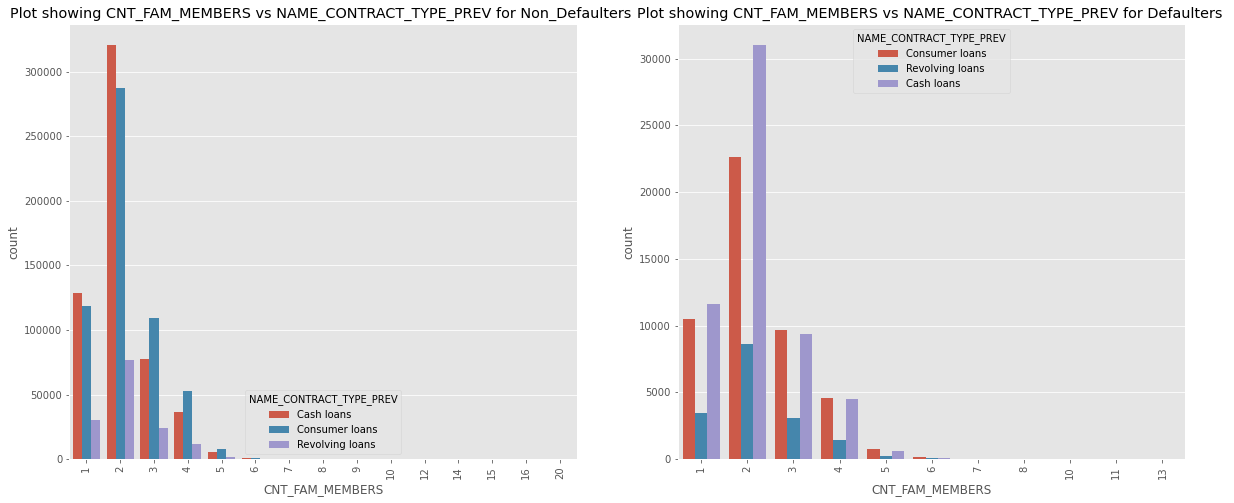

In [172]:
plot_bivariate_countplot('CNT_FAM_MEMBERS','NAME_CONTRACT_TYPE_PREV')

Most Defaulters and Non Defaulters have applied for Cash Loans when the number of family members are 1 or 2. As the number of family members increase the clients (defaulter and non defaulter) have applied for consumer loans. 

In [173]:
# Function to boxplot bivariate
def boxplot_bivariate(variable_1,variable_2):
    
    # Get data
    target_0 = data_merge[data_merge['TARGET']==0]
    target_1 = data_merge[data_merge['TARGET']==1]
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters')
    sns.boxplot(x=variable_1,y=variable_2,data=target_1)
    
    plt.subplot(1,2,2)    
    plt.title('Non-Defaulters')
    sns.boxplot(x=variable_1,y=variable_2,data=target_0)
    
    plt.show()

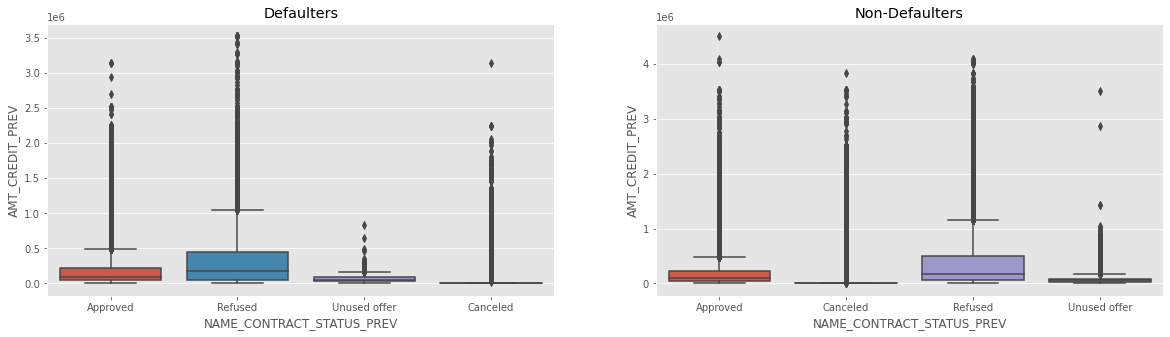

In [174]:
boxplot_bivariate('NAME_CONTRACT_STATUS_PREV','AMT_CREDIT_PREV')

For Both the clients - defaulters and non-defaulters the refused applications have high credits.

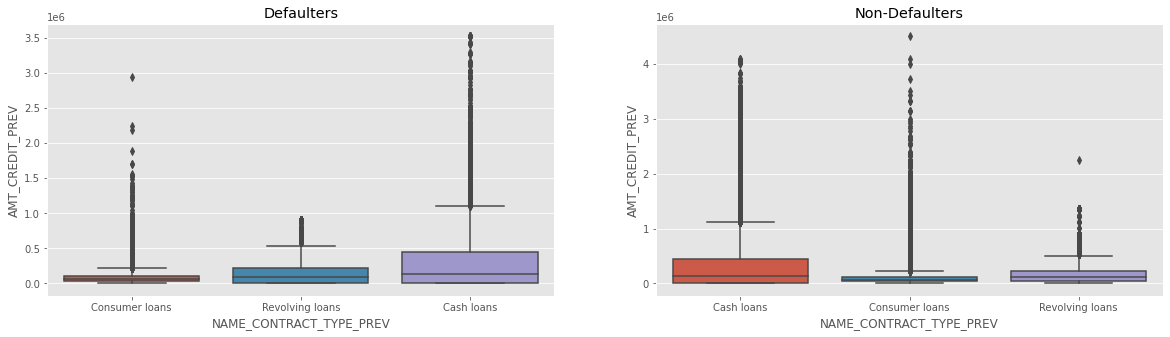

In [175]:
boxplot_bivariate('NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_PREV')

For Both the clients - defaulters and non-defaulters who applied for cash loans have high credits.

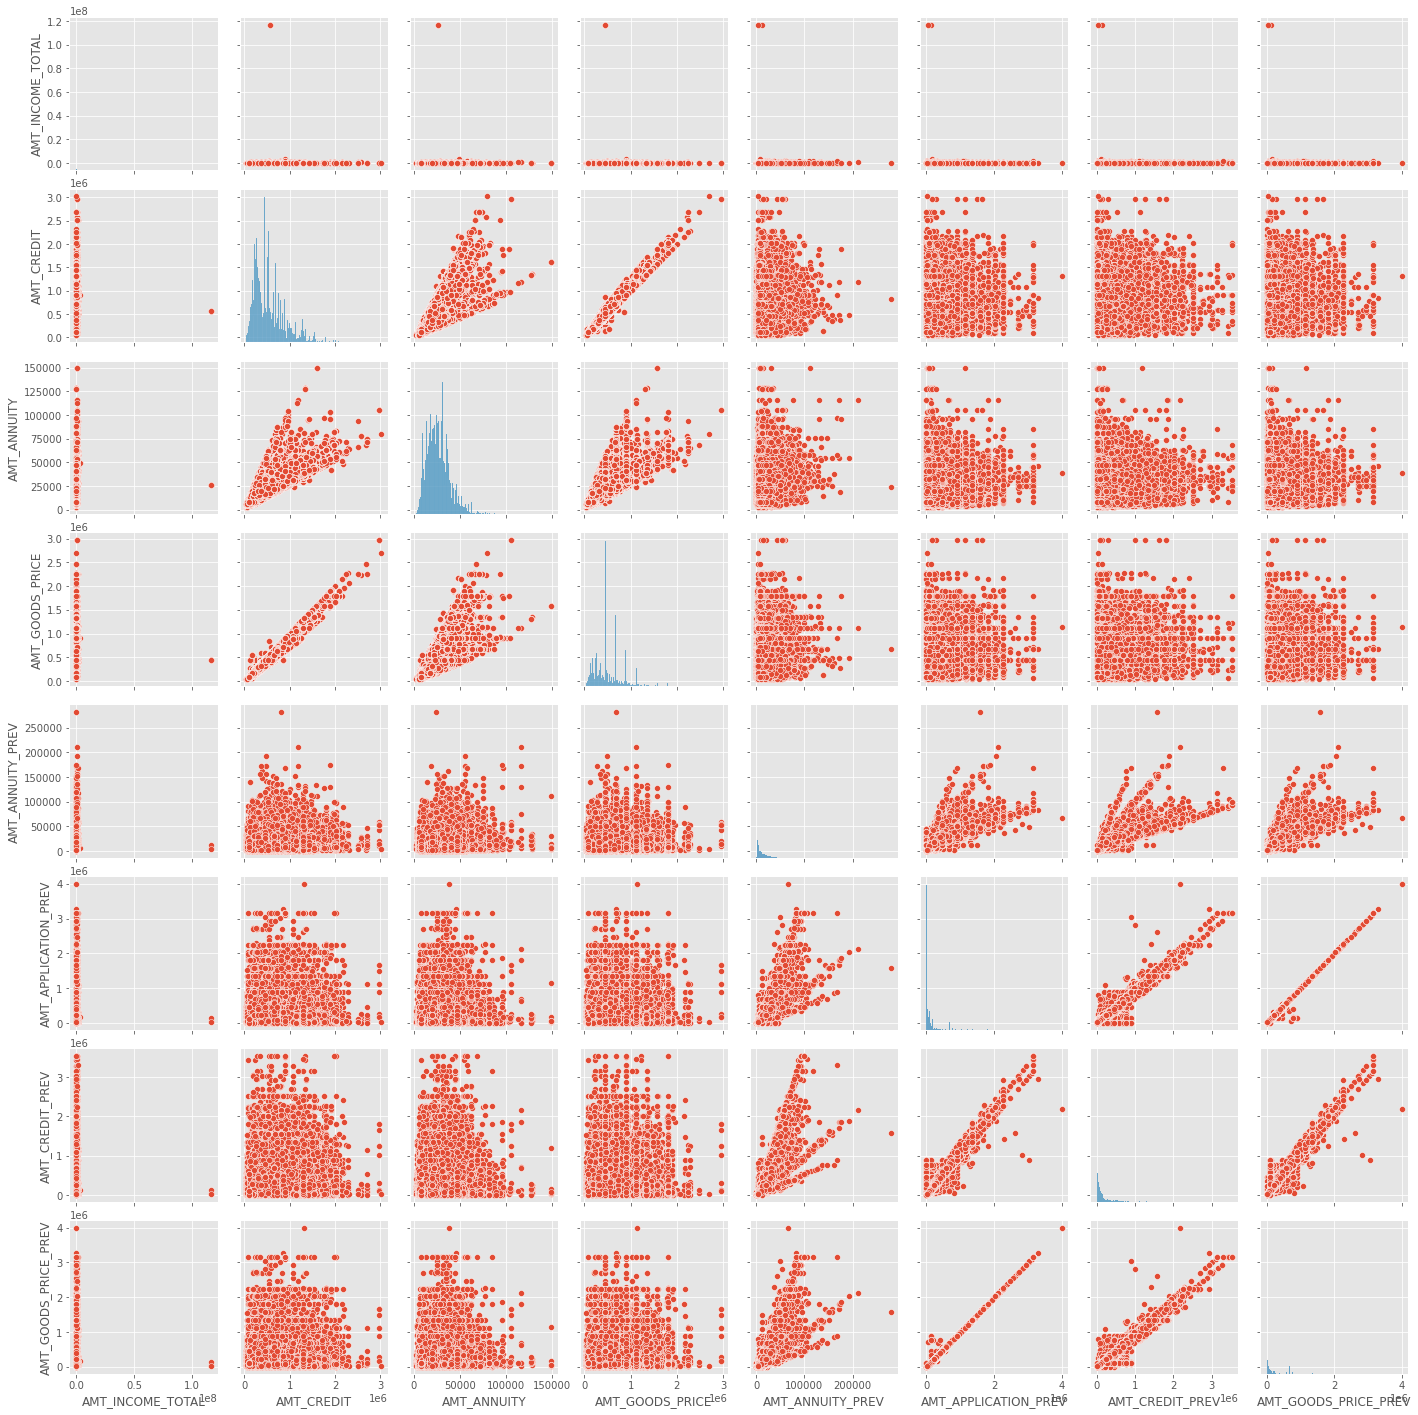

In [176]:
#Pairplot for Defaulters
pair = defaulter[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION_PREV', 'AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].fillna(0)
sns.pairplot(pair)
plt.show()

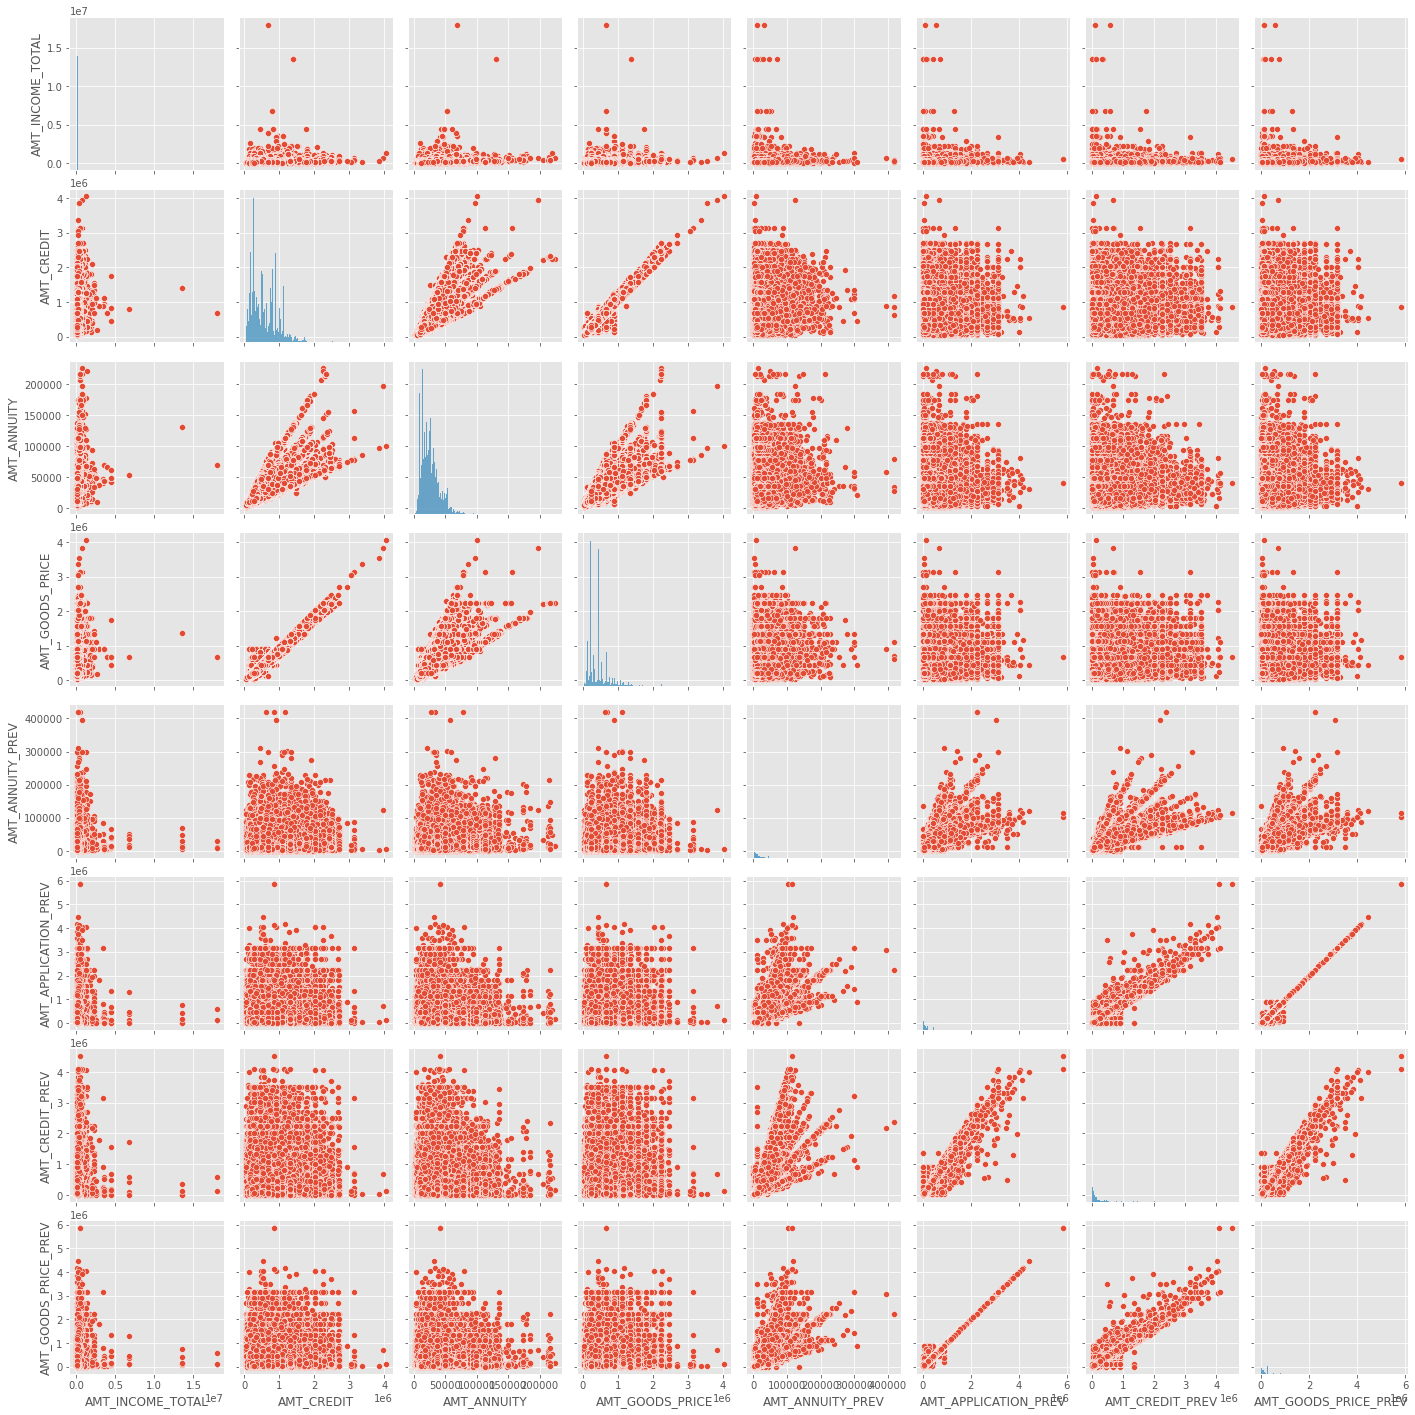

In [177]:
#Pairplot for Non-Defaulters
pair = non_defaulter[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION_PREV', 'AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].fillna(0)
sns.pairplot(pair)
plt.show()

From the above two pairplots we can observe that:

High correlation exists between AMT_APPLICATION_PREV and AMT_GOODS_PRICE_PREV
AMT_CREDIT_PREV and AMT_GOODS_PRICE_PREV
AMT_APPLICATION_PREV and AMT_CREDIT_PREV
AMT_GOODS_PRICE and AMT_CREDIT

## Subtask 4.5:Correlation Matrix

In [178]:
def get_redundant_pairs(df):

    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [179]:
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [180]:
#Correlation using pearson method on merged data
target1=defaulter.iloc[0:,2:]
target1_corr=target1.corr(method='pearson')

In [181]:
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.001548   -0.010148   
AMT_INCOME_TOTAL                  0.001548          1.000000    0.043130   
AMT_CREDIT                       -0.010148          0.043130    1.000000   
AMT_ANNUITY                       0.031277          0.055551    0.745679   
AMT_GOODS_PRICE                  -0.017489          0.042468    0.982525   
REGION_POPULATION_RELATIVE       -0.023330          0.013728    0.066670   
FLAG_PHONE                       -0.029664         -0.004362    0.011455   
FLAG_EMAIL                        0.016021          0.013800    0.013519   
CNT_FAM_MEMBERS                   0.886300          0.002843    0.044920   
REGION_RATING_CLIENT              0.033142         -0.026726   -0.058077   
REGION_RATING_CLIENT_W_CITY       0.036702         -0.028901   -0.066540   
LIVE_REGION_NOT_WORK_REGION      -0.010084          0.016242    0.023244   
AGE                              -0.295109          0.000144    0.125261   
WORK_EXP                         -0.201551         -0.015820    0.010687   
SK_ID_PREV                       -0.001626         -0.002446    0.002451   
AMT_ANNUITY_PREV                 -0.030742          0.026499    0.125293   
AMT_APPLICATION_PREV             -0.030315          0.019538    0.119639   
AMT_CREDIT_PREV                  -0.031336          0.019166    0.118091   
AMT_GOODS_PRICE_PREV             -0.035849          0.020546    0.120251   
HOUR_APPR_PROCESS_START_PREV      0.004789          0.011556    0.026091   
NFLAG_LAST_APPL_IN_DAY_PREV      -0.005208          0.000109   -0.001967   
DAYS_DECISION_PREV               -0.010612         -0.003064   -0.103279   
SELLERPLACE_AREA_PREV             0.010803          0.000337    0.014989   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                     0.031277        -0.017489   
AMT_INCOME_TOTAL                 0.055551         0.042468   
AMT_CREDIT                       0.745679         0.982525   
AMT_ANNUITY                      1.000000         0.745083   
AMT_GOODS_PRICE                  0.745083         1.000000   
REGION_POPULATION_RELATIVE       0.069390         0.073619   
FLAG_PHONE                      -0.013317         0.031837   
FLAG_EMAIL                       0.080574         0.017790   
CNT_FAM_MEMBERS                  0.076900         0.040172   
REGION_RATING_CLIENT            -0.069653        -0.064856   
REGION_RATING_CLIENT_W_CITY     -0.084103        -0.071696   
LIVE_REGION_NOT_WORK_REGION      0.054975         0.024980   
AGE                             -0.002746         0.127525   
WORK_EXP                        -0.083693         0.018186   
SK_ID_PREV                       0.003576         0.002153   
AMT_ANNUITY_PREV                 0.144438         0.128631   
AMT_APPLICATION_PREV             0.097688         0.124963   
AMT_CREDIT_PREV                  0.094218         0.121814   
AMT_GOODS_PRICE_PREV             0.100070         0.125180   
HOUR_APPR_PROCESS_START_PREV     0.041024         0.034612   
NFLAG_LAST_APPL_IN_DAY_PREV     -0.004736        -0.000446   
DAYS_DECISION_PREV              -0.063261        -0.106753   
SELLERPLACE_AREA_PREV            0.020628         0.018181   

                              REGION_POPULATION_RELATIVE  FLAG_PHONE  \
CNT_CHILDREN                                   -0.023330   -0.029664   
AMT_INCOME_TOTAL                                0.013728   -0.004362   
AMT_CREDIT                                      0.066670    0.011455   
AMT_ANNUITY                                     0.069390   -0.013317   
AMT_GOODS_PRICE                                 0.073619    0.031837   
REGION_POPULATION_RELATIVE                      1.000000    0.061122   
FLAG_PHONE                                      0.061122    1.000000   
FLAG_EMAIL                                      0.022878    0.021840   
CNT_FAM_MEMBERS                                -0.023803   -0.004924

In [182]:
get_top_abs_correlations(target1_corr)

AMT_APPLICATION_PREV  AMT_GOODS_PRICE_PREV           0.985655
AMT_CREDIT            AMT_GOODS_PRICE                0.982525
AMT_APPLICATION_PREV  AMT_CREDIT_PREV                0.975377
AMT_CREDIT_PREV       AMT_GOODS_PRICE_PREV           0.969027
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.956483
CNT_CHILDREN          CNT_FAM_MEMBERS                0.886300
AMT_ANNUITY_PREV      AMT_GOODS_PRICE_PREV           0.832264
                      AMT_CREDIT_PREV                0.829383
                      AMT_APPLICATION_PREV           0.816557
AMT_CREDIT            AMT_ANNUITY                    0.745679
dtype: float64

The top 10 correlations for defaulters

AMT_APPLICATION_PREV  AMT_GOODS_PRICE_PREV           0.985655
AMT_CREDIT            AMT_GOODS_PRICE                0.982525
AMT_APPLICATION_PREV  AMT_CREDIT_PREV                0.975377
AMT_CREDIT_PREV       AMT_GOODS_PRICE_PREV           0.969027
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.956483
CNT_CHILDREN          CNT_FAM_MEMBERS                0.886300
AMT_ANNUITY_PREV      AMT_GOODS_PRICE_PREV           0.832264
                      AMT_CREDIT_PREV                0.829383
                      AMT_APPLICATION_PREV           0.816557
AMT_CREDIT            AMT_ANNUITY                    0.745679

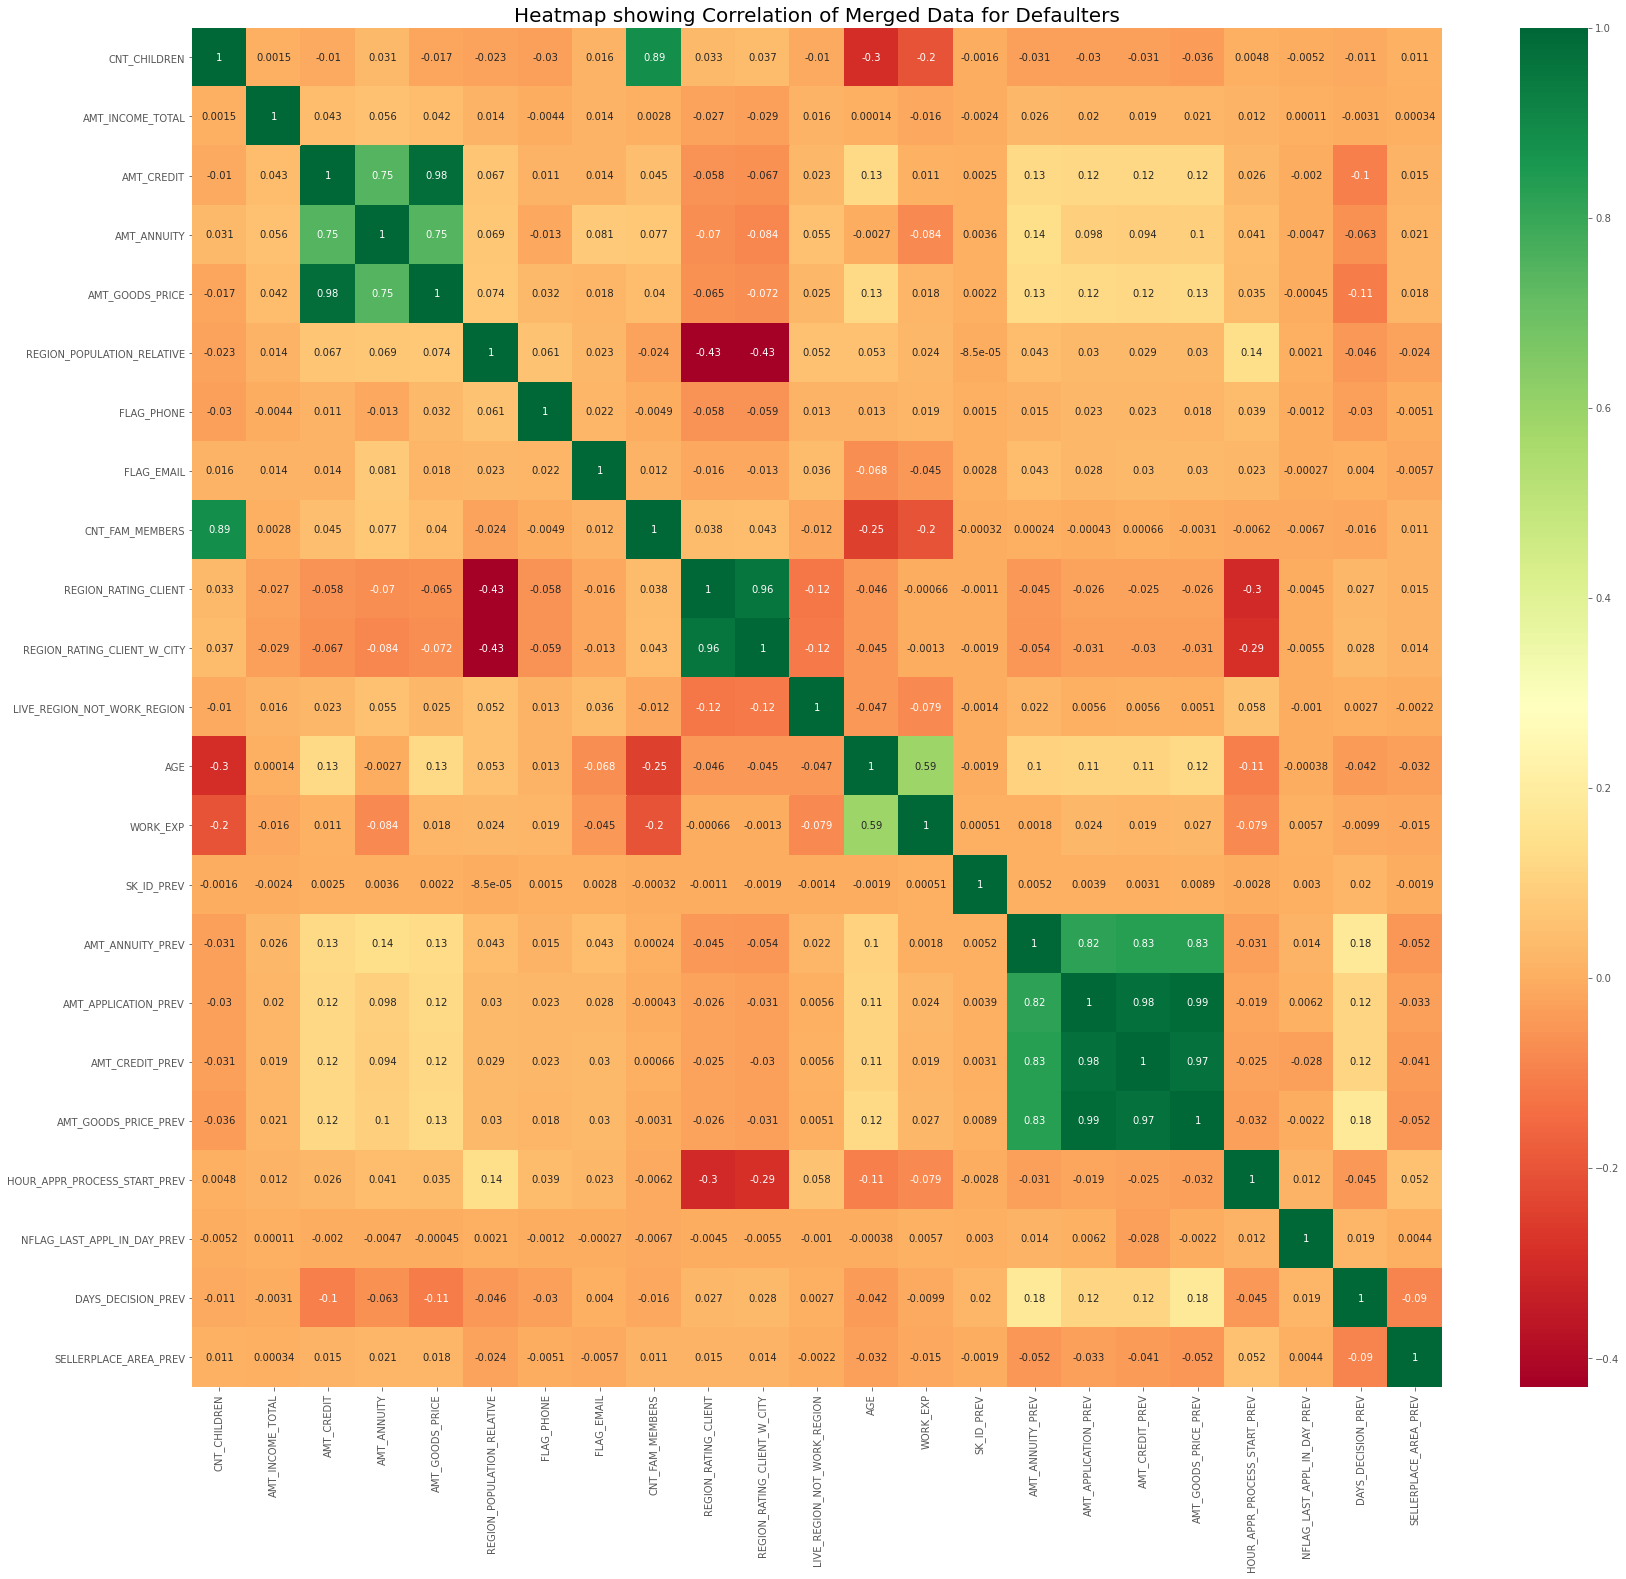

In [183]:
#Plot the heatmap to observe the correlation between attributes
plt.figure(figsize=[28,25])
sns.heatmap(target1_corr,cmap='RdYlGn',fmt='.2g',annot=True)
plt.title("Heatmap showing Correlation of Merged Data for Defaulters",fontdict={'fontsize':20,'fontweight':5,'color':'black'})

plt.show()

In [184]:
#Correlation using pearson method on merged data
target0=non_defaulter.iloc[0:,2:]
target0_corr=target0.corr(method='pearson')

In [185]:
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.023799    0.004474   
AMT_INCOME_TOTAL                  0.023799          1.000000    0.324848   
AMT_CREDIT                        0.004474          0.324848    1.000000   
AMT_ANNUITY                       0.029379          0.402076    0.759413   
AMT_GOODS_PRICE                   0.001124          0.328119    0.986415   
REGION_POPULATION_RELATIVE       -0.021401          0.152618    0.086101   
FLAG_PHONE                       -0.028771         -0.001737    0.022223   
FLAG_EMAIL                        0.027052          0.093803    0.014636   
CNT_FAM_MEMBERS                   0.878468          0.028201    0.065383   
REGION_RATING_CLIENT              0.023683         -0.178670   -0.087185   
REGION_RATING_CLIENT_W_CITY       0.022006         -0.192843   -0.096192   
LIVE_REGION_NOT_WORK_REGION       0.020447          0.113942    0.047453   
AGE                              -0.369173         -0.054264    0.039678   
WORK_EXP                         -0.253726         -0.132055   -0.065110   
SK_ID_PREV                       -0.002960          0.002033   -0.000619   
AMT_ANNUITY_PREV                 -0.032463          0.193193    0.138607   
AMT_APPLICATION_PREV             -0.034436          0.139350    0.118684   
AMT_CREDIT_PREV                  -0.035171          0.137833    0.116671   
AMT_GOODS_PRICE_PREV             -0.040549          0.149099    0.122243   
HOUR_APPR_PROCESS_START_PREV      0.018994          0.084490    0.047621   
NFLAG_LAST_APPL_IN_DAY_PREV       0.001491         -0.000354    0.001408   
DAYS_DECISION_PREV               -0.013926          0.009917   -0.055822   
SELLERPLACE_AREA_PREV             0.000677          0.003257    0.003307   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                     0.029379         0.001124   
AMT_INCOME_TOTAL                 0.402076         0.328119   
AMT_CREDIT                       0.759413         0.986415   
AMT_ANNUITY                      1.000000         0.763433   
AMT_GOODS_PRICE                  0.763433         1.000000   
REGION_POPULATION_RELATIVE       0.105072         0.088032   
FLAG_PHONE                       0.007734         0.039182   
FLAG_EMAIL                       0.067366         0.014928   
CNT_FAM_MEMBERS                  0.085274         0.063898   
REGION_RATING_CLIENT            -0.115451        -0.087453   
REGION_RATING_CLIENT_W_CITY     -0.129215        -0.095517   
LIVE_REGION_NOT_WORK_REGION      0.070772         0.047328   
AGE                             -0.031806         0.037070   
WORK_EXP                        -0.110481        -0.063304   
SK_ID_PREV                       0.000637        -0.000376   
AMT_ANNUITY_PREV                 0.180587         0.140296   
AMT_APPLICATION_PREV             0.113235         0.120284   
AMT_CREDIT_PREV                  0.108793         0.116845   
AMT_GOODS_PRICE_PREV             0.118035         0.123460   
HOUR_APPR_PROCESS_START_PREV     0.061281         0.053937   
NFLAG_LAST_APPL_IN_DAY_PREV      0.001693         0.001759   
DAYS_DECISION_PREV              -0.032321        -0.056696   
SELLERPLACE_AREA_PREV            0.004334         0.004239   

                              REGION_POPULATION_RELATIVE  FLAG_PHONE  \
CNT_CHILDREN                                   -0.021401   -0.028771   
AMT_INCOME_TOTAL                                0.152618   -0.001737   
AMT_CREDIT                                      0.086101    0.022223   
AMT_ANNUITY                                     0.105072    0.007734   
AMT_GOODS_PRICE                                 0.088032    0.039182   
REGION_POPULATION_RELATIVE                      1.000000    0.087662   
FLAG_PHONE                                      0.087662    1.000000   
FLAG_EMAIL                                      0.038603    0.020342   
CNT_FAM_MEMBERS                                -0.020303   -0.016287

In [186]:
get_top_abs_correlations(target0_corr)

AMT_APPLICATION_PREV  AMT_GOODS_PRICE_PREV           0.987533
AMT_CREDIT            AMT_GOODS_PRICE                0.986415
AMT_APPLICATION_PREV  AMT_CREDIT_PREV                0.975725
AMT_CREDIT_PREV       AMT_GOODS_PRICE_PREV           0.971650
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.944355
CNT_CHILDREN          CNT_FAM_MEMBERS                0.878468
AMT_ANNUITY_PREV      AMT_GOODS_PRICE_PREV           0.816219
                      AMT_CREDIT_PREV                0.811975
                      AMT_APPLICATION_PREV           0.805867
AMT_ANNUITY           AMT_GOODS_PRICE                0.763433
dtype: float64

The top 10 corelations for the Non Defaulters

AMT_APPLICATION_PREV  AMT_GOODS_PRICE_PREV           0.987533
AMT_CREDIT            AMT_GOODS_PRICE                0.986415
AMT_APPLICATION_PREV  AMT_CREDIT_PREV                0.975725
AMT_CREDIT_PREV       AMT_GOODS_PRICE_PREV           0.971650
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.944355
CNT_CHILDREN          CNT_FAM_MEMBERS                0.878468
AMT_ANNUITY_PREV      AMT_GOODS_PRICE_PREV           0.816219
                      AMT_CREDIT_PREV                0.811975
                      AMT_APPLICATION_PREV           0.805867
AMT_ANNUITY           AMT_GOODS_PRICE                0.763433

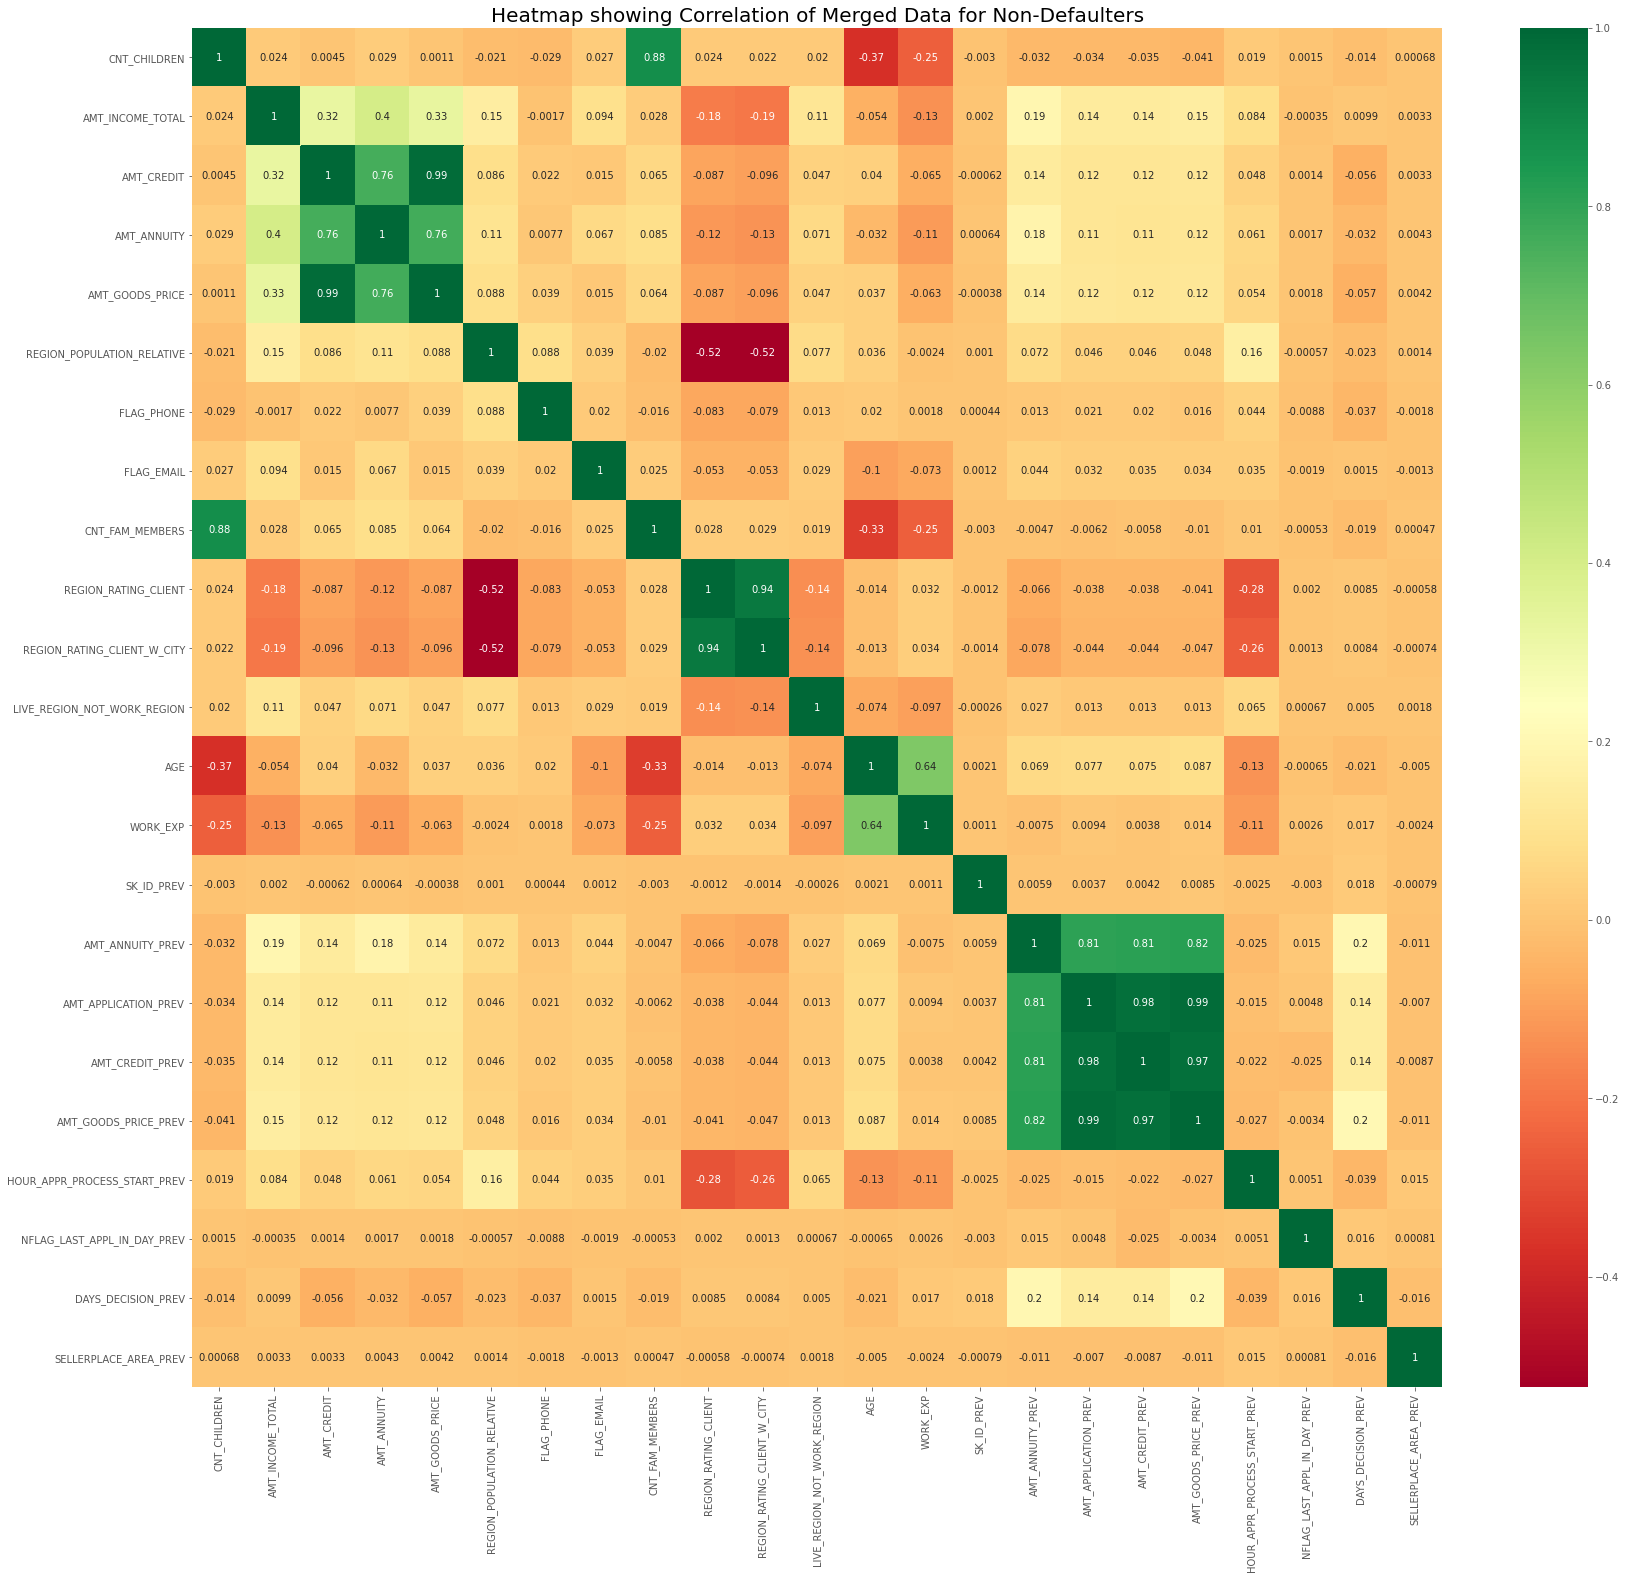

In [187]:
#Plot the heatmap to observe the correlation between attributes
plt.figure(figsize=[28,25])
sns.heatmap(target0_corr,cmap='RdYlGn',fmt='.2g',annot=True)
plt.title("Heatmap showing Correlation of Merged Data for Non-Defaulters",fontdict={'fontsize':20,'fontweight':5,'color':'black'})

plt.show()

# Task 5:CONCLUSION

Defaulters

Males applied less for loans when compared Females.But they have more chance of defaulting

Eventhough the age of 20-30 have applied for loan their percentage of defaulting is high when compared to other age group

The clients with work experience less than 2 years or 2-4 years have higher chance of defaulting.

The clients who has Cancelled and Refused from previous application status and those applied for Revolving loans have more chance to be defaulters.

clients having own realty have more chance of defaulting

Client who own business and self employed tend to take loans more and also more the chance of defaulting.

 Clients with civil marriage and secondary/secondary special have chance of defaulting

Client with more count of family members and children have greater chance of defaulting

Client with low income have chance of defaulting

Non-Defaulters:
    
We can target the client with following qualities as it increases our business and also reduce the chance of defaulting

Females have applied alot for loans when compared to males their chance of defaulting is also less

Target the people in age group 30-50.

People who are having experience of 4-20 years have less chance of defaulting.

Clients having Approved and Unused offer from previous application status and those applied for Cash/Consumer loan tend to be non defaulters. 

Clients having own car have less chance of defaulting  

Clients living in Rented apartments ,Co-op apartments or office apartments have less chance of defaulting

CLients who are married and have higher education have a greater chance to take loans.

Client who have more income and less credit value